## YourCabs Analysis
### Description
* Business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore.
* The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.
### Goal
* The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv(r"D:\Downloads\YourCabs.csv")

In [3]:
df.head()

id  user_id  vehicle_model_id  package_id  travel_type_id  \
0  132512    22177                28         NaN               2   
1  132513    21413                12         NaN               2   
2  132514    22178                12         NaN               2   
3  132515    13034                12         NaN               2   
4  132517    22180                12         NaN               2   

   from_area_id  to_area_id  from_city_id  to_city_id         from_date  \
0          83.0       448.0           NaN         NaN  01-01-2013 02:00   
1        1010.0       540.0           NaN         NaN  01-01-2013 09:00   
2        1301.0      1034.0           NaN         NaN  01-01-2013 03:30   
3         768.0       398.0           NaN         NaN  01-01-2013 05:45   
4        1365.0       849.0           NaN         NaN  01-01-2013 09:00   

   online_booking  mobile_site_booking   booking_created   from_lat  \
0               0                    0  01-01-2013 01:39  12.924150   
1               0                    0  01-01-2013 02:25  12.966910   
2               0                    0  01-01-2013 03:08  12.937222   
3               0                    0  01-01-2013 04:39  12.989990   
4               0                    0  01-01-2013 07:53  12.845653   

   from_long     to_lat    to_long  Car_Cancellation  
0  77.672290  12.927320  77.635750                 0  
1  77.749350  12.927680  77.626640                 0  
2  77.626915  13.047926  77.597766                 0  
3  77.553320  12.971430  77.639140                 0  
4  77.677925  12.954340  77.600720                 0

## Shape

In [4]:
df.shape

(43431, 18)

## Columns

In [5]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

## Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Checking for null values

In [7]:
df.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

## Exploring the data

In [8]:
df.vehicle_model_id.nunique()

27

In [9]:
df.vehicle_model_id.unique()

array([28, 12, 65, 24, 87, 54, 85, 17, 23, 36, 72, 30, 43, 86, 76,  1, 69,
       14, 89, 10, 13, 64, 90, 75, 70, 91, 39], dtype=int64)

In [10]:
df.vehicle_model_id.value_counts()

12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: vehicle_model_id, dtype: int64

* Here  **vehicle_model_id = 12** has repeated a whopping  **31859** times making the most occured in the whole data.
* Hence using this in the model would create a great bias. So we choose to drop this entire column.

In [11]:
df = df.drop(['id', 'user_id', 'vehicle_model_id'], axis = 1)

In [12]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id         from_date  online_booking  mobile_site_booking  \
0             NaN  01-01-2013 02:00               0                    0   
1             NaN  01-01-2013 09:00               0                    0   
2             NaN  01-01-2013 03:30               0                    0   
3             NaN  01-01-2013 05:45               0                    0   
4             NaN  01-01-2013 09:00               0                    0   
...           ...               ...             ...                  ...   
43426         NaN  11/24/2013 18:00               1                    0   
43427         NaN   11/26/2013 1:00               1                    0   
43428         NaN  11/24/2013 18:30               0                    0   
43429         NaN  11/24/2013 16:00               0                    0   
43430         NaN   11/25/2013 5:00               0                    1   

        booking_created   from_lat  from_long     to_lat    to_long  \
0      01-01-2013 01:39  12.924150  77.672290  12.927320  77.635750   
1      01-01-2013 02:25  12.966910  77.749350  12.927680  77.626640   
2      01-01-2013 03:08  12.937222  77.626915  13.047926  77.597766   
3      01-01-2013 04:39  12.989990  77.553320  12.971430  77.639140   
4      01-01-2013 07:53  12.845653  77.677925  12.954340  77.600720   
...                 ...        ...        ...        ...        ...   
43426  11/24/2013 14:25  13.030640  77.649100  12.952780  77.590880   
43427  11/24/2013 14:30  13.199560  77.706880  13.017436  77.644580   
43428  11/24/2013 14:35  13.075570  77.559040        NaN        NaN   
43429  11/24/2013 14:43  12.968970  77.594560  12.938230  77.622890   
43430  11/24/2013 14:50  12.976720  77.649270  13.199560  77.706880   

       Car_Cancellation  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
43426                 0  
43427                 0  
43428                 0  
43429                 0  
43430                 0  

[43431 rows x 15 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           7550 non-null   float64
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_city_id         16345 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43431 non-null  object 
 7   online_booking       43431 non-null  int64  
 8   mobile_site_booking  43431 non-null  int64  
 9   booking_created      43431 non-null  object 
 10  from_lat             43338 non-null  float64
 11  from_long            43338 non-null  float64
 12  to_lat               34293 non-null  float64
 13  to_long              34293 non-null  float64
 14  Car_Cancellation     43431 non-null  int64  
dtypes: float64(9), int64(4), object(2)
m

## Dealing with date columns
* Here the **from_date** and **booking_created** are the date-time columns , and are also the object type columns.
* But the models can only interpret numbers hence these date-time object columns need to be converted into numerical data.

In [14]:
df['from_date'] = pd.to_datetime(df['from_date'])

df['from_date_year'] = df['from_date'].dt.year
df['from_date_month'] = df['from_date'].dt.month
df['from_date_weekday'] = df['from_date'].dt.weekday
df['from_date_hour'] = df['from_date'].dt.hour
df['from_date_minute'] = df['from_date'].dt.minute

In [15]:
df['booking_created'] = pd.to_datetime(df['booking_created'])

df['booking_created_year'] = df['booking_created'].dt.year
df['booking_created_month'] = df['booking_created'].dt.month
df['booking_created_weekday'] = df['booking_created'].dt.weekday
df['booking_created_hour'] = df['booking_created'].dt.hour
df['booking_created_minute'] = df['booking_created'].dt.minute

In [16]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id           from_date  online_booking  mobile_site_booking  \
0             NaN 2013-01-01 02:00:00               0                    0   
1             NaN 2013-01-01 09:00:00               0                    0   
2             NaN 2013-01-01 03:30:00               0                    0   
3             NaN 2013-01-01 05:45:00               0                    0   
4             NaN 2013-01-01 09:00:00               0                    0   
...           ...                 ...             ...                  ...   
43426         NaN 2013-11-24 18:00:00               1                    0   
43427         NaN 2013-11-26 01:00:00               1                    0   
43428         NaN 2013-11-24 18:30:00               0                    0   
43429         NaN 2013-11-24 16:00:00               0                    0   
43430         NaN 2013-11-25 05:00:00               0                    1   

          booking_created  ...  from_date_year  from_date_month  \
0     2013-01-01 01:39:00  ...            2013                1   
1     2013-01-01 02:25:00  ...            2013                1   
2     2013-01-01 03:08:00  ...            2013                1   
3     2013-01-01 04:39:00  ...            2013                1   
4     2013-01-01 07:53:00  ...            2013                1   
...                   ...  ...             ...              ...   
43426 2013-11-24 14:25:00  ...            2013               11   
43427 2013-11-24 14:30:00  ...            2013               11   
43428 2013-11-24 14:35:00  ...            2013               11   
43429 2013-11-24 14:43:00  ...            2013               11   
43430 2013-11-24 14:50:00  ...            2013               11   

       from_date_weekday  from_date_hour  from_date_minute  \
0                      1               2                 0   
1                      1               9                 0   
2                      1               3                30   
3                      1               5                45   
4                      1               9                 0   
...                  ...             ...               ...   
43426                  6              18                 0   
43427                  1               1                 0   
43428                  6              18                30   
43429                  6              16                 0   
43430                  0               5                 0   

       booking_created_year  booking_created_month  booking_created_weekday  \
0                      2013                      1                        1   
1                      2013                      1                        1   
2                      2013                      1                        1   
3                      2013                      1                        1   
4                      2013                      1                        1   
...                     ...                    ...                      ...   
43426                  2013               

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   package_id               7550 non-null   float64       
 1   travel_type_id           43431 non-null  int64         
 2   from_area_id             43343 non-null  float64       
 3   to_area_id               34293 non-null  float64       
 4   from_city_id             16345 non-null  float64       
 5   to_city_id               1588 non-null   float64       
 6   from_date                43431 non-null  datetime64[ns]
 7   online_booking           43431 non-null  int64         
 8   mobile_site_booking      43431 non-null  int64         
 9   booking_created          43431 non-null  datetime64[ns]
 10  from_lat                 43338 non-null  float64       
 11  from_long                43338 non-null  float64       
 12  to_lat                   34293 n

In [18]:
df.from_date_year.unique()

array([2013, 2014], dtype=int64)

In [19]:
df.from_date_year.value_counts()

2013    43428
2014        3
Name: from_date_year, dtype: int64

In [20]:
df.booking_created_year.value_counts()

2013    43431
Name: booking_created_year, dtype: int64

* Here we can clearly see that in **from_date_year** **2013** has repeated the most number of times(43428) and **2014** only 3 times which makes this data heavily biased and the machine does'nt learn anything new . Same goes for **booking_created_year**. Hence it is advisable to drop these two columns

In [21]:
df.from_area_id.nunique()

598

In [22]:
df['time_diff'] = (pd.to_datetime(df['from_date']) - pd.to_datetime(df['booking_created'])).astype('timedelta64[m]')

In [23]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id           from_date  online_booking  mobile_site_booking  \
0             NaN 2013-01-01 02:00:00               0                    0   
1             NaN 2013-01-01 09:00:00               0                    0   
2             NaN 2013-01-01 03:30:00               0                    0   
3             NaN 2013-01-01 05:45:00               0                    0   
4             NaN 2013-01-01 09:00:00               0                    0   
...           ...                 ...             ...                  ...   
43426         NaN 2013-11-24 18:00:00               1                    0   
43427         NaN 2013-11-26 01:00:00               1                    0   
43428         NaN 2013-11-24 18:30:00               0                    0   
43429         NaN 2013-11-24 16:00:00               0                    0   
43430         NaN 2013-11-25 05:00:00               0                    1   

          booking_created  ...  from_date_month  from_date_weekday  \
0     2013-01-01 01:39:00  ...                1                  1   
1     2013-01-01 02:25:00  ...                1                  1   
2     2013-01-01 03:08:00  ...                1                  1   
3     2013-01-01 04:39:00  ...                1                  1   
4     2013-01-01 07:53:00  ...                1                  1   
...                   ...  ...              ...                ...   
43426 2013-11-24 14:25:00  ...               11                  6   
43427 2013-11-24 14:30:00  ...               11                  1   
43428 2013-11-24 14:35:00  ...               11                  6   
43429 2013-11-24 14:43:00  ...               11                  6   
43430 2013-11-24 14:50:00  ...               11                  0   

       from_date_hour  from_date_minute  booking_created_year  \
0                   2                 0                  2013   
1                   9                 0                  2013   
2                   3                30                  2013   
3                   5                45                  2013   
4                   9                 0                  2013   
...               ...               ...                   ...   
43426              18                 0                  2013   
43427               1                 0                  2013   
43428              18                30                  2013   
43429              16                 0                  2013   
43430               5                 0                  2013   

       booking_created_month  booking_created_weekday  booking_created_hour  \
0                          1                        1                     1   
1                          1                        1                     2   
2                          1                        1                     3   
3                          1                        1                     4   
4                          1                        1                     7   
...                      ...                     

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   package_id               7550 non-null   float64       
 1   travel_type_id           43431 non-null  int64         
 2   from_area_id             43343 non-null  float64       
 3   to_area_id               34293 non-null  float64       
 4   from_city_id             16345 non-null  float64       
 5   to_city_id               1588 non-null   float64       
 6   from_date                43431 non-null  datetime64[ns]
 7   online_booking           43431 non-null  int64         
 8   mobile_site_booking      43431 non-null  int64         
 9   booking_created          43431 non-null  datetime64[ns]
 10  from_lat                 43338 non-null  float64       
 11  from_long                43338 non-null  float64       
 12  to_lat                   34293 n

In [25]:
df.from_date_weekday.nunique()

7

In [26]:
df.from_date_weekday.unique()

array([1, 2, 5, 3, 4, 0, 6], dtype=int64)

In [27]:
df.booking_created_weekday.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

#### from_date_weekday
* 0 (sunday)
* 1 (monday)
* 2 (tuesday)
* 3 (wedenesday)
* 4 (thursday)
* 5 (friday)
* 6 (saturday)
#### booking_created_weekday
* 0 (sunday)
* 1 (monday)
* 2 (tuesday)
* 3 (wedenesday)
* 4 (thursday)
* 5 (friday)
* 6 (saturday)

In [28]:
df.from_date_month.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [29]:
df.booking_created_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

#### from_date_month
* 1 (january)
* 2 (february)
* 3 (march)
* 4 (april)
* 5 (may)
* 6 (june)
* 7 (july)
* 8 (august)
* 9 (september)
* 10 (october)
* 11 (november)
* 12 (december)
#### booking_created_month
* 1 (january)
* 2 (february)
* 3 (march)
* 4 (april)
* 5 (may)
* 6 (june)
* 7 (july)
* 8 (august)
* 9 (september)
* 10 (october)
* 11 (november)
## Seasons
#### from_date_month

* March, April, May, June (3,4,5,6 = Summer)
* July, August, September, October (7,8,9,10 = Rainy)
* November, December, January, February(11,12,1,2 = Winter)
#### booking_created_month

* March, April, May, June (3,4,5,6 = Summer)
* July, August, September, October (7,8,9,10 = Rainy)
* November, December, January, February(11,1,2 = Winter)
### Summer - 0
### Rainy - 1
### Winter -2

In [30]:
df.from_date_hour.nunique()

24

In [31]:
df.from_date_hour.unique()

array([ 2,  9,  3,  5, 22, 11, 16, 12, 15,  0,  8, 13, 14, 18, 17, 20,  7,
       10, 21,  6, 19, 23,  4,  1], dtype=int64)

In [32]:
df.from_date_minute.unique()

array([ 0, 30, 45, 15], dtype=int64)

In [33]:
df.booking_created_hour.nunique()

24

In [34]:
df.booking_created_hour.unique()

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20,
       21, 22, 23,  0, 16,  5,  6], dtype=int64)

### Time of the day
#### from_date_hour, booking_created_hour

* 0 (12 am)
* 1 (1 am)
* 2 (2 am)
* 3 (3 am)
* 4 (4 am)
* 5 (5 am)
* 6 (6 am)
* 7 (7 am)
* 8 (8 am)
* 9 (9 am)
* 10 (10 am)
* 11 (11 am)
* 12 (12 pm)
* 13 (1 pm)
* 14 (2 pm)
* 15 (3 pm)
* 16 (4 pm)
* 17 (5 pm)
* 18 (6 pm)
* 19 (7 pm)
* 20 (8 pm)
* 21 (9 pm)
* 22 (10 pm)
* 23 (11 pm)
#### 5 am - 11 am (morning)

#### 12 pm - 3 pm (afternoon)

#### 4 pm - 7 pm (evening)

#### 8 pm - 11 pm (night)

#### 12 am - 4 am (latenight)

In [35]:
cond = [(pd.to_datetime(df['from_date_hour']).dt.hour.between(5, 11)),
        (pd.to_datetime(df['from_date_hour']).dt.hour.between(12, 15)),
        (pd.to_datetime(df['from_date_hour']).dt.hour.between(16, 19)),
        (pd.to_datetime(df['from_date_hour']).dt.hour.between(20, 23)),
        (pd.to_datetime(df['from_date_hour']).dt.hour.between(0, 4))]
values = [0,1,2,3,4]
df['from_date_session'] = np.select(cond,values)


# 'Morning' -->    0
# 'Afternoon' -->  1 
# 'Evening' -->    2
# 'Night' -->      3
# 'Late Night' --> 4

In [36]:
cond = [(pd.to_datetime(df['booking_created_hour']).dt.hour.between(5, 11)),
        (pd.to_datetime(df['booking_created_hour']).dt.hour.between(12, 15)),
        (pd.to_datetime(df['booking_created_hour']).dt.hour.between(16, 19)),
        (pd.to_datetime(df['booking_created_hour']).dt.hour.between(20, 23)),
        (pd.to_datetime(df['booking_created_hour']).dt.hour.between(0, 4))]
values = [0,1,2,3,4]
df['booking_created_session'] = np.select(cond,values)


# 'Morning' -->    0
# 'Afternoon' -->  1 
# 'Evening' -->    2
# 'Night' -->      3
# 'Late Night' --> 4

In [37]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id           from_date  online_booking  mobile_site_booking  \
0             NaN 2013-01-01 02:00:00               0                    0   
1             NaN 2013-01-01 09:00:00               0                    0   
2             NaN 2013-01-01 03:30:00               0                    0   
3             NaN 2013-01-01 05:45:00               0                    0   
4             NaN 2013-01-01 09:00:00               0                    0   
...           ...                 ...             ...                  ...   
43426         NaN 2013-11-24 18:00:00               1                    0   
43427         NaN 2013-11-26 01:00:00               1                    0   
43428         NaN 2013-11-24 18:30:00               0                    0   
43429         NaN 2013-11-24 16:00:00               0                    0   
43430         NaN 2013-11-25 05:00:00               0                    1   

          booking_created  ...  from_date_hour  from_date_minute  \
0     2013-01-01 01:39:00  ...               2                 0   
1     2013-01-01 02:25:00  ...               9                 0   
2     2013-01-01 03:08:00  ...               3                30   
3     2013-01-01 04:39:00  ...               5                45   
4     2013-01-01 07:53:00  ...               9                 0   
...                   ...  ...             ...               ...   
43426 2013-11-24 14:25:00  ...              18                 0   
43427 2013-11-24 14:30:00  ...               1                 0   
43428 2013-11-24 14:35:00  ...              18                30   
43429 2013-11-24 14:43:00  ...              16                 0   
43430 2013-11-24 14:50:00  ...               5                 0   

       booking_created_year  booking_created_month  booking_created_weekday  \
0                      2013                      1                        1   
1                      2013                      1                        1   
2                      2013                      1                        1   
3                      2013                      1                        1   
4                      2013                      1                        1   
...                     ...                    ...                      ...   
43426                  2013                     11                        6   
43427                  2013                     11                        6   
43428                  2013                     11                        6   
43429                  2013                     11                        6   
43430                  2013                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
0                         1                      39       21.0   
1                         2                      25      395.0   
2                         3                       8       22.0   
3                         4                      39       66.0   
4                         7                      

In [38]:
cond = [(pd.to_datetime(df['from_date_month']).dt.month.between(1,4)),
        (pd.to_datetime(df['from_date_month']).dt.month.between(4,7)),
        (pd.to_datetime(df['from_date_month']).dt.month.between(7,10)),
        (pd.to_datetime(df['from_date_month']).dt.month.between(10,13))]
values = [0,1,2,3]
df['from_date_seasons'] = np.select(cond,values)


# Spring --> 0
# Summer --> 1
# Monsoon --> 2
# Winter --> 3

In [39]:
cond = [(pd.to_datetime(df['booking_created_month']).dt.month.between(1,4)),
        (pd.to_datetime(df['booking_created_month']).dt.month.between(4,7)),
        (pd.to_datetime(df['booking_created_month']).dt.month.between(7,10)),
        (pd.to_datetime(df['booking_created_month']).dt.month.between(10,12))]
values = [0,1,2,3]
df['booking_created_seasons'] = np.select(cond,values)


# Spring --> 0
# Summer --> 1
# Monsoon --> 2
# Winter --> 3

In [40]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id           from_date  online_booking  mobile_site_booking  \
0             NaN 2013-01-01 02:00:00               0                    0   
1             NaN 2013-01-01 09:00:00               0                    0   
2             NaN 2013-01-01 03:30:00               0                    0   
3             NaN 2013-01-01 05:45:00               0                    0   
4             NaN 2013-01-01 09:00:00               0                    0   
...           ...                 ...             ...                  ...   
43426         NaN 2013-11-24 18:00:00               1                    0   
43427         NaN 2013-11-26 01:00:00               1                    0   
43428         NaN 2013-11-24 18:30:00               0                    0   
43429         NaN 2013-11-24 16:00:00               0                    0   
43430         NaN 2013-11-25 05:00:00               0                    1   

          booking_created  ...  booking_created_year  booking_created_month  \
0     2013-01-01 01:39:00  ...                  2013                      1   
1     2013-01-01 02:25:00  ...                  2013                      1   
2     2013-01-01 03:08:00  ...                  2013                      1   
3     2013-01-01 04:39:00  ...                  2013                      1   
4     2013-01-01 07:53:00  ...                  2013                      1   
...                   ...  ...                   ...                    ...   
43426 2013-11-24 14:25:00  ...                  2013                     11   
43427 2013-11-24 14:30:00  ...                  2013                     11   
43428 2013-11-24 14:35:00  ...                  2013                     11   
43429 2013-11-24 14:43:00  ...                  2013                     11   
43430 2013-11-24 14:50:00  ...                  2013                     11   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
0                            1                     1                      39   
1                            1                     2                      25   
2                            1                     3                       8   
3                            1                     4                      39   
4                            1                     7                      53   
...                        ...                   ...                     ...   
43426                        6                    14                      25   
43427                        6                    14                      30   
43428                        6                    14                      35   
43429                        6                    14                      43   
43430                        6                    14                      50   

       time_diff  from_date_session  booking_created_session  \
0           21.0                  4                        4   
1          395.0                  4                        4   
2           22.0                  4        

In [41]:
df.booking_created_minute.nunique()

60

In [42]:
df.booking_created_minute.unique()

array([39, 25,  8, 53,  1, 21, 44, 49, 55, 59, 18, 17, 48, 52, 14, 28, 42,
       40, 50, 56,  2,  7, 11, 16, 30, 41, 54,  4, 38,  0,  9, 29, 37, 13,
       23, 43, 31, 15, 24, 57,  5, 12, 35, 45, 36, 58,  6, 34, 46, 47, 32,
       33, 26, 27,  3, 19, 22, 10, 51, 20], dtype=int64)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   package_id               7550 non-null   float64       
 1   travel_type_id           43431 non-null  int64         
 2   from_area_id             43343 non-null  float64       
 3   to_area_id               34293 non-null  float64       
 4   from_city_id             16345 non-null  float64       
 5   to_city_id               1588 non-null   float64       
 6   from_date                43431 non-null  datetime64[ns]
 7   online_booking           43431 non-null  int64         
 8   mobile_site_booking      43431 non-null  int64         
 9   booking_created          43431 non-null  datetime64[ns]
 10  from_lat                 43338 non-null  float64       
 11  from_long                43338 non-null  float64       
 12  to_lat                   34293 n

In [44]:
df = df.drop(['from_date','booking_created'],axis = 1)

In [45]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
0             NaN               0                    0  12.924150  77.672290   
1             NaN               0                    0  12.966910  77.749350   
2             NaN               0                    0  12.937222  77.626915   
3             NaN               0                    0  12.989990  77.553320   
4             NaN               0                    0  12.845653  77.677925   
...           ...             ...                  ...        ...        ...   
43426         NaN               1                    0  13.030640  77.649100   
43427         NaN               1                    0  13.199560  77.706880   
43428         NaN               0                    0  13.075570  77.559040   
43429         NaN               0                    0  12.968970  77.594560   
43430         NaN               0                    1  12.976720  77.649270   

       ...  booking_created_year  booking_created_month  \
0      ...                  2013                      1   
1      ...                  2013                      1   
2      ...                  2013                      1   
3      ...                  2013                      1   
4      ...                  2013                      1   
...    ...                   ...                    ...   
43426  ...                  2013                     11   
43427  ...                  2013                     11   
43428  ...                  2013                     11   
43429  ...                  2013                     11   
43430  ...                  2013                     11   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
0                            1                     1                      39   
1                            1                     2                      25   
2                            1                     3                       8   
3                            1                     4                      39   
4                            1                     7                      53   
...                        ...                   ...                     ...   
43426                        6                    14                      25   
43427                        6                    14                      30   
43428                        6                    14                      35   
43429                        6                    14                      43   
43430                        6                    14                      50   

       time_diff  from_date_session  booking_created_session  \
0           21.0                  4                        4   
1          395.0                  4                        4   
2           22.0                  4                        4   
3           66.0                  4                        4   
4           67.0                  4                        4   
...          ...                ...                      ...   
434

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   package_id               7550 non-null   float64
 1   travel_type_id           43431 non-null  int64  
 2   from_area_id             43343 non-null  float64
 3   to_area_id               34293 non-null  float64
 4   from_city_id             16345 non-null  float64
 5   to_city_id               1588 non-null   float64
 6   online_booking           43431 non-null  int64  
 7   mobile_site_booking      43431 non-null  int64  
 8   from_lat                 43338 non-null  float64
 9   from_long                43338 non-null  float64
 10  to_lat                   34293 non-null  float64
 11  to_long                  34293 non-null  float64
 12  Car_Cancellation         43431 non-null  int64  
 13  from_date_year           43431 non-null  int64  
 14  from_date_month       

In [47]:
df = df[['package_id','travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id','online_booking','mobile_site_booking','from_lat','from_long','to_lat','to_long','from_date_month','from_date_weekday','from_date_hour','from_date_minute','booking_created_month','booking_created_weekday','booking_created_hour','booking_created_minute','time_diff','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons','Car_Cancellation']]

In [48]:
df

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43428         1.0               3         974.0         NaN          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
0             NaN               0                    0  12.924150  77.672290   
1             NaN               0                    0  12.966910  77.749350   
2             NaN               0                    0  12.937222  77.626915   
3             NaN               0                    0  12.989990  77.553320   
4             NaN               0                    0  12.845653  77.677925   
...           ...             ...                  ...        ...        ...   
43426         NaN               1                    0  13.030640  77.649100   
43427         NaN               1                    0  13.199560  77.706880   
43428         NaN               0                    0  13.075570  77.559040   
43429         NaN               0                    0  12.968970  77.594560   
43430         NaN               0                    1  12.976720  77.649270   

       ...  booking_created_month  booking_created_weekday  \
0      ...                      1                        1   
1      ...                      1                        1   
2      ...                      1                        1   
3      ...                      1                        1   
4      ...                      1                        1   
...    ...                    ...                      ...   
43426  ...                     11                        6   
43427  ...                     11                        6   
43428  ...                     11                        6   
43429  ...                     11                        6   
43430  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
0                         1                      39       21.0   
1                         2                      25      395.0   
2                         3                       8       22.0   
3                         4                      39       66.0   
4                         7                      53       67.0   
...                     ...                     ...        ...   
43426                    14                      25      215.0   
43427                    14                      30     2070.0   
43428                    14                      35      235.0   
43429                    14                      43       77.0   
43430                    14                      50      850.0   

       from_date_session  booking_created_session  from_date_seasons  \
0                      4                        4                  0   
1                      4                        4                  0   
2                      4                        4                  0   
3                      4                        4                  0   
4                      4                        4                  0   
...                  ...                      ...                ...   
43426                  4                        4                  0   
43427  

## EDA on travel_type_1

In [49]:
travel_type_1 = df[df.travel_type_id == 1]

In [50]:
travel_type_1

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
6             NaN               1         571.0         NaN          15.0   
17            NaN               1        1383.0         NaN           NaN   
24            NaN               1         515.0         NaN          15.0   
158           NaN               1         136.0         NaN           1.0   
216           NaN               1        1118.0         NaN           NaN   
...           ...             ...           ...         ...           ...   
43342         NaN               1         393.0         NaN          15.0   
43385         NaN               1         119.0         NaN          15.0   
43386         NaN               1        1281.0         NaN          15.0   
43393         NaN               1         393.0         NaN          15.0   
43407         NaN               1        1180.0         NaN          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
6           108.0               0                    0  12.951850  77.696420   
17           32.0               1                    0  12.930451  77.685822   
24           32.0               0                    0  12.978960  77.673450   
158         152.0               1                    0  12.907960  77.624180   
216          32.0               1                    0  12.930220  77.560390   
...           ...             ...                  ...        ...        ...   
43342       191.0               1                    0  13.199560  77.706880   
43385       146.0               1                    0  13.047580  77.591840   
43386        32.0               1                    0  12.934634  77.611283   
43393       116.0               0                    0  13.199560  77.706880   
43407        62.0               0                    0  12.900840  77.564830   

       ...  booking_created_month  booking_created_weekday  \
6      ...                      1                        1   
17     ...                      1                        1   
24     ...                      1                        1   
158    ...                      1                        3   
216    ...                      1                        4   
...    ...                    ...                      ...   
43342  ...                     11                        5   
43385  ...                     11                        5   
43386  ...                     11                        5   
43393  ...                     11                        6   
43407  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
6                         9                      21       24.0   
17                       12                      17    15583.0   
24                       14                      40     5390.0   
158                      12                      19     1271.0   
216                       9                      32     2758.0   
...                     ...                     ...        ...   
43342                    17                      54      246.0   
43385                    23                      24     8076.0   
43386                    23                      44      466.0   
43393                     7                      14      196.0   
43407                    11                      34    43406.0   

       from_date_session  booking_created_session  from_date_seasons  \
6                      4                        4                  0   
17                     4                        4                  0   
24                     4                        4                  0   
158                    4                        4                  0   
216                    4                        4                  0   
...                  ...                      ...                ...   
43342                  4                        4                  0   
43385  

In [51]:
travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   package_id               0 non-null      float64
 1   travel_type_id           1589 non-null   int64  
 2   from_area_id             1501 non-null   float64
 3   to_area_id               1 non-null      float64
 4   from_city_id             1393 non-null   float64
 5   to_city_id               1588 non-null   float64
 6   online_booking           1589 non-null   int64  
 7   mobile_site_booking      1589 non-null   int64  
 8   from_lat                 1496 non-null   float64
 9   from_long                1496 non-null   float64
 10  to_lat                   1 non-null      float64
 11  to_long                  1 non-null      float64
 12  from_date_month          1589 non-null   int64  
 13  from_date_weekday        1589 non-null   int64  
 14  from_date_hour         

In [52]:
travel_type_1 = travel_type_1.drop(['package_id'],axis = 1)

In [53]:
travel_type_1

travel_type_id  from_area_id  to_area_id  from_city_id  to_city_id  \
6                   1         571.0         NaN          15.0       108.0   
17                  1        1383.0         NaN           NaN        32.0   
24                  1         515.0         NaN          15.0        32.0   
158                 1         136.0         NaN           1.0       152.0   
216                 1        1118.0         NaN           NaN        32.0   
...               ...           ...         ...           ...         ...   
43342               1         393.0         NaN          15.0       191.0   
43385               1         119.0         NaN          15.0       146.0   
43386               1        1281.0         NaN          15.0        32.0   
43393               1         393.0         NaN          15.0       116.0   
43407               1        1180.0         NaN          15.0        62.0   

       online_booking  mobile_site_booking   from_lat  from_long  to_lat  ...  \
6                   0                    0  12.951850  77.696420     NaN  ...   
17                  1                    0  12.930451  77.685822     NaN  ...   
24                  0                    0  12.978960  77.673450     NaN  ...   
158                 1                    0  12.907960  77.624180     NaN  ...   
216                 1                    0  12.930220  77.560390     NaN  ...   
...               ...                  ...        ...        ...     ...  ...   
43342               1                    0  13.199560  77.706880     NaN  ...   
43385               1                    0  13.047580  77.591840     NaN  ...   
43386               1                    0  12.934634  77.611283     NaN  ...   
43393               0                    0  13.199560  77.706880     NaN  ...   
43407               0                    0  12.900840  77.564830     NaN  ...   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6                          1                        1                     9   
17                         1                        1                    12   
24                         1                        1                    14   
158                        1                        3                    12   
216                        1                        4                     9   
...                      ...                      ...                   ...   
43342                     11                        5                    17   
43385                     11                        5                    23   
43386                     11                        5                    23   
43393                     11                        6                     7   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
6                          21       24.0                  4   
17                         17    15583.0                  4   
24                         40     5390.0                  4   
158                        19     1271.0                  4   
216                        32     2758.0                  4   
...                       ...        ...                ...   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43386                      44      466.0                  4   
43393                      14      196.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
6                            4                  0                        0   
17                           4                  0                        0   
24                           4                  0                        0   
158                          4                  0                        0   
216          

In [54]:
travel_type_1 = travel_type_1.drop(['to_area_id'],axis = 1)

In [55]:
travel_type_1

travel_type_id  from_area_id  from_city_id  to_city_id  online_booking  \
6                   1         571.0          15.0       108.0               0   
17                  1        1383.0           NaN        32.0               1   
24                  1         515.0          15.0        32.0               0   
158                 1         136.0           1.0       152.0               1   
216                 1        1118.0           NaN        32.0               1   
...               ...           ...           ...         ...             ...   
43342               1         393.0          15.0       191.0               1   
43385               1         119.0          15.0       146.0               1   
43386               1        1281.0          15.0        32.0               1   
43393               1         393.0          15.0       116.0               0   
43407               1        1180.0          15.0        62.0               0   

       mobile_site_booking   from_lat  from_long  to_lat  to_long  ...  \
6                        0  12.951850  77.696420     NaN      NaN  ...   
17                       0  12.930451  77.685822     NaN      NaN  ...   
24                       0  12.978960  77.673450     NaN      NaN  ...   
158                      0  12.907960  77.624180     NaN      NaN  ...   
216                      0  12.930220  77.560390     NaN      NaN  ...   
...                    ...        ...        ...     ...      ...  ...   
43342                    0  13.199560  77.706880     NaN      NaN  ...   
43385                    0  13.047580  77.591840     NaN      NaN  ...   
43386                    0  12.934634  77.611283     NaN      NaN  ...   
43393                    0  13.199560  77.706880     NaN      NaN  ...   
43407                    0  12.900840  77.564830     NaN      NaN  ...   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6                          1                        1                     9   
17                         1                        1                    12   
24                         1                        1                    14   
158                        1                        3                    12   
216                        1                        4                     9   
...                      ...                      ...                   ...   
43342                     11                        5                    17   
43385                     11                        5                    23   
43386                     11                        5                    23   
43393                     11                        6                     7   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
6                          21       24.0                  4   
17                         17    15583.0                  4   
24                         40     5390.0                  4   
158                        19     1271.0                  4   
216                        32     2758.0                  4   
...                       ...        ...                ...   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43386                      44      466.0                  4   
43393                      14      196.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
6                            4                  0                        0   
17                           4                  0                        0   
24                           4                  0                        0   
158                          4                  0                        0   
216                          4                  0

In [56]:
travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   travel_type_id           1589 non-null   int64  
 1   from_area_id             1501 non-null   float64
 2   from_city_id             1393 non-null   float64
 3   to_city_id               1588 non-null   float64
 4   online_booking           1589 non-null   int64  
 5   mobile_site_booking      1589 non-null   int64  
 6   from_lat                 1496 non-null   float64
 7   from_long                1496 non-null   float64
 8   to_lat                   1 non-null      float64
 9   to_long                  1 non-null      float64
 10  from_date_month          1589 non-null   int64  
 11  from_date_weekday        1589 non-null   int64  
 12  from_date_hour           1589 non-null   int64  
 13  from_date_minute         1589 non-null   int64  
 14  booking_created_month  

In [57]:
travel_type_1 = travel_type_1.drop(['from_lat','from_long','to_lat','to_long'],axis = 1)

In [58]:
travel_type_1 = travel_type_1.drop(['from_area_id'],axis = 1)

In [59]:
travel_type_1

travel_type_id  from_city_id  to_city_id  online_booking  \
6                   1          15.0       108.0               0   
17                  1           NaN        32.0               1   
24                  1          15.0        32.0               0   
158                 1           1.0       152.0               1   
216                 1           NaN        32.0               1   
...               ...           ...         ...             ...   
43342               1          15.0       191.0               1   
43385               1          15.0       146.0               1   
43386               1          15.0        32.0               1   
43393               1          15.0       116.0               0   
43407               1          15.0        62.0               0   

       mobile_site_booking  from_date_month  from_date_weekday  \
6                        0                1                  1   
17                       0                1                  5   
24                       0                1                  5   
158                      0                1                  4   
216                      0                1                  6   
...                    ...              ...                ...   
43342                    0               11                  5   
43385                    0               11                  4   
43386                    0               11                  6   
43393                    0               11                  6   
43407                    0               12                  1   

       from_date_hour  from_date_minute  booking_created_month  \
6                   9                45                      1   
17                  8                 0                      1   
24                  8                30                      1   
158                 9                30                      1   
216                 7                30                      1   
...               ...               ...                    ...   
43342              22                 0                     11   
43385              14                 0                     11   
43386               7                30                     11   
43393              10                30                     11   
43407              15                 0                     11   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
6                            1                     9                      21   
17                           1                    12                      17   
24                           1                    14                      40   
158                          3                    12                      19   
216                          4                     9                      32   
...                        ...                   ...                     ...   
43342                        5                    17                      54   
43385                        5                    23                      24   
43386                        5                    23                      44   
43393                        6                     7                      14   
43407                        6                    11                      34   

       time_diff  from_date_session  booking_created_session  \
6           24.0                  4                        4   
17       15583.0                  4                        4   
24        5390.0                  4                        4   
158       1271.0                  4                        4   
216       2758.0                  4                        4   
...          ...                ...                      ...   
43342      246.0                  4                        4   
43385     8076.0                  4                        4   
43386      466.0                  4                        4   
43393      196.

In [60]:
travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   travel_type_id           1589 non-null   int64  
 1   from_city_id             1393 non-null   float64
 2   to_city_id               1588 non-null   float64
 3   online_booking           1589 non-null   int64  
 4   mobile_site_booking      1589 non-null   int64  
 5   from_date_month          1589 non-null   int64  
 6   from_date_weekday        1589 non-null   int64  
 7   from_date_hour           1589 non-null   int64  
 8   from_date_minute         1589 non-null   int64  
 9   booking_created_month    1589 non-null   int64  
 10  booking_created_weekday  1589 non-null   int64  
 11  booking_created_hour     1589 non-null   int64  
 12  booking_created_minute   1589 non-null   int64  
 13  time_diff                1589 non-null   float64
 14  from_date_session      

In [61]:
travel_type_1 = travel_type_1.drop(['from_city_id','to_city_id'],axis = 1)

In [62]:
travel_type_1

travel_type_id  online_booking  mobile_site_booking  from_date_month  \
6                   1               0                    0                1   
17                  1               1                    0                1   
24                  1               0                    0                1   
158                 1               1                    0                1   
216                 1               1                    0                1   
...               ...             ...                  ...              ...   
43342               1               1                    0               11   
43385               1               1                    0               11   
43386               1               1                    0               11   
43393               1               0                    0               11   
43407               1               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
6                      1               9                45   
17                     5               8                 0   
24                     5               8                30   
158                    4               9                30   
216                    6               7                30   
...                  ...             ...               ...   
43342                  5              22                 0   
43385                  4              14                 0   
43386                  6               7                30   
43393                  6              10                30   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6                          1                        1                     9   
17                         1                        1                    12   
24                         1                        1                    14   
158                        1                        3                    12   
216                        1                        4                     9   
...                      ...                      ...                   ...   
43342                     11                        5                    17   
43385                     11                        5                    23   
43386                     11                        5                    23   
43393                     11                        6                     7   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
6                          21       24.0                  4   
17                         17    15583.0                  4   
24                         40     5390.0                  4   
158                        19     1271.0                  4   
216                        32     2758.0                  4   
...                       ...        ...                ...   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43386                      44      466.0                  4   
43393                      14      196.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
6                            4                  0                        0   
17                           4                  0                        0   
24                           4                  0                        0   
158                          4                  0                        0   
216                          4                  0                        0   
...                        ...                ...                      ...   
43342                        4                  0            

In [63]:
travel_type_1 = travel_type_1.drop(['travel_type_id'],axis = 1)

In [64]:
travel_type_1

online_booking  mobile_site_booking  from_date_month  \
6                   0                    0                1   
17                  1                    0                1   
24                  0                    0                1   
158                 1                    0                1   
216                 1                    0                1   
...               ...                  ...              ...   
43342               1                    0               11   
43385               1                    0               11   
43386               1                    0               11   
43393               0                    0               11   
43407               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
6                      1               9                45   
17                     5               8                 0   
24                     5               8                30   
158                    4               9                30   
216                    6               7                30   
...                  ...             ...               ...   
43342                  5              22                 0   
43385                  4              14                 0   
43386                  6               7                30   
43393                  6              10                30   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6                          1                        1                     9   
17                         1                        1                    12   
24                         1                        1                    14   
158                        1                        3                    12   
216                        1                        4                     9   
...                      ...                      ...                   ...   
43342                     11                        5                    17   
43385                     11                        5                    23   
43386                     11                        5                    23   
43393                     11                        6                     7   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
6                          21       24.0                  4   
17                         17    15583.0                  4   
24                         40     5390.0                  4   
158                        19     1271.0                  4   
216                        32     2758.0                  4   
...                       ...        ...                ...   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43386                      44      466.0                  4   
43393                      14      196.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
6                            4                  0                        0   
17                           4                  0                        0   
24                           4                  0                        0   
158                          4                  0                        0   
216                          4                  0                        0   
...                        ...                ...                      ...   
43342                        4                  0                        0   
43385                        4                  0                        0   
43386                        4                  0                        0   
43393              

In [65]:
travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   online_booking           1589 non-null   int64  
 1   mobile_site_booking      1589 non-null   int64  
 2   from_date_month          1589 non-null   int64  
 3   from_date_weekday        1589 non-null   int64  
 4   from_date_hour           1589 non-null   int64  
 5   from_date_minute         1589 non-null   int64  
 6   booking_created_month    1589 non-null   int64  
 7   booking_created_weekday  1589 non-null   int64  
 8   booking_created_hour     1589 non-null   int64  
 9   booking_created_minute   1589 non-null   int64  
 10  time_diff                1589 non-null   float64
 11  from_date_session        1589 non-null   int32  
 12  booking_created_session  1589 non-null   int32  
 13  from_date_seasons        1589 non-null   int32  
 14  booking_created_seasons

### Checking for Outliers in the Features of travel_type_1
*  mobile_site_booking  
* from_date_hour
* time_diff  

### Treatment of "mobile_site_booking" outliers

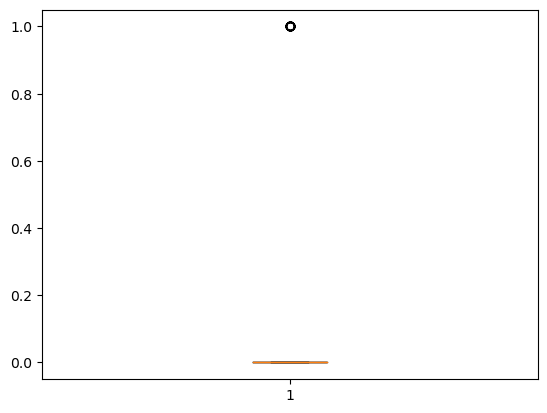

In [66]:
plt.boxplot('mobile_site_booking',data = travel_type_1)
plt.show()

In [67]:
Q1 = travel_type_1['mobile_site_booking'].quantile(0.25)

Q3 = travel_type_1['mobile_site_booking'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 0.0 | IQR: 0.0 | LL: 0.0 | UL: 0.0


In [68]:
ul_outlier_count = travel_type_1[travel_type_1['mobile_site_booking'] > UL].shape[0]
ll_outlier_count = travel_type_1[travel_type_1['mobile_site_booking'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_1.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 30 | LL_OC: 0 | T_OC: 30 | T_OP: 1.8879798615481436


In [69]:
mobile_site_booking_ul = travel_type_1.loc[travel_type_1['mobile_site_booking'] > UL].shape[0]

In [70]:
mobile_site_booking_ul

30

* Here there are only 30 outliers that they belong to the region beyond the Upper Limit(UL)
* To treat this we use flooring and capping method

In [71]:
print(travel_type_1['mobile_site_booking'].quantile(0.90))

0.0


In [72]:
travel_type_1['mobile_site_booking'] = np.where(travel_type_1['mobile_site_booking'] > 0, 0,travel_type_1['mobile_site_booking'])

print(travel_type_1['mobile_site_booking'].skew())

0


In [73]:
index = travel_type_1[(travel_type_1['mobile_site_booking'] > 0)].index
travel_type_1.drop(index, inplace = True)

In [74]:
travel_type_1['mobile_site_booking'].describe()

count    1589.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: mobile_site_booking, dtype: float64

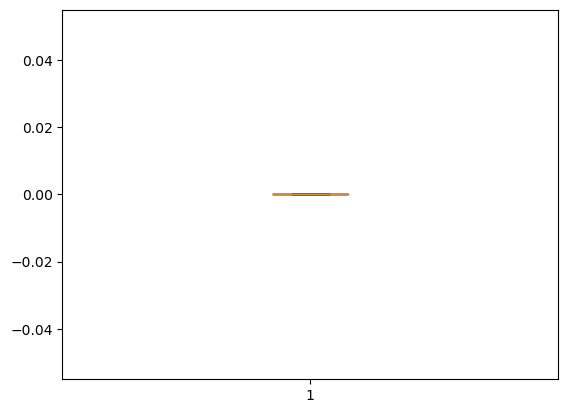

In [75]:
plt.boxplot('mobile_site_booking', data = travel_type_1)
plt.show()

In [76]:
travel_type_1.mobile_site_booking.value_counts()

0    1589
Name: mobile_site_booking, dtype: int64

* Now you can clearly see that this feature has been completely cleaned of outliers

### Treatment of 'from_date_hour' outliers

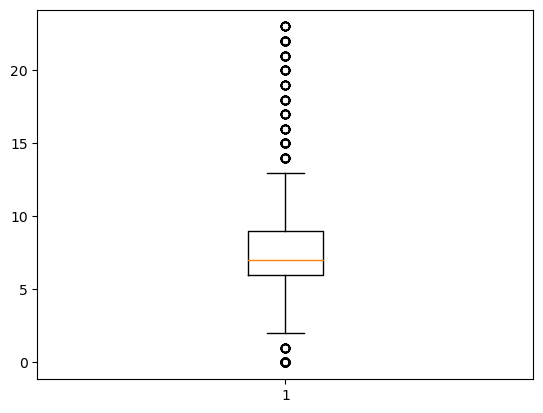

In [77]:
plt.boxplot('from_date_hour',data = travel_type_1)
plt.show()

In [78]:
Q1 = travel_type_1['from_date_hour'].quantile(0.25)

Q3 = travel_type_1['from_date_hour'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 6.0 | Q3: 9.0 | IQR: 3.0 | LL: 1.5 | UL: 13.5


In [79]:
ul_outlier_count = travel_type_1[travel_type_1['from_date_hour'] > UL].shape[0]
ll_outlier_count = travel_type_1[travel_type_1['from_date_hour'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_1.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 221 | LL_OC: 93 | T_OC: 314 | T_OP: 19.760855884203902


* The outlier percentage for the feature "from_date_hour" is (19.7%) which is >10%. Hence it is advised to treat the outliers as seperate dataframe from the base dataframe
* Hence we will be getting two extra dataframes on which we need to apply ML algorithms for classification

#### UL dataframe for 'from_date_hour'

In [80]:
from_date_hour_UL = travel_type_1[travel_type_1['from_date_hour'] > UL]

In [81]:
from_date_hour_UL

online_booking  mobile_site_booking  from_date_month  \
328                 0                    0                1   
704                 0                    0                1   
917                 0                    0                1   
1154                0                    0                1   
1391                1                    0                1   
...               ...                  ...              ...   
42846               1                    0               11   
43194               1                    0               11   
43342               1                    0               11   
43385               1                    0               11   
43407               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
328                    5              22                45   
704                    4              16                 0   
917                    5              14                30   
1154                   0              17                 0   
1391                   3              23                30   
...                  ...             ...               ...   
42846                  1              18                15   
43194                  4              21                 0   
43342                  5              22                 0   
43385                  4              14                 0   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
328                        1                        5                    15   
704                        1                        3                     8   
917                        1                        5                     9   
1154                       1                        0                    15   
1391                       1                        3                    11   
...                      ...                      ...                   ...   
42846                     11                        1                    15   
43194                     11                        4                    15   
43342                     11                        5                    17   
43385                     11                        5                    23   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
328                        29      436.0                  4   
704                        41     1879.0                  4   
917                        36      294.0                  4   
1154                       37       83.0                  4   
1391                       27      723.0                  4   
...                       ...        ...                ...   
42846                      15      180.0                  4   
43194                      52      308.0                  4   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
328                          4                  0                        0   
704                          4                  0                        0   
917                          4                  0                        0   
1154                         4                  0                        0   
1391                         4                  0                        0   
...                        ...                ...                      ...   
42846                        4                  0                        0   
43194                        4                  0                        0   
43342                        4                  0                        0   
43385              

### ML model for 'from_date_hour_UL'

In [82]:
x = from_date_hour_UL.iloc[:, 0:15]  # features

In [83]:
x

online_booking  mobile_site_booking  from_date_month  \
328                 0                    0                1   
704                 0                    0                1   
917                 0                    0                1   
1154                0                    0                1   
1391                1                    0                1   
...               ...                  ...              ...   
42846               1                    0               11   
43194               1                    0               11   
43342               1                    0               11   
43385               1                    0               11   
43407               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
328                    5              22                45   
704                    4              16                 0   
917                    5              14                30   
1154                   0              17                 0   
1391                   3              23                30   
...                  ...             ...               ...   
42846                  1              18                15   
43194                  4              21                 0   
43342                  5              22                 0   
43385                  4              14                 0   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
328                        1                        5                    15   
704                        1                        3                     8   
917                        1                        5                     9   
1154                       1                        0                    15   
1391                       1                        3                    11   
...                      ...                      ...                   ...   
42846                     11                        1                    15   
43194                     11                        4                    15   
43342                     11                        5                    17   
43385                     11                        5                    23   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
328                        29      436.0                  4   
704                        41     1879.0                  4   
917                        36      294.0                  4   
1154                       37       83.0                  4   
1391                       27      723.0                  4   
...                       ...        ...                ...   
42846                      15      180.0                  4   
43194                      52      308.0                  4   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
328                          4                  0                        0  
704                          4                  0                        0  
917                          4                  0                        0  
1154                         4                  0                        0  
1391                         4                  0                        0  
...                        ...                ...                      ...  
42846                        4                  0                        0  
43194                        4                  0                        0  
43342                        4                  0                        0  
43385                        

In [84]:
y = from_date_hour_UL.iloc[:,15]  # target

In [85]:
y

328      0
704      0
917      0
1154     0
1391     0
        ..
42846    0
43194    0
43342    0
43385    0
43407    0
Name: Car_Cancellation, Length: 221, dtype: int64

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=10)

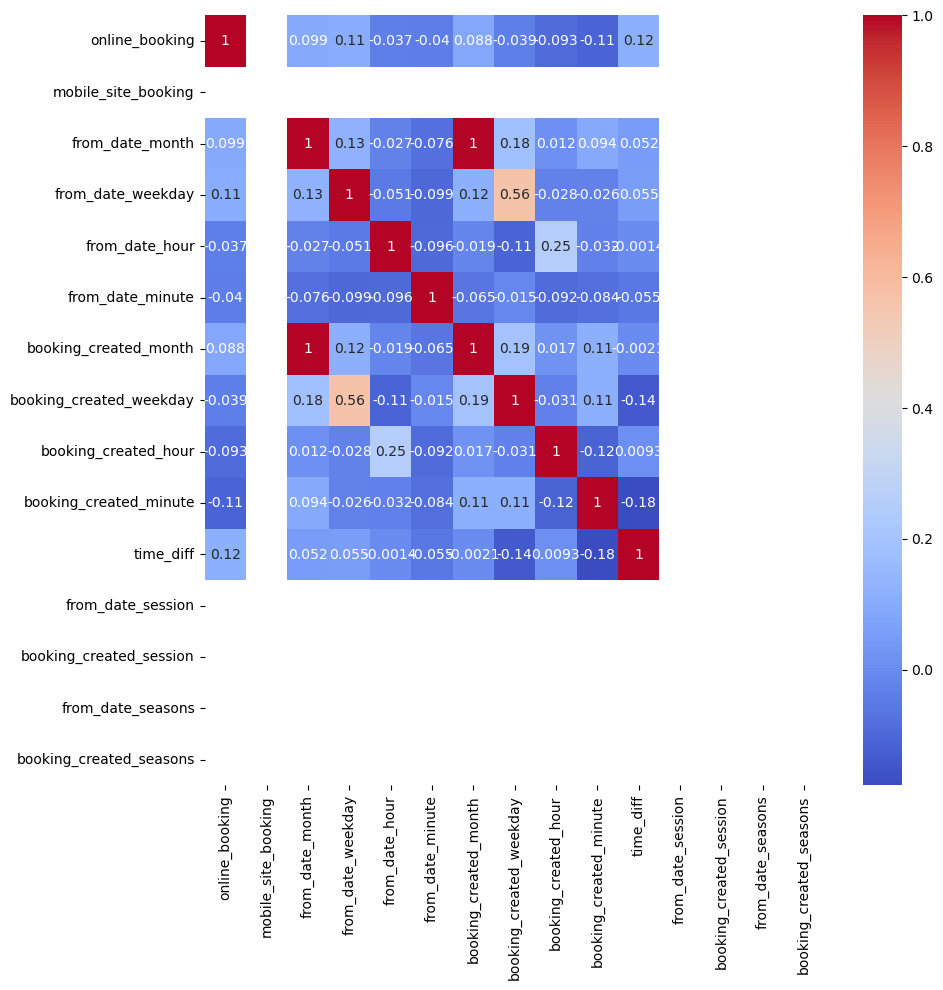

In [87]:
plt.figure(figsize = (10,10))
sns.heatmap(x_train.corr(), annot = True, cmap='coolwarm', fmt = '.2g')
plt.show()

In [88]:
x_train = x_train.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis=1)
x_train

online_booking  from_date_month  from_date_weekday  from_date_hour  \
39437               0               10                  4              22   
38283               0               10                  3              22   
18713               0                6                  0              15   
24101               1                8                  3              15   
21183               0                7                  4              22   
...               ...              ...                ...             ...   
23942               1                7                  0              23   
13595               1                5                  2              15   
5523                0                2                  1              15   
26368               1                8                  3              20   
4674                0                2                  6              19   

       from_date_minute  booking_created_month  booking_created_weekday  \
39437                 0                     10                        4   
38283                 0                     10                        3   
18713                30                      6                        0   
24101                 0                      7                        1   
21183                 0                      7                        4   
...                 ...                    ...                      ...   
23942                 0                      7                        6   
13595                30                      5                        1   
5523                  0                      2                        0   
26368                 0                      8                        0   
4674                  0                      2                        6   

       booking_created_hour  booking_created_minute  time_diff  
39437                    16                      55      305.0  
38283                    19                      31    20309.0  
18713                    14                      26       64.0  
24101                     0                      28    33992.0  
21183                    16                      40      320.0  
...                     ...                     ...        ...  
23942                    21                      30    11610.0  
13595                    10                      12    11838.0  
5523                     21                      20     1060.0  
26368                    13                      47     4693.0  
4674                     17                      40       80.0  

[154 rows x 10 columns]

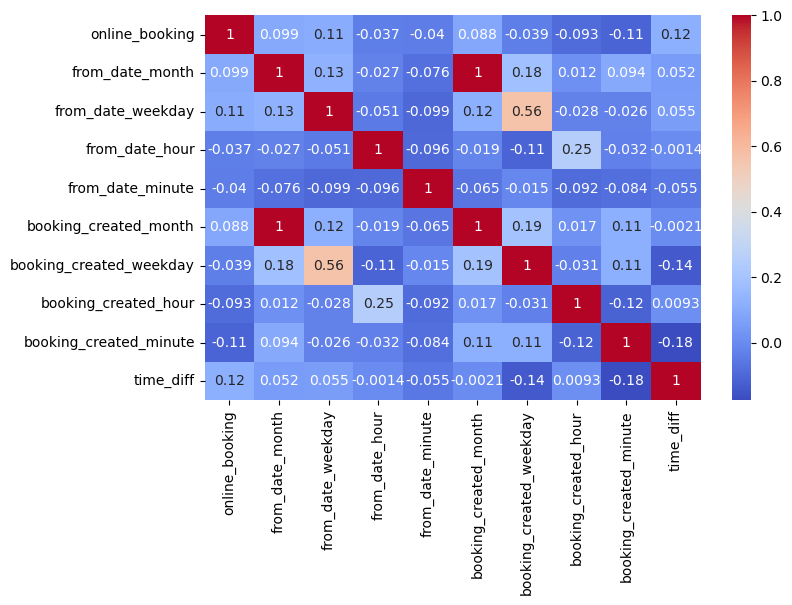

In [89]:
plt.figure(figsize = (8,5))
sns.heatmap(x_train.corr(),annot = True,cmap='coolwarm',fmt = '.2g')
plt.show()

In [90]:
# dropping:  booking_created_month,booking_created_weekday,booking_created_hour

x_train = x_train.drop(['booking_created_month','booking_created_weekday','booking_created_hour'],axis = 1)
x_train

online_booking  from_date_month  from_date_weekday  from_date_hour  \
39437               0               10                  4              22   
38283               0               10                  3              22   
18713               0                6                  0              15   
24101               1                8                  3              15   
21183               0                7                  4              22   
...               ...              ...                ...             ...   
23942               1                7                  0              23   
13595               1                5                  2              15   
5523                0                2                  1              15   
26368               1                8                  3              20   
4674                0                2                  6              19   

       from_date_minute  booking_created_minute  time_diff  
39437                 0                      55      305.0  
38283                 0                      31    20309.0  
18713                30                      26       64.0  
24101                 0                      28    33992.0  
21183                 0                      40      320.0  
...                 ...                     ...        ...  
23942                 0                      30    11610.0  
13595                30                      12    11838.0  
5523                  0                      20     1060.0  
26368                 0                      47     4693.0  
4674                  0                      40       80.0  

[154 rows x 7 columns]

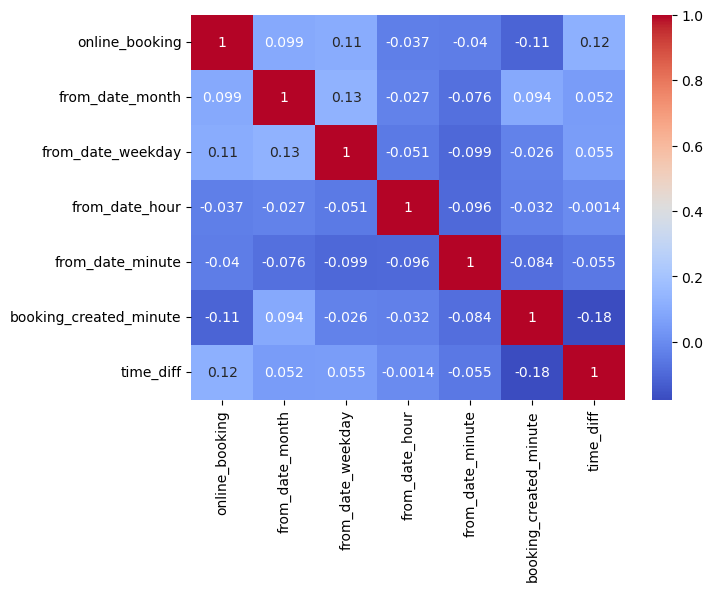

In [91]:
plt.figure(figsize = (7,5))
sns.heatmap(x_train.corr(),annot = True,cmap='coolwarm',fmt = '.2g')
plt.show()

In [92]:
x_test = x_test.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons','booking_created_month','booking_created_weekday','booking_created_hour'],axis = 1)

In [93]:
x_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
34344               1                9                  5              22   
37712               0               11                  5              18   
37725               1               10                  6              18   
11891               0                5                  4              22   
39023               1               10                  2              22   

       from_date_minute  booking_created_minute  time_diff  
34344                 0                      38      562.0  
37712                 0                      33    29007.0  
37725                 0                      56      124.0  
11891                30                      36     3114.0  
39023                 0                      31     1589.0

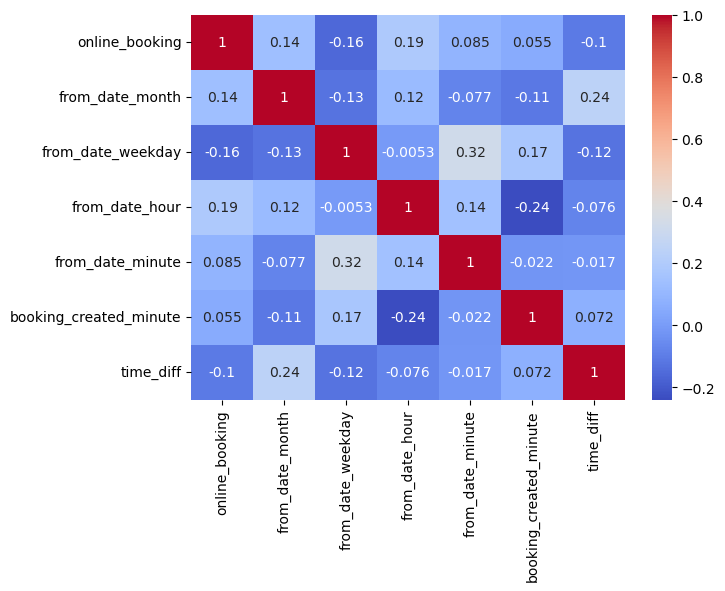

In [94]:
plt.figure(figsize = (7,5))
sns.heatmap(x_test.corr(),annot = True,cmap='coolwarm',fmt = '.2g')
plt.show()

In [95]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [96]:
classifier = LogisticRegression()
lr = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

In [97]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       0.00      0.00      0.00         1

    accuracy                           0.99       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.99      0.99      0.99       154

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       0.00      0.00      0.00         1

    accuracy                           0.99        67
   macro avg       0.49      0.50      0.50        67
weighted avg       0.97      0.99      0.98        67



In [98]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
conf_matrix

array([[66,  0],
       [ 1,  0]], dtype=int64)

<Axes: >

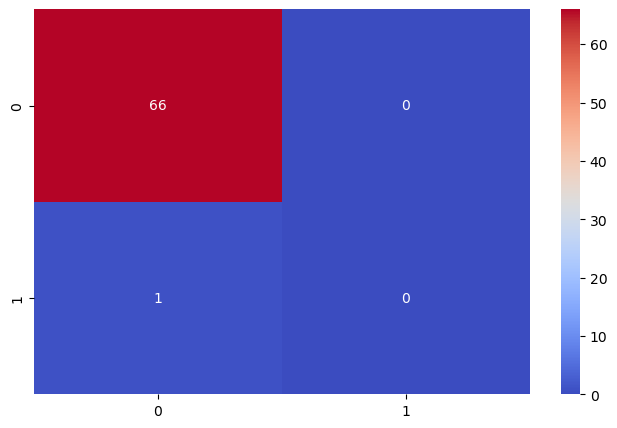

In [99]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, ax = ax, cmap='coolwarm')

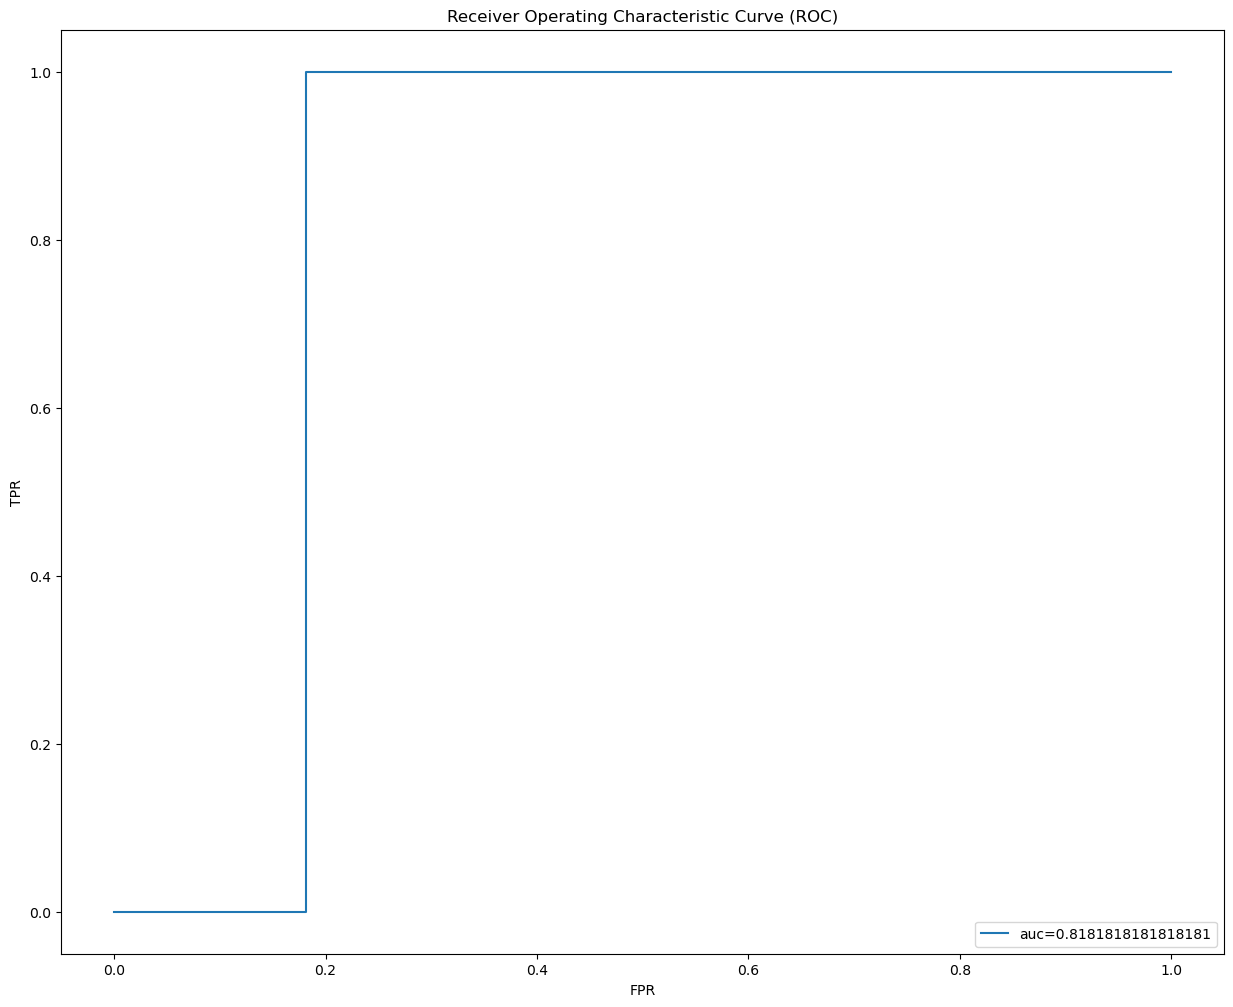

In [100]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc=" + str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* Have used Logistic Regression modelling as it is a Classification problem
* The area under the ROC curve(AUC) is seen to be **0.81**, which means the model is going to give good results for the similar kind of data that it digests

#### LL dataframe for 'from_date_hour'

In [101]:
from_date_hour_LL = travel_type_1[travel_type_1['from_date_hour'] < LL]

In [102]:
from_date_hour_LL

online_booking  mobile_site_booking  from_date_month  \
717                 1                    0                2   
871                 1                    0                1   
1418                0                    0                1   
1836                0                    0                1   
1853                0                    0                1   
...               ...                  ...              ...   
38270               0                    0               10   
38412               0                    0               10   
39309               1                    0               10   
40829               0                    0               11   
41039               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
717                    4               1                 0   
871                    5               1                 0   
1418                   5               0                30   
1836                   1               0                30   
1853                   1               0                30   
...                  ...             ...               ...   
38270                  5               0                 0   
38412                  5               0                 0   
39309                  5               1                 0   
40829                  5               0                30   
41039                  0               0                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
717                        1                        3                    12   
871                        1                        4                    19   
1418                       1                        3                    15   
1836                       1                        0                    13   
1853                       1                        0                    14   
...                      ...                      ...                   ...   
38270                     10                        3                    16   
38412                     10                        4                    17   
39309                     10                        3                    21   
40829                     11                        4                    13   
41039                     11                        6                    20   

       booking_created_minute  time_diff  from_date_session  \
717                        46    41054.0                  4   
871                        31      329.0                  4   
1418                       56     1954.0                  4   
1836                       19      671.0                  4   
1853                       24      606.0                  4   
...                       ...        ...                ...   
38270                      53     1867.0                  4   
38412                      11      409.0                  4   
39309                      31     1649.0                  4   
40829                      50      640.0                  4   
41039                      45      195.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
717                          4                  0                        0   
871                          4                  0                        0   
1418                         4                  0                        0   
1836                         4                  0                        0   
1853                         4                  0                        0   
...                        ...                ...                      ...   
38270                        4                  0                        0   
38412                        4                  0                        0   
39309                        4                  0                        0   
40829              

In [103]:
from_date_hour_LL.from_date_hour.value_counts()

0    70
1    23
Name: from_date_hour, dtype: int64

In [104]:
from_date_hour_LL['Car_Cancellation'] = from_date_hour_LL['from_date_hour']

In [105]:
from_date_hour_LL

online_booking  mobile_site_booking  from_date_month  \
717                 1                    0                2   
871                 1                    0                1   
1418                0                    0                1   
1836                0                    0                1   
1853                0                    0                1   
...               ...                  ...              ...   
38270               0                    0               10   
38412               0                    0               10   
39309               1                    0               10   
40829               0                    0               11   
41039               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
717                    4               1                 0   
871                    5               1                 0   
1418                   5               0                30   
1836                   1               0                30   
1853                   1               0                30   
...                  ...             ...               ...   
38270                  5               0                 0   
38412                  5               0                 0   
39309                  5               1                 0   
40829                  5               0                30   
41039                  0               0                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
717                        1                        3                    12   
871                        1                        4                    19   
1418                       1                        3                    15   
1836                       1                        0                    13   
1853                       1                        0                    14   
...                      ...                      ...                   ...   
38270                     10                        3                    16   
38412                     10                        4                    17   
39309                     10                        3                    21   
40829                     11                        4                    13   
41039                     11                        6                    20   

       booking_created_minute  time_diff  from_date_session  \
717                        46    41054.0                  4   
871                        31      329.0                  4   
1418                       56     1954.0                  4   
1836                       19      671.0                  4   
1853                       24      606.0                  4   
...                       ...        ...                ...   
38270                      53     1867.0                  4   
38412                      11      409.0                  4   
39309                      31     1649.0                  4   
40829                      50      640.0                  4   
41039                      45      195.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
717                          4                  0                        0   
871                          4                  0                        0   
1418                         4                  0                        0   
1836                         4                  0                        0   
1853                         4                  0                        0   
...                        ...                ...                      ...   
38270                        4                  0                        0   
38412                        4                  0                        0   
39309                        4                  0                        0   
40829              

In [106]:
from_date_hour_LL.Car_Cancellation.value_counts()

0    70
1    23
Name: Car_Cancellation, dtype: int64

* As this dataframe consists of only unique value which was 0 . It was not possible to implement LogisticRegression model for the given Classification problem
* Hence tuned it in the above shown manner. Now that its sorted, we can perform predictive modelling on this

### ML Model for 'from_date_hour_LL'

In [107]:
X = from_date_hour_LL.iloc[:,0:15]   #features
X.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
717                1                    0                2                  4   
871                1                    0                1                  5   
1418               0                    0                1                  5   
1836               0                    0                1                  1   
1853               0                    0                1                  1   

      from_date_hour  from_date_minute  booking_created_month  \
717                1                 0                      1   
871                1                 0                      1   
1418               0                30                      1   
1836               0                30                      1   
1853               0                30                      1   

      booking_created_weekday  booking_created_hour  booking_created_minute  \
717                         3                    12                      46   
871                         4                    19                      31   
1418                        3                    15                      56   
1836                        0                    13                      19   
1853                        0                    14                      24   

      time_diff  from_date_session  booking_created_session  \
717     41054.0                  4                        4   
871       329.0                  4                        4   
1418     1954.0                  4                        4   
1836      671.0                  4                        4   
1853      606.0                  4                        4   

      from_date_seasons  booking_created_seasons  
717                   0                        0  
871                   0                        0  
1418                  0                        0  
1836                  0                        0  
1853                  0                        0

In [108]:
Y = from_date_hour_LL.iloc[:,15]   #target
Y

717      1
871      1
1418     0
1836     0
1853     0
        ..
38270    0
38412    0
39309    1
40829    0
41039    0
Name: Car_Cancellation, Length: 93, dtype: int64

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 5)

In [110]:
X_train.head()

online_booking  mobile_site_booking  from_date_month  \
11610               1                    0                5   
36330               1                    0               10   
40829               0                    0               11   
26985               0                    0                8   
22015               1                    0                7   

       from_date_weekday  from_date_hour  from_date_minute  \
11610                  5               0                 0   
36330                  5               1                 0   
40829                  5               0                30   
26985                  5               0                 0   
22015                  5               0                15   

       booking_created_month  booking_created_weekday  booking_created_hour  \
11610                      4                        0                    17   
36330                     10                        4                    15   
40829                     11                        4                    13   
26985                      8                        4                     9   
22015                      7                        2                     1   

       booking_created_minute  time_diff  from_date_session  \
11610                      33     6147.0                  4   
36330                      15      585.0                  4   
40829                      50      640.0                  4   
26985                      19      881.0                  4   
22015                      31     4244.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
11610                        4                  0                        0  
36330                        4                  0                        0  
40829                        4                  0                        0  
26985                        4                  0                        0  
22015                        4                  0                        0

In [111]:
X_test.head()

online_booking  mobile_site_booking  from_date_month  \
17162               1                    0                6   
14244               1                    0                5   
23442               1                    0                7   
32132               1                    0                9   
24265               1                    0                7   

       from_date_weekday  from_date_hour  from_date_minute  \
17162                  5               0                 0   
14244                  0               0                30   
23442                  4               1                 0   
32132                  5               0                15   
24265                  4               0                30   

       booking_created_month  booking_created_weekday  booking_created_hour  \
17162                      6                        3                    21   
14244                      5                        6                     3   
23442                      7                        3                    21   
32132                      9                        4                    19   
24265                      7                        2                    12   

       booking_created_minute  time_diff  from_date_session  \
17162                      31     1589.0                  4   
14244                      51     1239.0                  4   
23442                      58      182.0                  4   
32132                      15      300.0                  4   
24265                       2     2188.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
17162                        4                  0                        0  
14244                        4                  0                        0  
23442                        4                  0                        0  
32132                        4                  0                        0  
24265                        4                  0                        0

In [112]:
X_train = X_train.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)
X_test = X_test.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)

In [113]:
X_train.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
11610               1                5                  5               0   
36330               1               10                  5               1   
40829               0               11                  5               0   
26985               0                8                  5               0   
22015               1                7                  5               0   

       from_date_minute  booking_created_month  booking_created_weekday  \
11610                 0                      4                        0   
36330                 0                     10                        4   
40829                30                     11                        4   
26985                 0                      8                        4   
22015                15                      7                        2   

       booking_created_hour  booking_created_minute  time_diff  
11610                    17                      33     6147.0  
36330                    15                      15      585.0  
40829                    13                      50      640.0  
26985                     9                      19      881.0  
22015                     1                      31     4244.0

In [114]:
X_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
17162               1                6                  5               0   
14244               1                5                  0               0   
23442               1                7                  4               1   
32132               1                9                  5               0   
24265               1                7                  4               0   

       from_date_minute  booking_created_month  booking_created_weekday  \
17162                 0                      6                        3   
14244                30                      5                        6   
23442                 0                      7                        3   
32132                15                      9                        4   
24265                30                      7                        2   

       booking_created_hour  booking_created_minute  time_diff  
17162                    21                      31     1589.0  
14244                     3                      51     1239.0  
23442                    21                      58      182.0  
32132                    19                      15      300.0  
24265                    12                       2     2188.0

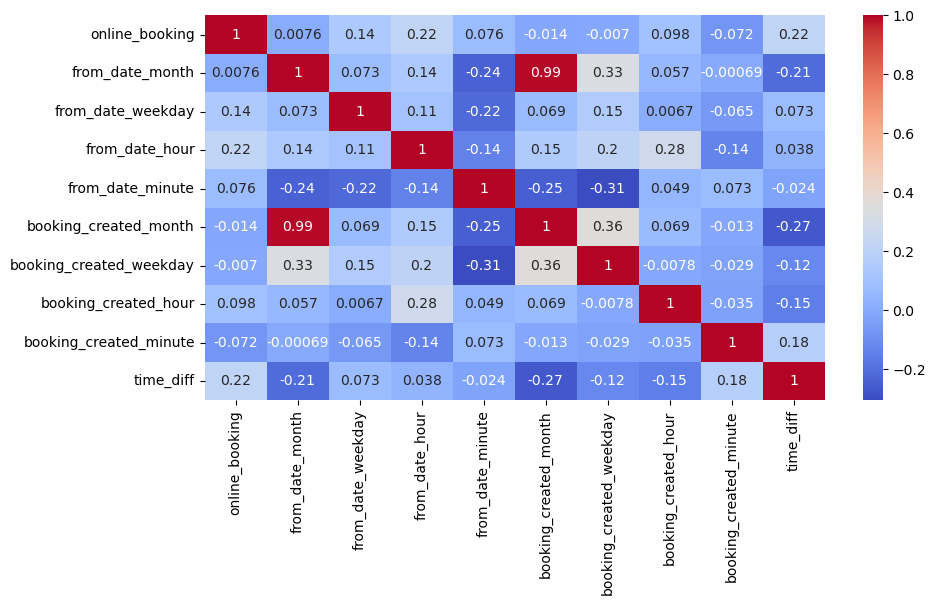

In [115]:
plt.figure(figsize = (10,5))
sns.heatmap(X_train.corr(),annot = True, cmap='coolwarm')
plt.show()

# booking_created_month,booking_created_weekday

In [116]:
X_train = X_train.drop(['booking_created_month','booking_created_weekday'],axis = 1)
X_train

online_booking  from_date_month  from_date_weekday  from_date_hour  \
11610               1                5                  5               0   
36330               1               10                  5               1   
40829               0               11                  5               0   
26985               0                8                  5               0   
22015               1                7                  5               0   
...               ...              ...                ...             ...   
2989                1                2                  5               0   
32127               1                9                  5               0   
8332                1                3                  5               0   
26768               0                8                  4               0   
33744               1                9                  1               1   

       from_date_minute  booking_created_hour  booking_created_minute  \
11610                 0                    17                      33   
36330                 0                    15                      15   
40829                30                    13                      50   
26985                 0                     9                      19   
22015                15                     1                      31   
...                 ...                   ...                     ...   
2989                 30                    13                       4   
32127                 0                    18                      48   
8332                 30                    21                      17   
26768                 0                     2                      31   
33744                45                    22                      32   

       time_diff  
11610     6147.0  
36330      585.0  
40829      640.0  
26985      881.0  
22015     4244.0  
...          ...  
2989       686.0  
32127      312.0  
8332       193.0  
26768     1289.0  
33744      193.0  

[65 rows x 8 columns]

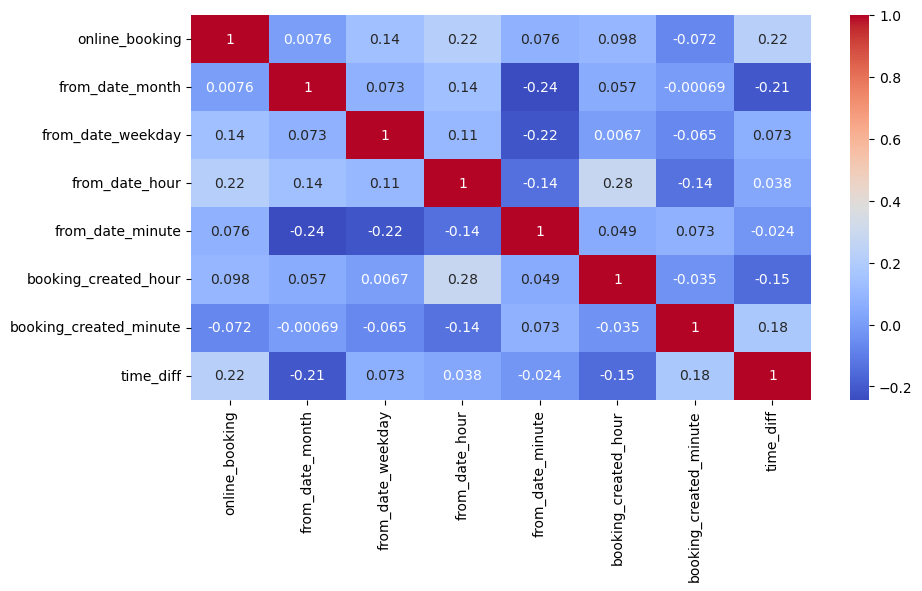

In [117]:
plt.figure(figsize = (10,5))
sns.heatmap(X_train.corr(),annot = True, cmap='coolwarm')
plt.show()

In [118]:
X_test = X_test.drop(['booking_created_month', 'booking_created_weekday'],axis = 1)

In [119]:
X_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
17162               1                6                  5               0   
14244               1                5                  0               0   
23442               1                7                  4               1   
32132               1                9                  5               0   
24265               1                7                  4               0   

       from_date_minute  booking_created_hour  booking_created_minute  \
17162                 0                    21                      31   
14244                30                     3                      51   
23442                 0                    21                      58   
32132                15                    19                      15   
24265                30                    12                       2   

       time_diff  
17162     1589.0  
14244     1239.0  
23442      182.0  
32132      300.0  
24265     2188.0

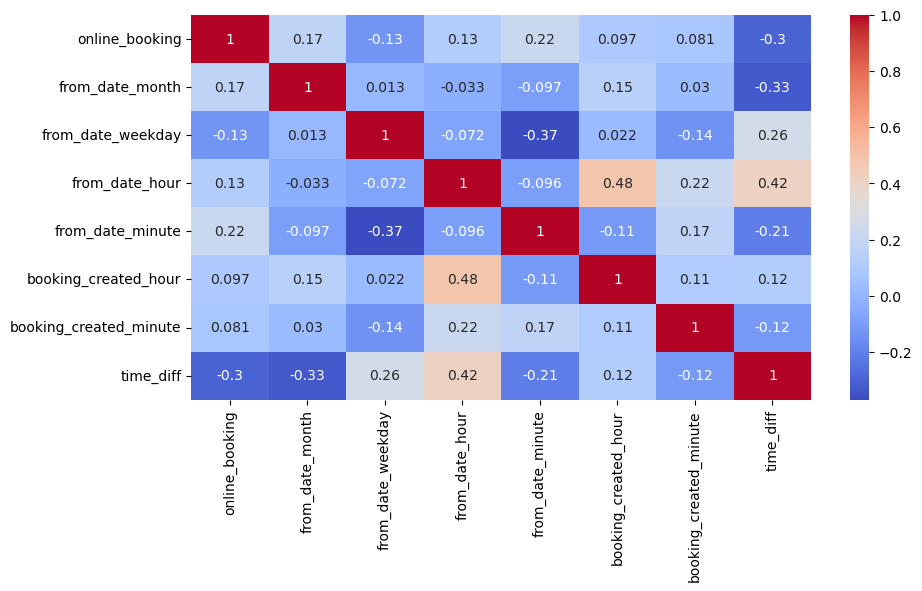

In [120]:
plt.figure(figsize = (10,5))
sns.heatmap(X_test.corr(),annot = True, cmap='coolwarm')
plt.show()

In [121]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [122]:
classifier = LogisticRegression()
lr = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

In [123]:
print(classification_report(Y_train,Y_pred_train))
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        18

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         5

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [124]:
conf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[23,  0],
       [ 0,  5]], dtype=int64)

<Axes: >

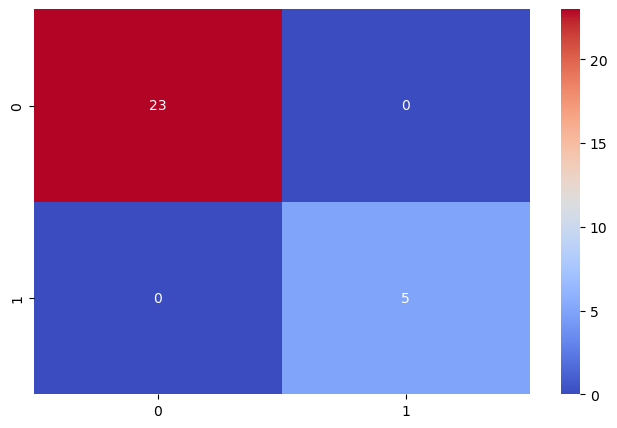

In [125]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax, cmap='coolwarm')

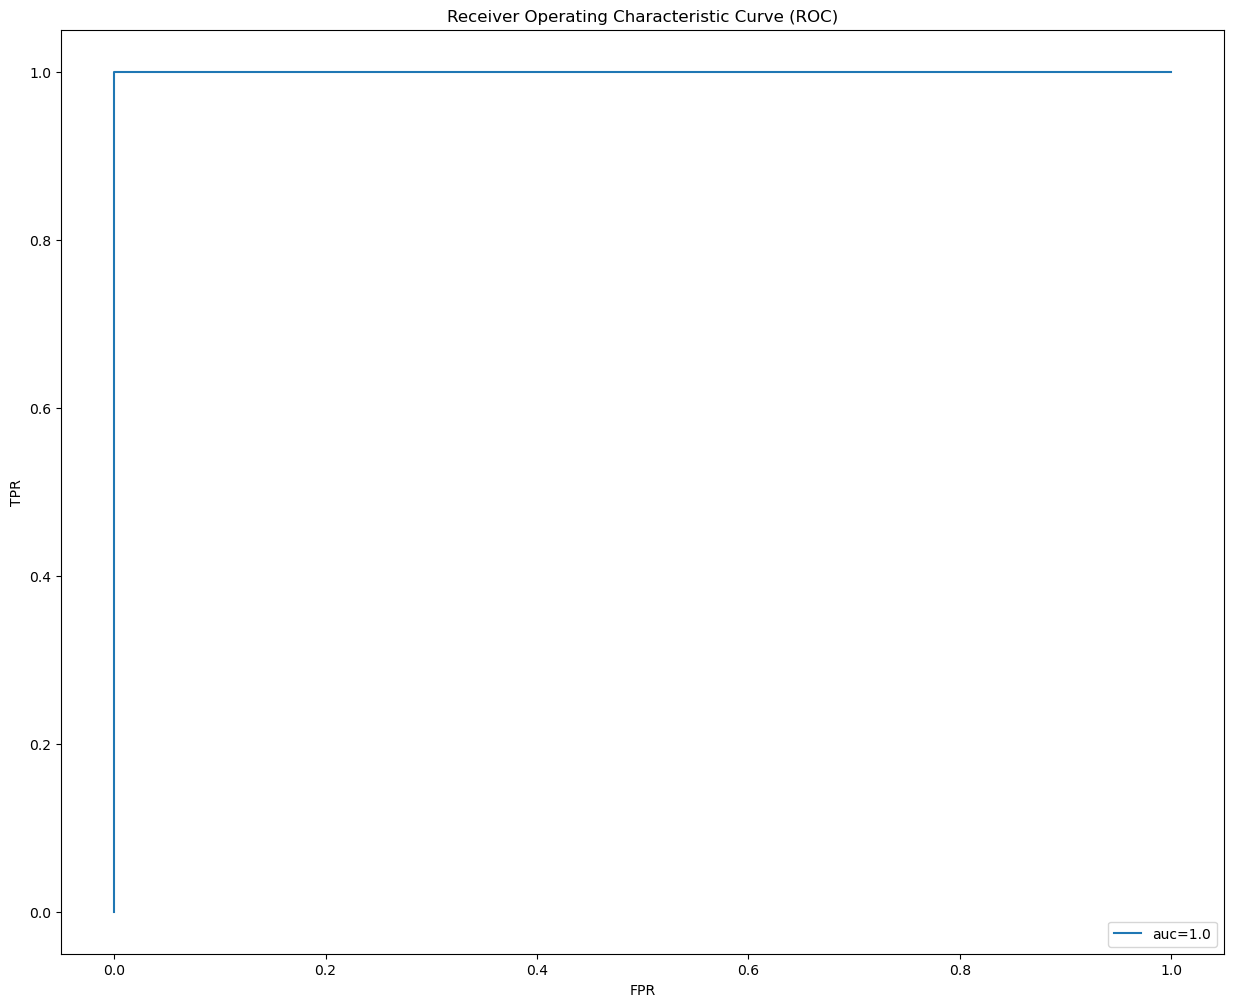

In [126]:
Y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc=" + str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* Have used Logistic Regression modelling as it is a Classification problem
* The area under the ROC curve(AUC) is seen to be **1** which is really rare and considered to be great. The True Positives and True Negatives don't overlap at all

### Treatment of 'time_diff' outliers

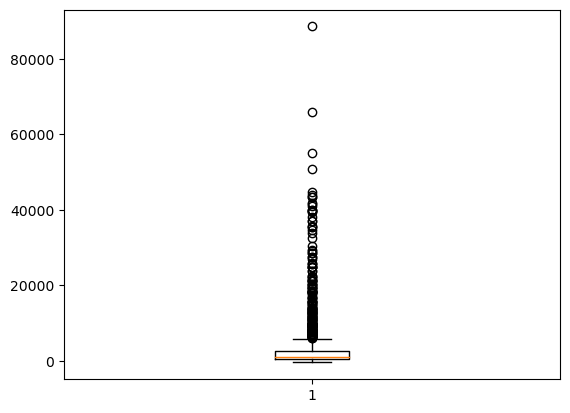

In [127]:
plt.boxplot('time_diff', data = travel_type_1)
plt.show()

In [128]:
Q1 = travel_type_1['time_diff'].quantile(0.25)

Q3 = travel_type_1['time_diff'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 543.0 | Q3: 2673.0 | IQR: 2130.0 | LL: -2652.0 | UL: 5868.0


In [129]:
ul_outlier_count = travel_type_1[travel_type_1['time_diff'] > UL].shape[0]
ll_outlier_count = travel_type_1[travel_type_1['time_diff'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_1.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 219 | LL_OC: 0 | T_OC: 219 | T_OP: 13.782252989301448


* The feature 'time_diff' has only outliers beyond the Upper Limit
* Their percentage is also above 10% i.e **13.7%** hence we need to create a seperate dataframe and treat them seperately

#### UL dataframe for 'time_diff

In [130]:
time_diff_ul = travel_type_1[travel_type_1['time_diff'] > UL]

In [131]:
time_diff_ul

online_booking  mobile_site_booking  from_date_month  \
17                  1                    0                1   
243                 0                    0                1   
422                 1                    0                1   
717                 1                    0                2   
869                 1                    0                1   
...               ...                  ...              ...   
42269               1                    0               11   
42557               1                    0               11   
42794               1                    0               12   
43385               1                    0               11   
43407               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
17                     5               8                 0   
243                    2               6                 0   
422                    5               7                 0   
717                    4               1                 0   
869                    4               9                 0   
...                  ...             ...               ...   
42269                  3              17                15   
42557                  5               9                 0   
42794                  4               6                30   
43385                  4              14                 0   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
17                         1                        1                    12   
243                        1                        4                    14   
422                        1                        6                    14   
717                        1                        3                    12   
869                        1                        4                    19   
...                      ...                      ...                   ...   
42269                     11                        3                    11   
42557                     11                        5                    15   
42794                     11                        0                    22   
43385                     11                        5                    23   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
17                         17    15583.0                  4   
243                        40     6680.0                  4   
422                        57    18243.0                  4   
717                        46    41054.0                  4   
869                        22     9458.0                  4   
...                       ...        ...                ...   
42269                      19    10436.0                  4   
42557                      38     9682.0                  4   
42794                      55    55175.0                  4   
43385                      24     8076.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
17                           4                  0                        0   
243                          4                  0                        0   
422                          4                  0                        0   
717                          4                  0                        0   
869                          4                  0                        0   
...                        ...                ...                      ...   
42269                        4                  0                        0   
42557                        4                  0                        0   
42794                        4                  0                        0   
43385              

### ML Model for 'time_diff_ul'

In [132]:
time_diff_ul.Car_Cancellation.value_counts()

0    217
1      2
Name: Car_Cancellation, dtype: int64

In [133]:
p = time_diff_ul.iloc[:,0:15]
p.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
17                1                    0                1                  5   
243               0                    0                1                  2   
422               1                    0                1                  5   
717               1                    0                2                  4   
869               1                    0                1                  4   

     from_date_hour  from_date_minute  booking_created_month  \
17                8                 0                      1   
243               6                 0                      1   
422               7                 0                      1   
717               1                 0                      1   
869               9                 0                      1   

     booking_created_weekday  booking_created_hour  booking_created_minute  \
17                         1                    12                      17   
243                        4                    14                      40   
422                        6                    14                      57   
717                        3                    12                      46   
869                        4                    19                      22   

     time_diff  from_date_session  booking_created_session  from_date_seasons  \
17     15583.0                  4                        4                  0   
243     6680.0                  4                        4                  0   
422    18243.0                  4                        4                  0   
717    41054.0                  4                        4                  0   
869     9458.0                  4                        4                  0   

     booking_created_seasons  
17                         0  
243                        0  
422                        0  
717                        0  
869                        0

In [134]:
q = time_diff_ul.iloc[:,15]
q

17       0
243      0
422      0
717      0
869      0
        ..
42269    0
42557    0
42794    0
43385    0
43407    0
Name: Car_Cancellation, Length: 219, dtype: int64

In [135]:
p_train,p_test,q_train,q_test = train_test_split(p,q,train_size = 0.65,random_state = 5)

In [136]:
p_train.head()

online_booking  mobile_site_booking  from_date_month  \
18316               0                    0                6   
4739                1                    0                2   
13656               0                    0                5   
38099               1                    0               10   
36712               0                    0               10   

       from_date_weekday  from_date_hour  from_date_minute  \
18316                  3               9                30   
4739                   2              10                 0   
13656                  6              10                45   
38099                  5               3                30   
36712                  5               8                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
18316                      6                        4                    15   
4739                       2                        0                    14   
13656                      5                        1                    17   
38099                     10                        2                    11   
36712                     10                        0                    12   

       booking_created_minute  time_diff  from_date_session  \
18316                      18    18372.0                  4   
4739                       29    12691.0                  4   
13656                      47     6778.0                  4   
38099                      45    13905.0                  4   
36712                      40     6920.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
18316                        4                  0                        0  
4739                         4                  0                        0  
13656                        4                  0                        0  
38099                        4                  0                        0  
36712                        4                  0                        0

In [137]:
p_test.head()

online_booking  mobile_site_booking  from_date_month  \
6753                0                    0                3   
11684               1                    0                5   
42043               0                    0               11   
11550               0                    0                5   
7444                1                    0                3   

       from_date_weekday  from_date_hour  from_date_minute  \
6753                   3              20                30   
11684                  5               5                 0   
42043                  0               8                 0   
11550                  6               7                15   
7444                   2               6                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6753                       3                        0                    14   
11684                      4                        1                    10   
42043                     11                        1                    13   
11550                      4                        0                    10   
7444                       3                        2                    17   

       booking_created_minute  time_diff  from_date_session  \
6753                        1    24869.0                  4   
11684                      20    35680.0                  4   
42043                      13     8327.0                  4   
11550                      24    28611.0                  4   
7444                       46     9374.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
6753                         4                  0                        0  
11684                        4                  0                        0  
42043                        4                  0                        0  
11550                        4                  0                        0  
7444                         4                  0                        0

In [138]:
p_train = p_train.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)
p_test = p_test.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)

In [139]:
p_train.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
18316               0                6                  3               9   
4739                1                2                  2              10   
13656               0                5                  6              10   
38099               1               10                  5               3   
36712               0               10                  5               8   

       from_date_minute  booking_created_month  booking_created_weekday  \
18316                30                      6                        4   
4739                  0                      2                        0   
13656                45                      5                        1   
38099                30                     10                        2   
36712                 0                     10                        0   

       booking_created_hour  booking_created_minute  time_diff  
18316                    15                      18    18372.0  
4739                     14                      29    12691.0  
13656                    17                      47     6778.0  
38099                    11                      45    13905.0  
36712                    12                      40     6920.0

In [140]:
p_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
6753                0                3                  3              20   
11684               1                5                  5               5   
42043               0               11                  0               8   
11550               0                5                  6               7   
7444                1                3                  2               6   

       from_date_minute  booking_created_month  booking_created_weekday  \
6753                 30                      3                        0   
11684                 0                      4                        1   
42043                 0                     11                        1   
11550                15                      4                        0   
7444                  0                      3                        2   

       booking_created_hour  booking_created_minute  time_diff  
6753                     14                       1    24869.0  
11684                    10                      20    35680.0  
42043                    13                      13     8327.0  
11550                    10                      24    28611.0  
7444                     17                      46     9374.0

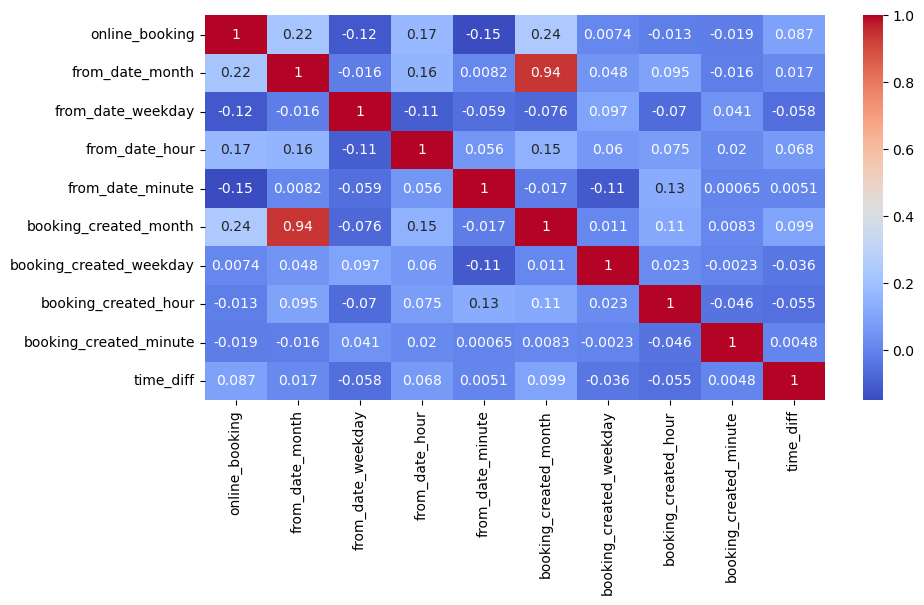

In [141]:
plt.figure(figsize = (10,5))
sns.heatmap(p_train.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [142]:
p_train = p_train.drop(['booking_created_month'],axis = 1)
p_train

online_booking  from_date_month  from_date_weekday  from_date_hour  \
18316               0                6                  3               9   
4739                1                2                  2              10   
13656               0                5                  6              10   
38099               1               10                  5               3   
36712               0               10                  5               8   
...               ...              ...                ...             ...   
29835               1                9                  5              10   
24101               1                8                  3              15   
37928               1               10                  3              10   
40984               0               11                  2              15   
19559               0                6                  5               4   

       from_date_minute  booking_created_weekday  booking_created_hour  \
18316                30                        4                    15   
4739                  0                        0                    14   
13656                45                        1                    17   
38099                30                        2                    11   
36712                 0                        0                    12   
...                 ...                      ...                   ...   
29835                 0                        6                    12   
24101                 0                        1                     0   
37928                 0                        0                    20   
40984                 0                        6                    10   
19559                30                        6                    20   

       booking_created_minute  time_diff  
18316                      18    18372.0  
4739                       29    12691.0  
13656                      47     6778.0  
38099                      45    13905.0  
36712                      40     6920.0  
...                       ...        ...  
29835                      37    18563.0  
24101                      28    33992.0  
37928                      39    23841.0  
40984                      51    14649.0  
19559                      35     7675.0  

[142 rows x 9 columns]

In [143]:
p_test = p_test.drop(['booking_created_month'],axis = 1)
p_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
6753                0                3                  3              20   
11684               1                5                  5               5   
42043               0               11                  0               8   
11550               0                5                  6               7   
7444                1                3                  2               6   

       from_date_minute  booking_created_weekday  booking_created_hour  \
6753                 30                        0                    14   
11684                 0                        1                    10   
42043                 0                        1                    13   
11550                15                        0                    10   
7444                  0                        2                    17   

       booking_created_minute  time_diff  
6753                        1    24869.0  
11684                      20    35680.0  
42043                      13     8327.0  
11550                      24    28611.0  
7444                       46     9374.0

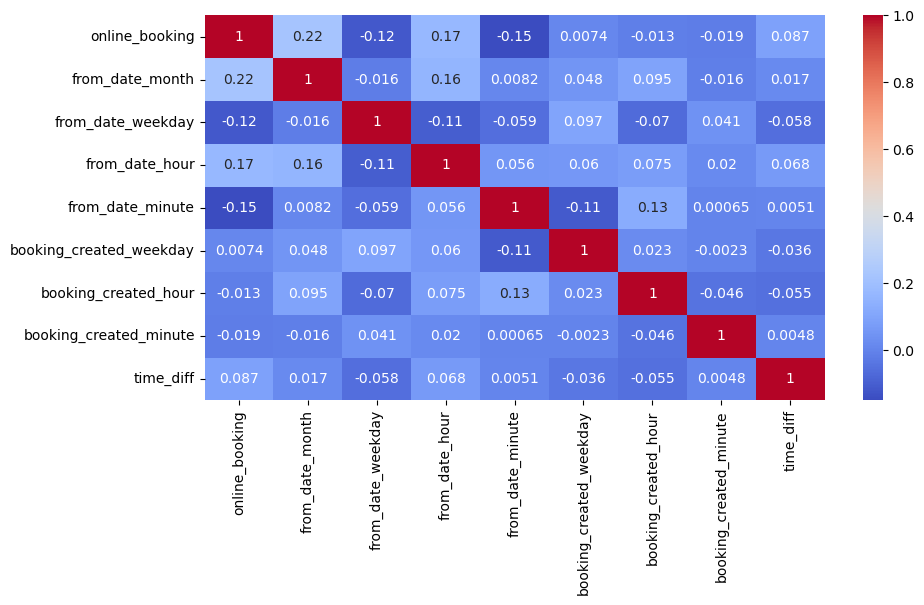

In [144]:
plt.figure(figsize = (10,5))
sns.heatmap(p_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

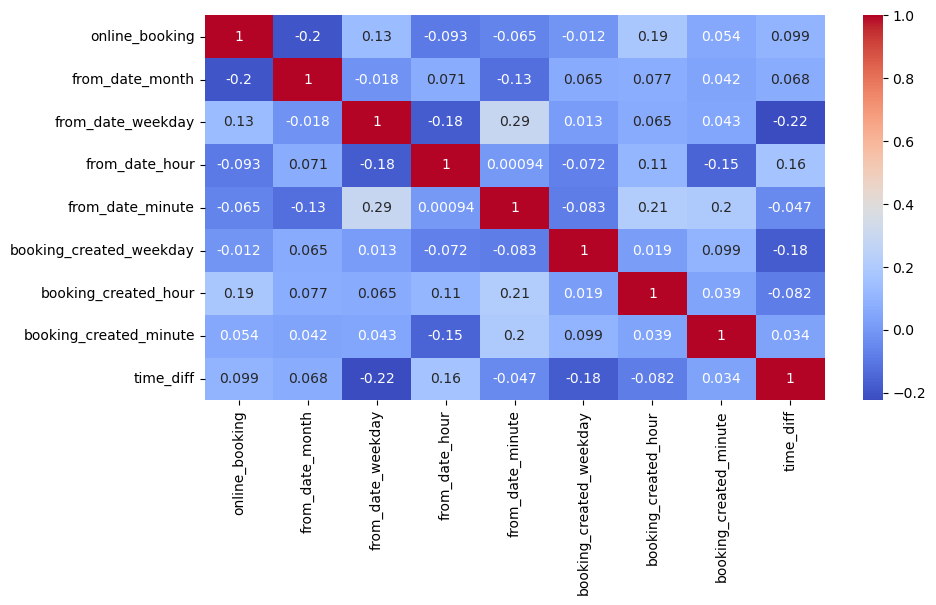

In [145]:
plt.figure(figsize = (10,5))
sns.heatmap(p_test.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [146]:
ss = StandardScaler()
p_train = ss.fit_transform(p_train)
p_test = ss.transform(p_test)

In [147]:
classifier = LogisticRegression()
lr = classifier.fit(p_train,q_train)
q_pred = classifier.predict(p_test)
q_pred_train = classifier.predict(p_train)

In [148]:
print(classification_report(q_train,q_pred_train))
print(classification_report(q_test,q_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       141
           1       0.00      0.00      0.00         1

    accuracy                           0.99       142
   macro avg       0.50      0.50      0.50       142
weighted avg       0.99      0.99      0.99       142

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       0.00      0.00      0.00         1

    accuracy                           0.99        77
   macro avg       0.49      0.50      0.50        77
weighted avg       0.97      0.99      0.98        77



In [149]:
conf_matrix = metrics.confusion_matrix(q_test,q_pred)
conf_matrix

array([[76,  0],
       [ 1,  0]], dtype=int64)

<Axes: >

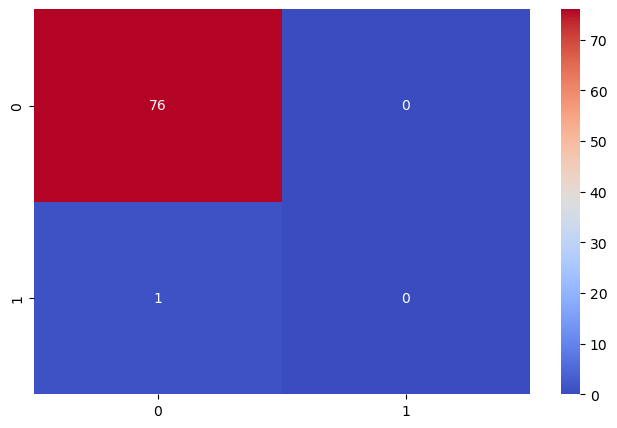

In [150]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax, cmap ='coolwarm')

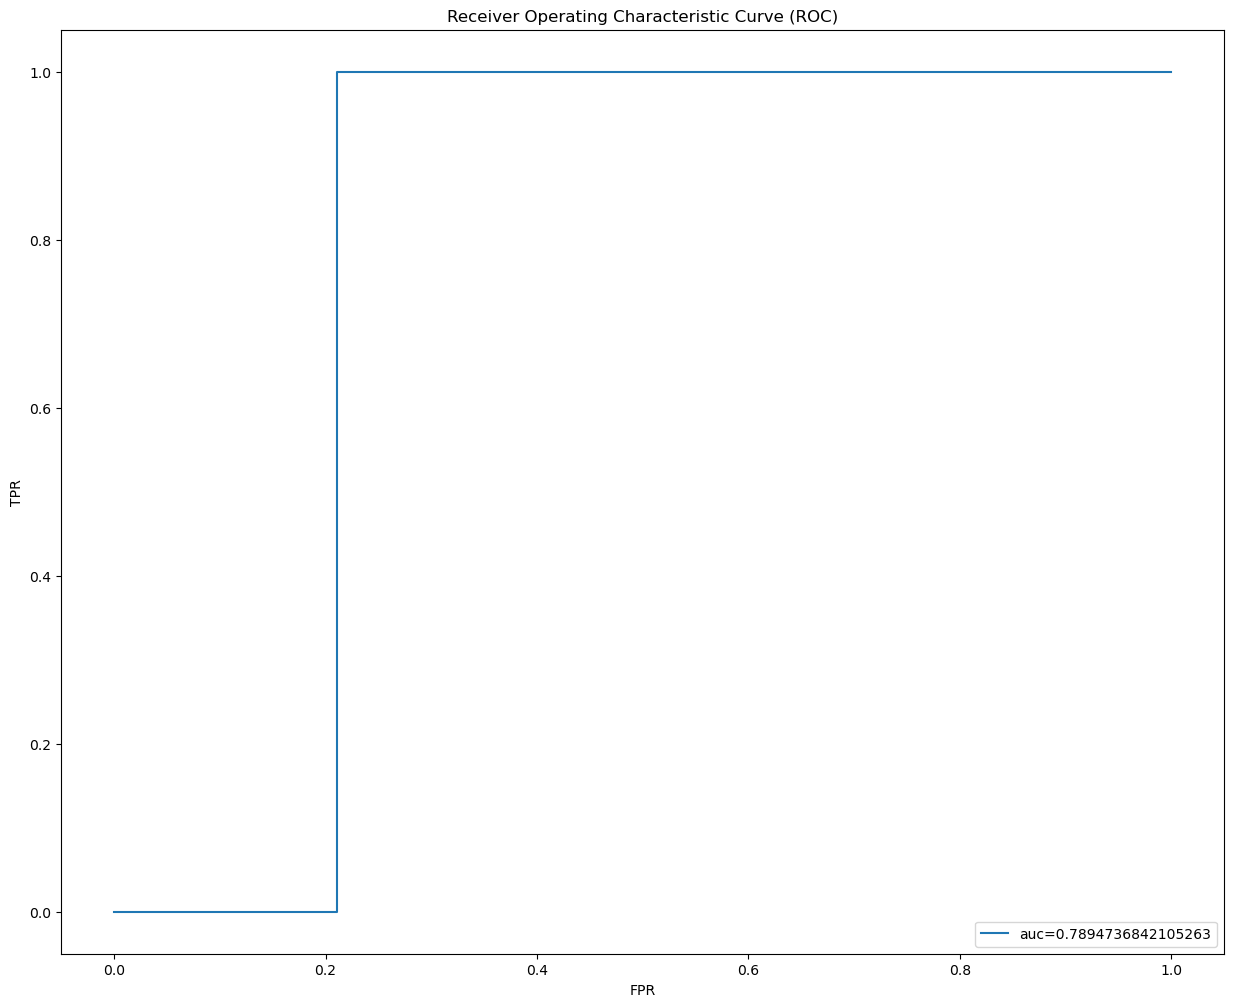

In [151]:
q_pred_proba = lr.predict_proba(p_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(q_test, q_pred_proba)
auc = metrics.roc_auc_score(q_test, q_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc=" + str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* Have used Logistic Regression modelling as it is a Classification problem
* The area under the ROC curve(AUC) is seen to be **0.78** which is considered to be good for prediction overall.

In [152]:
# travel_type_1
# from_date_hour_UL
# from_date_hour_LL
# time_diff_ul

# These are the dataframes on which was/will be done which are a subset of travel_type_1

## ML Model for 'travel_type_1'

In [153]:
travel_type_1.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
6                 0                    0                1                  1   
17                1                    0                1                  5   
24                0                    0                1                  5   
158               1                    0                1                  4   
216               1                    0                1                  6   

     from_date_hour  from_date_minute  booking_created_month  \
6                 9                45                      1   
17                8                 0                      1   
24                8                30                      1   
158               9                30                      1   
216               7                30                      1   

     booking_created_weekday  booking_created_hour  booking_created_minute  \
6                          1                     9                      21   
17                         1                    12                      17   
24                         1                    14                      40   
158                        3                    12                      19   
216                        4                     9                      32   

     time_diff  from_date_session  booking_created_session  from_date_seasons  \
6         24.0                  4                        4                  0   
17     15583.0                  4                        4                  0   
24      5390.0                  4                        4                  0   
158     1271.0                  4                        4                  0   
216     2758.0                  4                        4                  0   

     booking_created_seasons  Car_Cancellation  
6                          0                 0  
17                         0                 0  
24                         0                 0  
158                        0                 0  
216                        0                 0

In [154]:
x1 = travel_type_1.iloc[:,0:15]
x1

online_booking  mobile_site_booking  from_date_month  \
6                   0                    0                1   
17                  1                    0                1   
24                  0                    0                1   
158                 1                    0                1   
216                 1                    0                1   
...               ...                  ...              ...   
43342               1                    0               11   
43385               1                    0               11   
43386               1                    0               11   
43393               0                    0               11   
43407               0                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
6                      1               9                45   
17                     5               8                 0   
24                     5               8                30   
158                    4               9                30   
216                    6               7                30   
...                  ...             ...               ...   
43342                  5              22                 0   
43385                  4              14                 0   
43386                  6               7                30   
43393                  6              10                30   
43407                  1              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
6                          1                        1                     9   
17                         1                        1                    12   
24                         1                        1                    14   
158                        1                        3                    12   
216                        1                        4                     9   
...                      ...                      ...                   ...   
43342                     11                        5                    17   
43385                     11                        5                    23   
43386                     11                        5                    23   
43393                     11                        6                     7   
43407                     11                        6                    11   

       booking_created_minute  time_diff  from_date_session  \
6                          21       24.0                  4   
17                         17    15583.0                  4   
24                         40     5390.0                  4   
158                        19     1271.0                  4   
216                        32     2758.0                  4   
...                       ...        ...                ...   
43342                      54      246.0                  4   
43385                      24     8076.0                  4   
43386                      44      466.0                  4   
43393                      14      196.0                  4   
43407                      34    43406.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
6                            4                  0                        0  
17                           4                  0                        0  
24                           4                  0                        0  
158                          4                  0                        0  
216                          4                  0                        0  
...                        ...                ...                      ...  
43342                        4                  0                        0  
43385                        4                  0                        0  
43386                        4                  0                        0  
43393                        

In [155]:
y1 = travel_type_1.iloc[:,15]
y1

6        0
17       0
24       0
158      0
216      0
        ..
43342    0
43385    0
43386    0
43393    0
43407    0
Name: Car_Cancellation, Length: 1589, dtype: int64

In [156]:
x1.mobile_site_booking.value_counts()

0    1589
Name: mobile_site_booking, dtype: int64

In [157]:
x1.from_date_session.value_counts()

4    1589
Name: from_date_session, dtype: int64

In [158]:
x1.booking_created_session.value_counts()

4    1589
Name: booking_created_session, dtype: int64

In [159]:
x1.from_date_seasons.value_counts()

0    1589
Name: from_date_seasons, dtype: int64

In [160]:
x1.booking_created_seasons.value_counts()

0    1589
Name: booking_created_seasons, dtype: int64

In [161]:
x1 = x1.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis=1)
x1

online_booking  from_date_month  from_date_weekday  from_date_hour  \
6                   0                1                  1               9   
17                  1                1                  5               8   
24                  0                1                  5               8   
158                 1                1                  4               9   
216                 1                1                  6               7   
...               ...              ...                ...             ...   
43342               1               11                  5              22   
43385               1               11                  4              14   
43386               1               11                  6               7   
43393               0               11                  6              10   
43407               0               12                  1              15   

       from_date_minute  booking_created_month  booking_created_weekday  \
6                    45                      1                        1   
17                    0                      1                        1   
24                   30                      1                        1   
158                  30                      1                        3   
216                  30                      1                        4   
...                 ...                    ...                      ...   
43342                 0                     11                        5   
43385                 0                     11                        5   
43386                30                     11                        5   
43393                30                     11                        6   
43407                 0                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  
6                         9                      21       24.0  
17                       12                      17    15583.0  
24                       14                      40     5390.0  
158                      12                      19     1271.0  
216                       9                      32     2758.0  
...                     ...                     ...        ...  
43342                    17                      54      246.0  
43385                    23                      24     8076.0  
43386                    23                      44      466.0  
43393                     7                      14      196.0  
43407                    11                      34    43406.0  

[1589 rows x 10 columns]

In [162]:
x1 = x1.drop(['booking_created_month','booking_created_weekday','from_date_weekday'],axis=1)
x1

online_booking  from_date_month  from_date_hour  from_date_minute  \
6                   0                1               9                45   
17                  1                1               8                 0   
24                  0                1               8                30   
158                 1                1               9                30   
216                 1                1               7                30   
...               ...              ...             ...               ...   
43342               1               11              22                 0   
43385               1               11              14                 0   
43386               1               11               7                30   
43393               0               11              10                30   
43407               0               12              15                 0   

       booking_created_hour  booking_created_minute  time_diff  
6                         9                      21       24.0  
17                       12                      17    15583.0  
24                       14                      40     5390.0  
158                      12                      19     1271.0  
216                       9                      32     2758.0  
...                     ...                     ...        ...  
43342                    17                      54      246.0  
43385                    23                      24     8076.0  
43386                    23                      44      466.0  
43393                     7                      14      196.0  
43407                    11                      34    43406.0  

[1589 rows x 7 columns]

* Upon plotting a heatmap and by checking the number of unique values possessed by the Features, a few columns have been dropped mobile_site_booking, from_date_session, booking_created_session, from_date_seasons, booking_created_seasons , booking_created_month, booking_created_weekday, from_date_weekday are the features that were dropped.

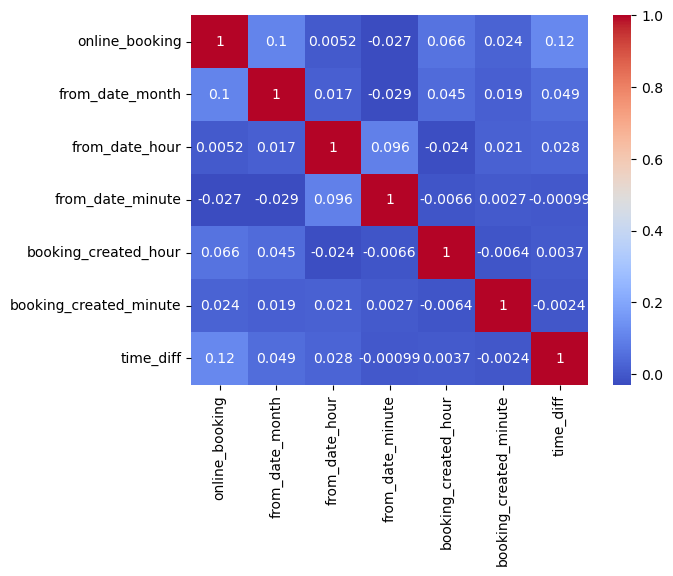

In [163]:
sns.heatmap(x1.corr(),annot = True,cmap = 'coolwarm',fmt = '.2g')
plt.show()

# booking_created_month
# booking_created_weekday
# from_date_weekday

#### Splitting the data into train and test data

In [164]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size = 0.75,random_state = 25)

### Logistic Regression

In [165]:
ss = StandardScaler()
x1_train = ss.fit_transform(x1_train)
x1_test = ss.transform(x1_test)

In [166]:
classifier = LogisticRegression()
lr = classifier.fit(x1_train,y1_train)
y1_pred = classifier.predict(x1_test)
y1_pred_train = classifier.predict(x1_train)

#### Classification Report

In [167]:
print(classification_report(y1_train,y1_pred_train))
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1176
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1191
   macro avg       0.49      0.50      0.50      1191
weighted avg       0.97      0.99      0.98      1191

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### Confusion Matrix

In [168]:
conf_matrix = metrics.confusion_matrix(y1_test,y1_pred)
conf_matrix

array([[392,   0],
       [  6,   0]], dtype=int64)

<Axes: >

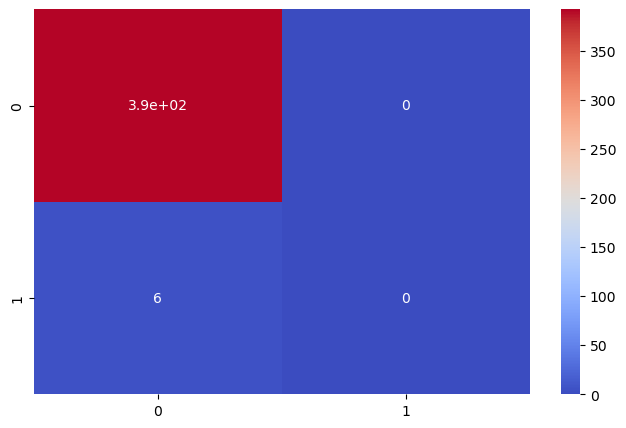

In [169]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax, cmap = 'coolwarm')

#### ROC AUC Curve

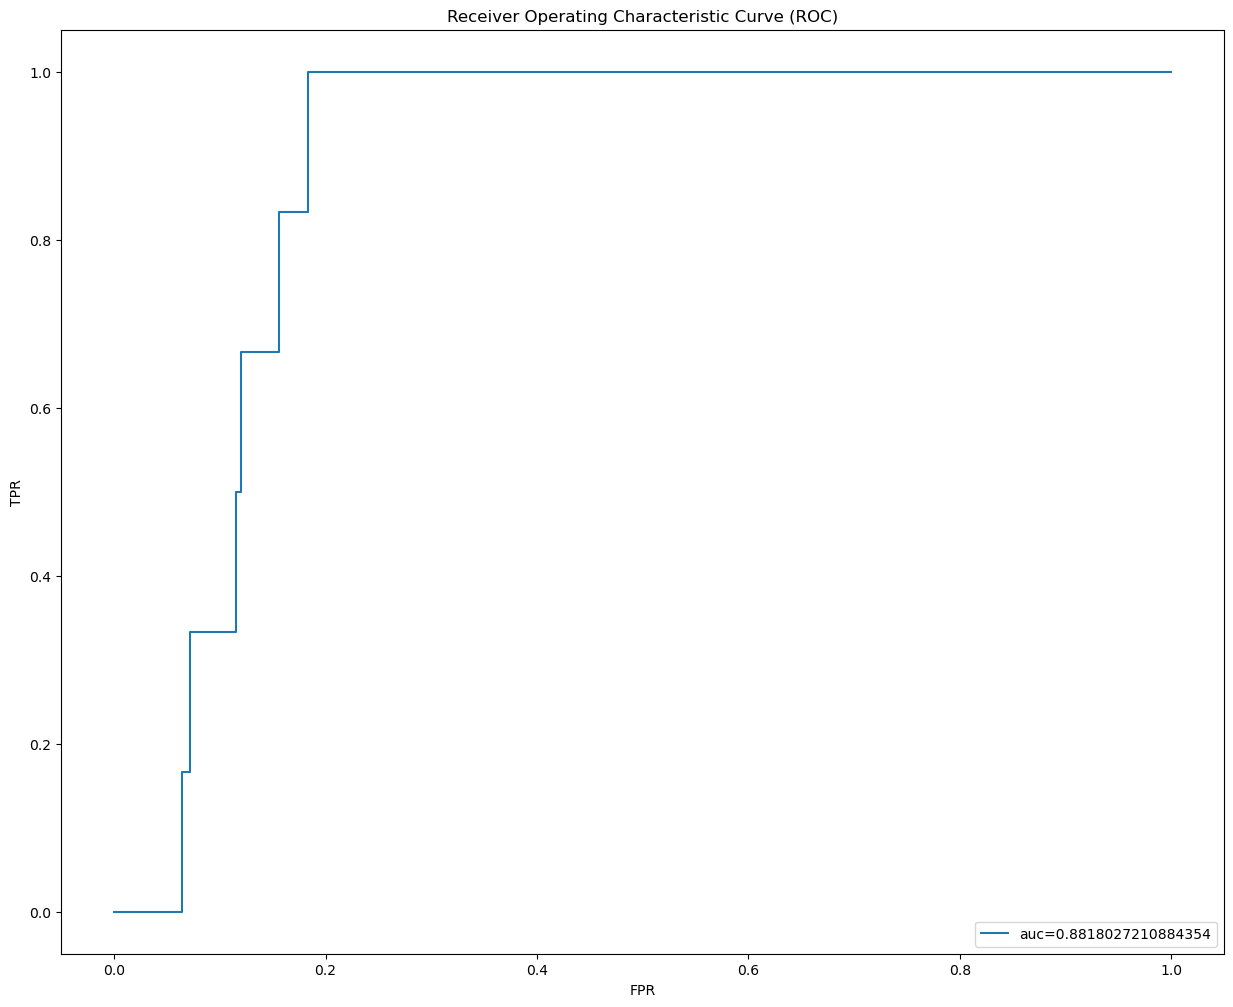

In [170]:
y1_pred_proba = lr.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y1_pred_proba)
auc = metrics.roc_auc_score(y1_test, y1_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.88** which is considered to be really good for prediction overall.

### KNN

In [171]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x1_train,y1_train)
y1_pred = knn.predict(x1_test)

#### Confusion Matrix

In [172]:
print(confusion_matrix(y1_test,y1_pred))

[[392   0]
 [  6   0]]


#### Classification Report

In [173]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### ROC AUC curve

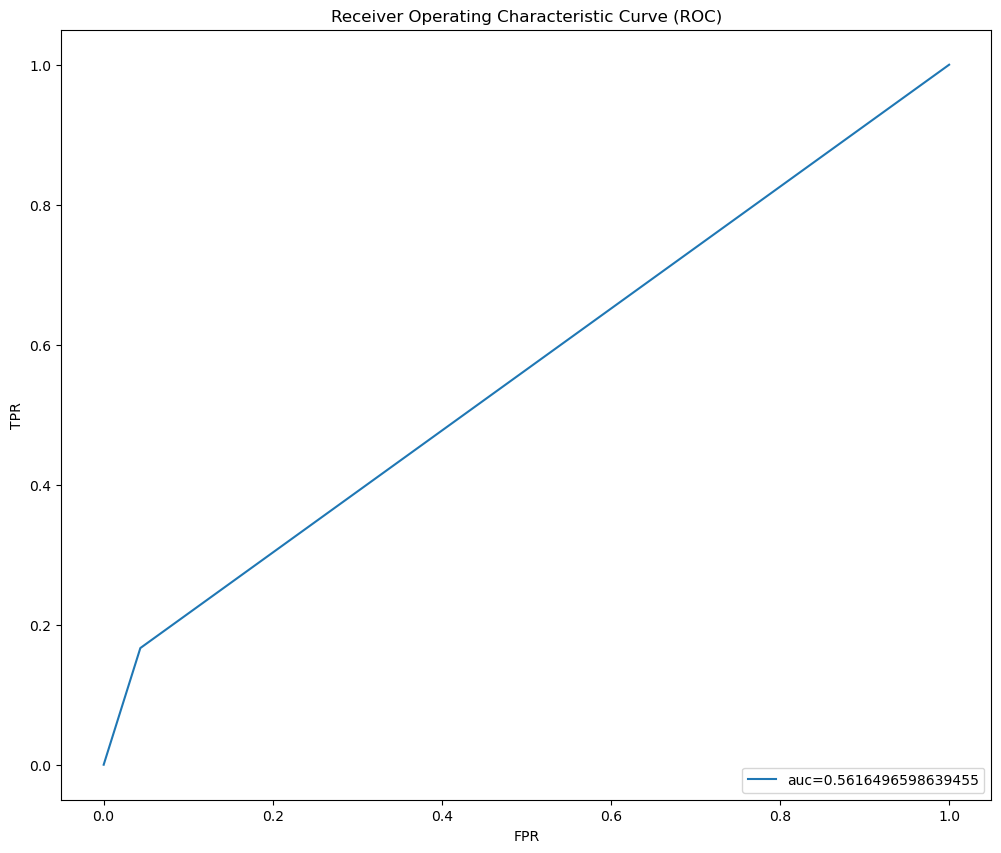

In [174]:
y1_pred_proba = knn.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y1_pred_proba)
auc = metrics.roc_auc_score(y1_test, y1_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Chossing a K value

In [175]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x1,y1,cv = 10)
    accuracy_rate.append(score.mean())

In [176]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x1,y1,cv = 10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

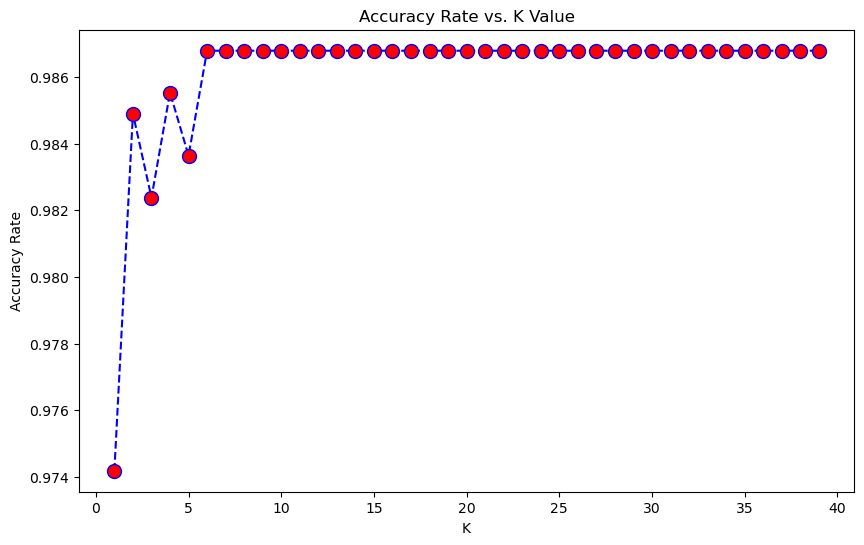

In [177]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

* Here we can see that that after around K > 5 the error rate just tends to very small. Let's retrain the model with that and check the classification report.
* Also, in case of Accuracy, after around K > 5, the accuracy is also almost contant.

#### Classification report with K = 1

In [178]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x1_train,y1_train)
pred = knn.predict(x1_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y1_test,pred))
print('\n')
print(classification_report(y1_test,pred))

WITH K=1


[[385   7]
 [  6   0]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       392
           1       0.00      0.00      0.00         6

    accuracy                           0.97       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.97      0.97      0.97       398



#### Classification report with K = 5

In [179]:
# NOW WITH K = 5. 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x1_train,y1_train)
pred = knn.predict(x1_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y1_test,pred))
print('\n')
print(classification_report(y1_test,pred))

WITH K=5


[[392   0]
 [  6   0]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### Takeaways

* Here we used the KNeighbour Classifier for predective modelling as it can handle large datasets
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Naive Bayes

In [486]:
model = GaussianNB()
model.fit(x1_train, y1_train)

GaussianNB()

In [181]:
y1_pred = model.predict(x1_test)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Confusion Matrix

In [182]:
conf_matrix = confusion_matrix(y1_test,y1_pred)
conf_matrix

array([[391,   1],
       [  6,   0]], dtype=int64)

#### Accuracy, Precision, Recall

In [183]:
Accuracy = metrics.accuracy_score(y1_test,y1_pred)
Precision = metrics.precision_score(y1_test,y1_pred)
Recall = metrics.recall_score(y1_test,y1_pred)
print('Accuracy = {}, Precision = {}, Recall = {}'.format(Accuracy,Precision,Recall))

Accuracy = 0.9824120603015075, Precision = 0.0, Recall = 0.0


#### ROC AUC curve

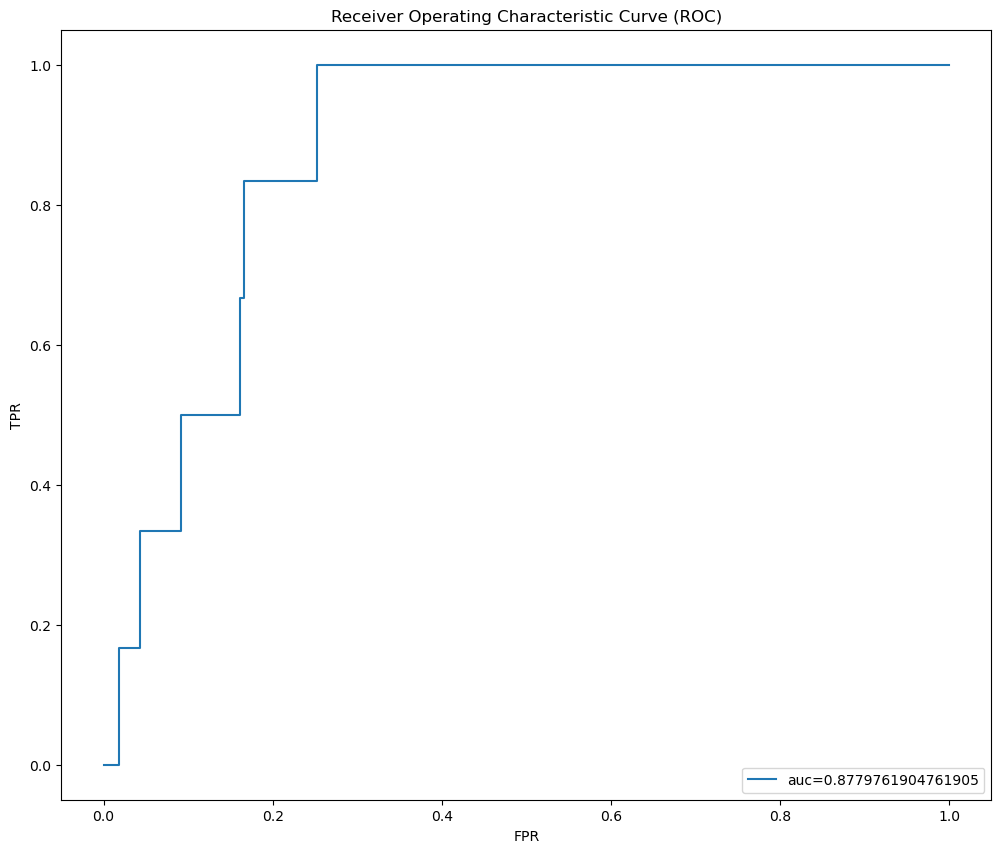

In [184]:
y1_pred_proba = model.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y1_pred_proba)
auc = metrics.roc_auc_score(y1_test, y1_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.87** which is considered to be really good for prediction overall.

### Decision Tree
#### Decision Tree with Gini
#### Decision Tree Depth - 2

In [185]:
model1 = DecisionTreeClassifier(random_state = 1,max_depth = 2)
model1.fit(x1_train,y1_train)
model1_score_train = model1.score(x1_train,y1_train)
model1_score_test = model1.score(x1_test,y1_test)
print('Training Score',model1_score_train)
print('Testing Score',model1_score_test)

Training Score 0.9874055415617129
Testing Score 0.9849246231155779


#### Performance Metrics

In [186]:
from sklearn.metrics import auc
y1_pred = model1.predict_proba(x1_test)[:,1]
fpr,tpr,_= roc_curve(y1_test,y1_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

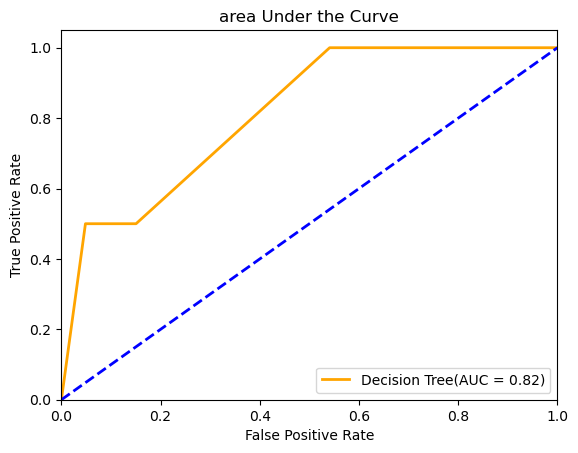

In [187]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle ='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [188]:
y1_pred = model1.predict(x1_test)

#### Confusion Matrix

In [189]:
print(confusion_matrix(y1_test,y1_pred))

[[392   0]
 [  6   0]]


#### Classification Report

In [190]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### Decision Tree Depth - 20

In [191]:
model2 = DecisionTreeClassifier(random_state = 1,max_depth = 20)
model2.fit(x1_train,y1_train)
model2_score_train = model2.score(x1_train,y1_train)
model2_score_test = model2.score(x1_test,y1_test)
print('Training Score',model2_score_train)
print('Testing Score',model2_score_test)

Training Score 1.0
Testing Score 0.9547738693467337


#### Performance Metrics

In [192]:
y1_pred = model2.predict_proba(x1_test)[:,1]
fpr,tpr,_= roc_curve(y1_test,y1_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

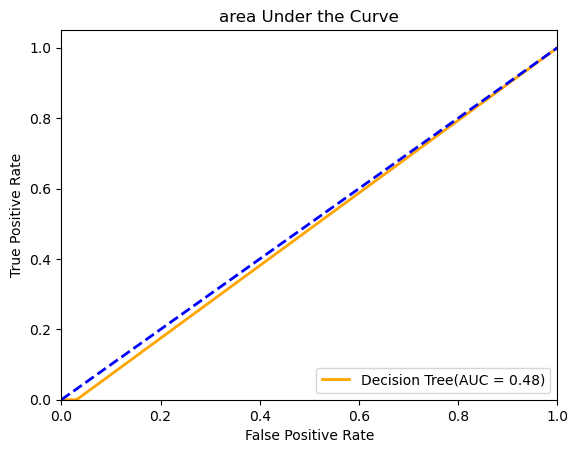

In [193]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label='Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()

In [194]:
y1_pred = model2.predict(x1_test)

#### Confusion Matrix

In [195]:
print(confusion_matrix(y1_test,y1_pred))

[[380  12]
 [  6   0]]


#### Classification Report

In [196]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       392
           1       0.00      0.00      0.00         6

    accuracy                           0.95       398
   macro avg       0.49      0.48      0.49       398
weighted avg       0.97      0.95      0.96       398



#### Decision Tree with Entropy

#### Decision Tree with depth - 20

In [197]:
model3 = DecisionTreeClassifier(random_state = 5,max_depth = 20,criterion = 'entropy')
model3.fit(x1_train,y1_train)
model3_score_train = model3.score(x1_train,y1_train)
model3_score_test = model3.score(x1_test,y1_test)
print('Training Score',model3_score_train)
print('Testing Score',model3_score_test)

Training Score 1.0
Testing Score 0.9623115577889447


#### Performance Metrics

In [198]:
y1_pred = model3.predict_proba(x1_test)[:,1]
fpr,tpr,_= roc_curve(y1_test,y1_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

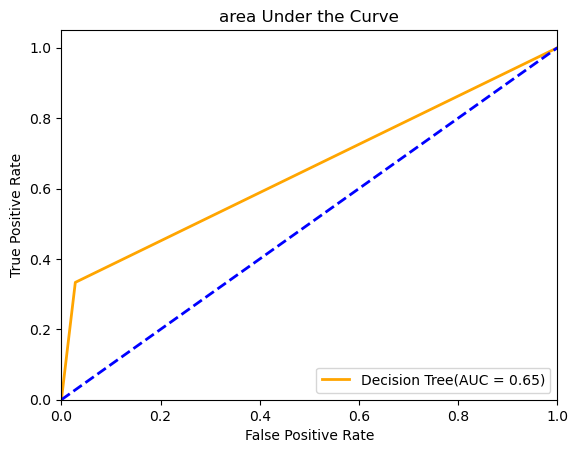

In [199]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [200]:
y1_pred = model3.predict(x1_test)

#### Confusion Matrix

In [201]:
print(confusion_matrix(y1_test,y1_pred))

[[381  11]
 [  4   2]]


#### Classification Report

In [202]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       392
           1       0.15      0.33      0.21         6

    accuracy                           0.96       398
   macro avg       0.57      0.65      0.60       398
weighted avg       0.98      0.96      0.97       398



#### Graphical representation of tree

In [203]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [204]:
!pip install pydotplus

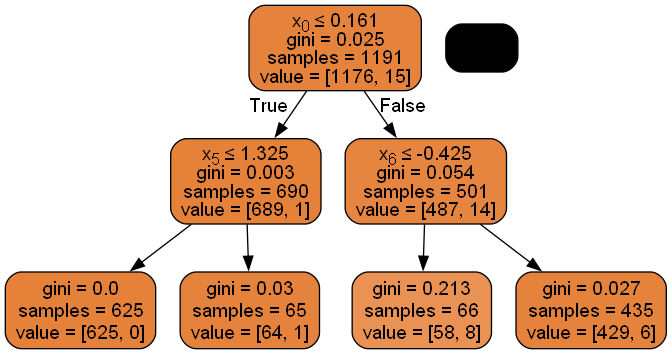

<Figure size 1000x800 with 0 Axes>

In [205]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
plt.figure(figsize = (10,8))
dot_data = StringIO()
export_graphviz(model1,out_file = dot_data,
               filled = True,rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Takeaways
* Here we used the Decision Tree for predective modelling
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Random Forest

In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

In [207]:
rf = RandomForestClassifier(random_state = 40)

#### Hyperparameter Optimization Using GridSearchCV

In [208]:
np.random.seed(40)

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf,cv = 10,param_grid = param_dist,n_jobs = 3)

cv_rf.fit(x1_train,y1_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}


In [488]:
rf.set_params(criterion = 'gini',max_features = 'sqrt',max_depth = 2)

RandomForestClassifier(max_depth=2, random_state=40)

#### Training the Random Forest

In [487]:
rf.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=2, random_state=40)

#### Prediction

In [211]:
y1_pred = rf.predict(x1_test)

#### Confusion Matrix

In [212]:
print(confusion_matrix(y1_test,y1_pred))

[[392   0]
 [  6   0]]


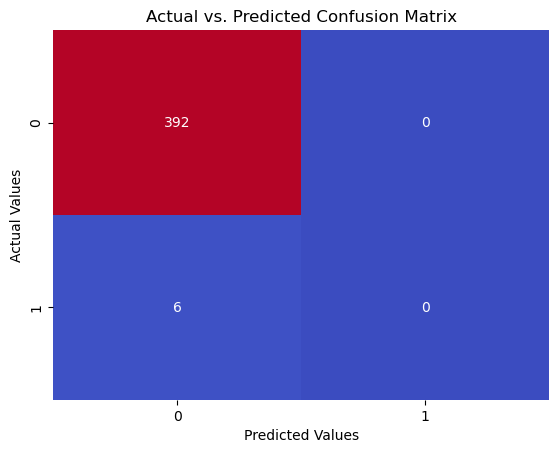

In [213]:
conf_mat = confusion_matrix(y1_test,y1_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, cmap = 'coolwarm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Classification Report

In [214]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### Accuracy

In [215]:
accuracy_rf = rf.score(x1_test,y1_test)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.98492


#### Error Rate

In [216]:
test_error_rate_rf = 1-accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)

error rate of our model is: 0.01508


#### Area Under the Curve

In [217]:
y1_prob = rf.predict_proba(x1_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y1_test, y1_prob, pos_label = 1)

In [218]:
auc_rf = auc(fpr2,tpr2)

In [219]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

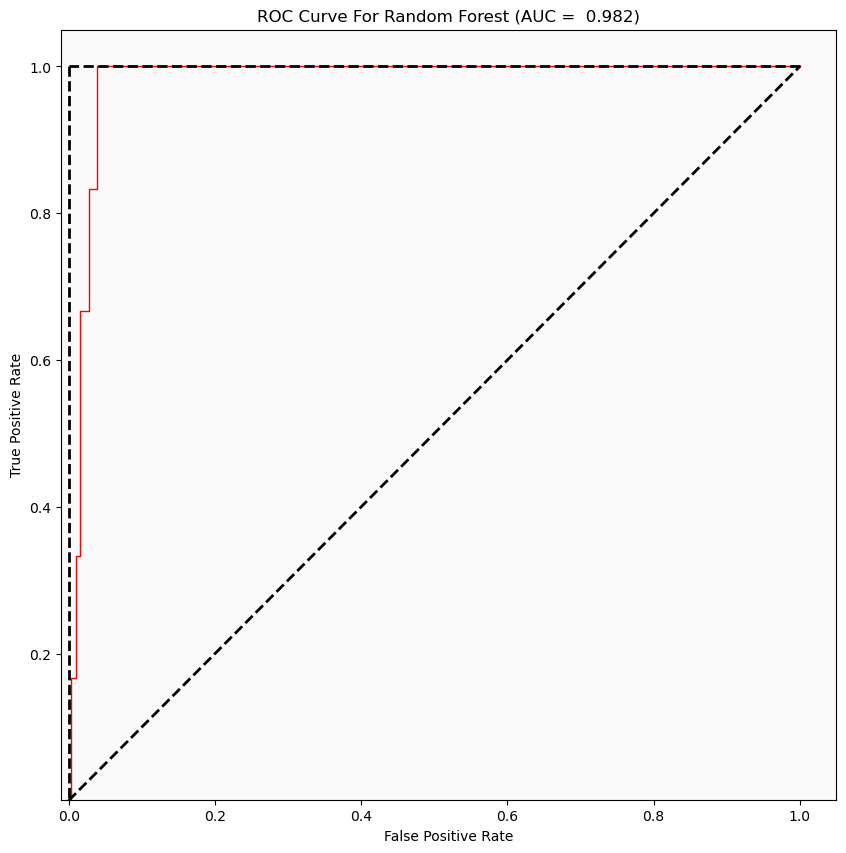

In [220]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.98** which is considered to be really good for prediction overall.

### SVM

In [221]:
svc = SVC()
svc.fit(x1_train,y1_train)
y1_pred = svc.predict(x1_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y1_test,y1_pred))

Accuracy Score:
0.9849246231155779


#### Linear Kernal

In [222]:
svc = SVC(kernel='linear')
svc.fit(x1_train,y1_train)
y1_pred = svc.predict(x1_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y1_test,y1_pred))

Accuracy Score:
0.9849246231155779


#### Polynomial Kernal

In [223]:
svc = SVC(kernel='poly')
svc.fit(x1_train,y1_train)
y1_pred = svc.predict(x1_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y1_test,y1_pred))

Accuracy Score:
0.9849246231155779


#### Confusion Matrix

In [224]:
print(confusion_matrix(y1_test,y1_pred))

[[392   0]
 [  6   0]]


Text(0.5, 23.52222222222222, 'Predicted label')

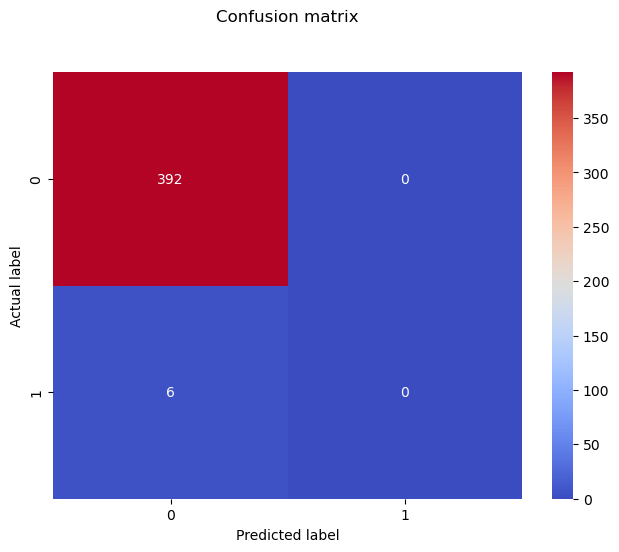

In [225]:
conf_mat = confusion_matrix(y1_test,y1_pred)
sns.heatmap(conf_mat, annot = True, cmap = "coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification Report

In [226]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         6

    accuracy                           0.98       398
   macro avg       0.49      0.50      0.50       398
weighted avg       0.97      0.98      0.98       398



#### ROC AUC curve

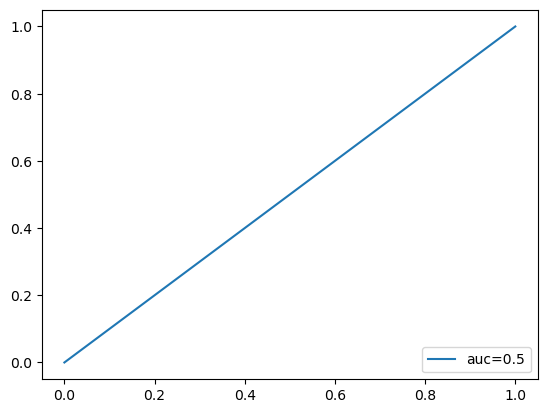

In [227]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y1_test,y1_pred)
auc = roc_auc_score(y1_test,y1_pred)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.5** whic means the model has no discrimination ability, i.e., it is as good as random guessing.

## EDA on travel_type_2

In [228]:
df[df.travel_type_id == 2]

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43425         NaN               2         585.0      1226.0          15.0   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
0             NaN               0                    0  12.924150  77.672290   
1             NaN               0                    0  12.966910  77.749350   
2             NaN               0                    0  12.937222  77.626915   
3             NaN               0                    0  12.989990  77.553320   
4             NaN               0                    0  12.845653  77.677925   
...           ...             ...                  ...        ...        ...   
43425         NaN               0                    1  12.976770  77.572700   
43426         NaN               1                    0  13.030640  77.649100   
43427         NaN               1                    0  13.199560  77.706880   
43429         NaN               0                    0  12.968970  77.594560   
43430         NaN               0                    1  12.976720  77.649270   

       ...  booking_created_month  booking_created_weekday  \
0      ...                      1                        1   
1      ...                      1                        1   
2      ...                      1                        1   
3      ...                      1                        1   
4      ...                      1                        1   
...    ...                    ...                      ...   
43425  ...                     11                        6   
43426  ...                     11                        6   
43427  ...                     11                        6   
43429  ...                     11                        6   
43430  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
0                         1                      39       21.0   
1                         2                      25      395.0   
2                         3                       8       22.0   
3                         4                      39       66.0   
4                         7                      53       67.0   
...                     ...                     ...        ...   
43425                    14                      24      576.0   
43426                    14                      25      215.0   
43427                    14                      30     2070.0   
43429                    14                      43       77.0   
43430                    14                      50      850.0   

       from_date_session  booking_created_session  from_date_seasons  \
0                      4                        4                  0   
1                      4                        4                  0   
2                      4                        4                  0   
3                      4                        4                  0   
4                      4                        4                  0   
...                  ...                      ...                ...   
43425                  4                        4                  0   
43426  

In [229]:
travel_type_2 = df[df.travel_type_id == 2]

In [230]:
travel_type_2

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
0             NaN               2          83.0       448.0           NaN   
1             NaN               2        1010.0       540.0           NaN   
2             NaN               2        1301.0      1034.0           NaN   
3             NaN               2         768.0       398.0           NaN   
4             NaN               2        1365.0       849.0           NaN   
...           ...             ...           ...         ...           ...   
43425         NaN               2         585.0      1226.0          15.0   
43426         NaN               2        1147.0       452.0          15.0   
43427         NaN               2         393.0       466.0          15.0   
43429         NaN               2        1263.0       542.0          15.0   
43430         NaN               2         689.0       393.0          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
0             NaN               0                    0  12.924150  77.672290   
1             NaN               0                    0  12.966910  77.749350   
2             NaN               0                    0  12.937222  77.626915   
3             NaN               0                    0  12.989990  77.553320   
4             NaN               0                    0  12.845653  77.677925   
...           ...             ...                  ...        ...        ...   
43425         NaN               0                    1  12.976770  77.572700   
43426         NaN               1                    0  13.030640  77.649100   
43427         NaN               1                    0  13.199560  77.706880   
43429         NaN               0                    0  12.968970  77.594560   
43430         NaN               0                    1  12.976720  77.649270   

       ...  booking_created_month  booking_created_weekday  \
0      ...                      1                        1   
1      ...                      1                        1   
2      ...                      1                        1   
3      ...                      1                        1   
4      ...                      1                        1   
...    ...                    ...                      ...   
43425  ...                     11                        6   
43426  ...                     11                        6   
43427  ...                     11                        6   
43429  ...                     11                        6   
43430  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
0                         1                      39       21.0   
1                         2                      25      395.0   
2                         3                       8       22.0   
3                         4                      39       66.0   
4                         7                      53       67.0   
...                     ...                     ...        ...   
43425                    14                      24      576.0   
43426                    14                      25      215.0   
43427                    14                      30     2070.0   
43429                    14                      43       77.0   
43430                    14                      50      850.0   

       from_date_session  booking_created_session  from_date_seasons  \
0                      4                        4                  0   
1                      4                        4                  0   
2                      4                        4                  0   
3                      4                        4                  0   
4                      4                        4                  0   
...                  ...                      ...                ...   
43425                  4                        4                  0   
43426  

In [231]:
travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   package_id               0 non-null      float64
 1   travel_type_id           34292 non-null  int64  
 2   from_area_id             34292 non-null  float64
 3   to_area_id               34292 non-null  float64
 4   from_city_id             14504 non-null  float64
 5   to_city_id               0 non-null      float64
 6   online_booking           34292 non-null  int64  
 7   mobile_site_booking      34292 non-null  int64  
 8   from_lat                 34292 non-null  float64
 9   from_long                34292 non-null  float64
 10  to_lat                   34292 non-null  float64
 11  to_long                  34292 non-null  float64
 12  from_date_month          34292 non-null  int64  
 13  from_date_weekday        34292 non-null  int64  
 14  from_date_hour        

In [232]:
travel_type_2 = travel_type_2.drop(['package_id','travel_type_id'],axis = 1)

In [233]:
travel_type_2

from_area_id  to_area_id  from_city_id  to_city_id  online_booking  \
0              83.0       448.0           NaN         NaN               0   
1            1010.0       540.0           NaN         NaN               0   
2            1301.0      1034.0           NaN         NaN               0   
3             768.0       398.0           NaN         NaN               0   
4            1365.0       849.0           NaN         NaN               0   
...             ...         ...           ...         ...             ...   
43425         585.0      1226.0          15.0         NaN               0   
43426        1147.0       452.0          15.0         NaN               1   
43427         393.0       466.0          15.0         NaN               1   
43429        1263.0       542.0          15.0         NaN               0   
43430         689.0       393.0          15.0         NaN               0   

       mobile_site_booking   from_lat  from_long     to_lat    to_long  ...  \
0                        0  12.924150  77.672290  12.927320  77.635750  ...   
1                        0  12.966910  77.749350  12.927680  77.626640  ...   
2                        0  12.937222  77.626915  13.047926  77.597766  ...   
3                        0  12.989990  77.553320  12.971430  77.639140  ...   
4                        0  12.845653  77.677925  12.954340  77.600720  ...   
...                    ...        ...        ...        ...        ...  ...   
43425                    1  12.976770  77.572700  13.015080  77.677960  ...   
43426                    0  13.030640  77.649100  12.952780  77.590880  ...   
43427                    0  13.199560  77.706880  13.017436  77.644580  ...   
43429                    0  12.968970  77.594560  12.938230  77.622890  ...   
43430                    1  12.976720  77.649270  13.199560  77.706880  ...   

       booking_created_month  booking_created_weekday  booking_created_hour  \
0                          1                        1                     1   
1                          1                        1                     2   
2                          1                        1                     3   
3                          1                        1                     4   
4                          1                        1                     7   
...                      ...                      ...                   ...   
43425                     11                        6                    14   
43426                     11                        6                    14   
43427                     11                        6                    14   
43429                     11                        6                    14   
43430                     11                        6                    14   

       booking_created_minute  time_diff  from_date_session  \
0                          39       21.0                  4   
1                          25      395.0                  4   
2                           8       22.0                  4   
3                          39       66.0                  4   
4                          53       67.0                  4   
...                       ...        ...                ...   
43425                      24      576.0                  4   
43426                      25      215.0                  4   
43427                      30     2070.0                  4   
43429                      43       77.0                  4   
43430                      50      850.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
0                            4                  0                        0   
1                            4                  0                        0   
2                            4                  0                        0   
3                            4                  0                        0   
4                            4       

In [234]:
travel_type_2.isna().sum()

from_area_id                   0
to_area_id                     0
from_city_id               19788
to_city_id                 34292
online_booking                 0
mobile_site_booking            0
from_lat                       0
from_long                      0
to_lat                         0
to_long                        0
from_date_month                0
from_date_weekday              0
from_date_hour                 0
from_date_minute               0
booking_created_month          0
booking_created_weekday        0
booking_created_hour           0
booking_created_minute         0
time_diff                      0
from_date_session              0
booking_created_session        0
from_date_seasons              0
booking_created_seasons        0
Car_Cancellation               0
dtype: int64

### Calculating the cab_cancellation percentage

In [235]:
travel_type_2['cancellation_percentage'] = round(travel_type_2.groupby('from_area_id')['Car_Cancellation'].sum()/travel_type_2.groupby('from_area_id')['Car_Cancellation'].count(),2)

In [236]:
cond = [(travel_type_2['cancellation_percentage'].astype('float').between(0,0.33)),
        (travel_type_2['cancellation_percentage'].astype('float').between(0.34,0.66)),
        (travel_type_2['cancellation_percentage'].astype('float').between(0.67,1.0))]
values = ['0','1','2']
travel_type_2['cancellation_percentage'] = np.select(cond,values)

# low_cancellation --> 0

# medium_cancellation --> 1

# high_cancellation --> 2

In [237]:
travel_type_2

from_area_id  to_area_id  from_city_id  to_city_id  online_booking  \
0              83.0       448.0           NaN         NaN               0   
1            1010.0       540.0           NaN         NaN               0   
2            1301.0      1034.0           NaN         NaN               0   
3             768.0       398.0           NaN         NaN               0   
4            1365.0       849.0           NaN         NaN               0   
...             ...         ...           ...         ...             ...   
43425         585.0      1226.0          15.0         NaN               0   
43426        1147.0       452.0          15.0         NaN               1   
43427         393.0       466.0          15.0         NaN               1   
43429        1263.0       542.0          15.0         NaN               0   
43430         689.0       393.0          15.0         NaN               0   

       mobile_site_booking   from_lat  from_long     to_lat    to_long  ...  \
0                        0  12.924150  77.672290  12.927320  77.635750  ...   
1                        0  12.966910  77.749350  12.927680  77.626640  ...   
2                        0  12.937222  77.626915  13.047926  77.597766  ...   
3                        0  12.989990  77.553320  12.971430  77.639140  ...   
4                        0  12.845653  77.677925  12.954340  77.600720  ...   
...                    ...        ...        ...        ...        ...  ...   
43425                    1  12.976770  77.572700  13.015080  77.677960  ...   
43426                    0  13.030640  77.649100  12.952780  77.590880  ...   
43427                    0  13.199560  77.706880  13.017436  77.644580  ...   
43429                    0  12.968970  77.594560  12.938230  77.622890  ...   
43430                    1  12.976720  77.649270  13.199560  77.706880  ...   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
0                            1                     1                      39   
1                            1                     2                      25   
2                            1                     3                       8   
3                            1                     4                      39   
4                            1                     7                      53   
...                        ...                   ...                     ...   
43425                        6                    14                      24   
43426                        6                    14                      25   
43427                        6                    14                      30   
43429                        6                    14                      43   
43430                        6                    14                      50   

       time_diff  from_date_session  booking_created_session  \
0           21.0                  4                        4   
1          395.0                  4                        4   
2           22.0                  4                        4   
3           66.0                  4                        4   
4           67.0                  4                        4   
...          ...                ...                      ...   
43425      576.0                  4                        4   
43426      215.0                  4                        4   
43427     2070.0                  4                        4   
43429       77.0                  4                        4   
43430      850.0                  4                        4   

       from_date_seasons  booking_created_seasons  Car_Cancellation  \
0                      0                        0                 0   
1                      0                        0                 0   
2                      0                        0                 0   
3                      0                        0                 0   
4                      0                        

In [238]:
travel_type_2 = travel_type_2.drop(['from_area_id','to_area_id','from_city_id','to_city_id'],axis = 1)

In [239]:
travel_type_2

online_booking  mobile_site_booking   from_lat  from_long     to_lat  \
0                   0                    0  12.924150  77.672290  12.927320   
1                   0                    0  12.966910  77.749350  12.927680   
2                   0                    0  12.937222  77.626915  13.047926   
3                   0                    0  12.989990  77.553320  12.971430   
4                   0                    0  12.845653  77.677925  12.954340   
...               ...                  ...        ...        ...        ...   
43425               0                    1  12.976770  77.572700  13.015080   
43426               1                    0  13.030640  77.649100  12.952780   
43427               1                    0  13.199560  77.706880  13.017436   
43429               0                    0  12.968970  77.594560  12.938230   
43430               0                    1  12.976720  77.649270  13.199560   

         to_long  from_date_month  from_date_weekday  from_date_hour  \
0      77.635750                1                  1               2   
1      77.626640                1                  1               9   
2      77.597766                1                  1               3   
3      77.639140                1                  1               5   
4      77.600720                1                  1               9   
...          ...              ...                ...             ...   
43425  77.677960               11                  0               0   
43426  77.590880               11                  6              18   
43427  77.644580               11                  1               1   
43429  77.622890               11                  6              16   
43430  77.706880               11                  0               5   

       from_date_minute  ...  booking_created_weekday  booking_created_hour  \
0                     0  ...                        1                     1   
1                     0  ...                        1                     2   
2                    30  ...                        1                     3   
3                    45  ...                        1                     4   
4                     0  ...                        1                     7   
...                 ...  ...                      ...                   ...   
43425                 0  ...                        6                    14   
43426                 0  ...                        6                    14   
43427                 0  ...                        6                    14   
43429                 0  ...                        6                    14   
43430                 0  ...                        6                    14   

       booking_created_minute  time_diff  from_date_session  \
0                          39       21.0                  4   
1                          25      395.0                  4   
2                           8       22.0                  4   
3                          39       66.0                  4   
4                          53       67.0                  4   
...                       ...        ...                ...   
43425                      24      576.0                  4   
43426                      25      215.0                  4   
43427                      30     2070.0                  4   
43429                      43       77.0                  4   
43430                      50      850.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
0                            4                  0                        0   
1                            4                  0                        0   
2                            4                  0                        0   
3                            4                  0                        0   
4                            4                  0                        0   
...                

### Calculating the distance travelled using coordinates

In [240]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1 = row['from_long']
    lat1 = row['from_lat']
    long2 = row['to_long']
    lat2 = row['to_lat']

    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [241]:
travel_type_2['haversine_distance'] = travel_type_2.apply(haversine, axis = 1)

In [242]:
travel_type_2.head()

online_booking  mobile_site_booking   from_lat  from_long     to_lat  \
0               0                    0  12.924150  77.672290  12.927320   
1               0                    0  12.966910  77.749350  12.927680   
2               0                    0  12.937222  77.626915  13.047926   
3               0                    0  12.989990  77.553320  12.971430   
4               0                    0  12.845653  77.677925  12.954340   

     to_long  from_date_month  from_date_weekday  from_date_hour  \
0  77.635750                1                  1               2   
1  77.626640                1                  1               9   
2  77.597766                1                  1               3   
3  77.639140                1                  1               5   
4  77.600720                1                  1               9   

   from_date_minute  ...  booking_created_hour  booking_created_minute  \
0                 0  ...                     1                      39   
1                 0  ...                     2                      25   
2                30  ...                     3                       8   
3                45  ...                     4                      39   
4                 0  ...                     7                      53   

   time_diff  from_date_session  booking_created_session  from_date_seasons  \
0       21.0                  4                        4                  0   
1      395.0                  4                        4                  0   
2       22.0                  4                        4                  0   
3       66.0                  4                        4                  0   
4       67.0                  4                        4                  0   

   booking_created_seasons  Car_Cancellation  cancellation_percentage  \
0                        0                 0                        0   
1                        0                 0                        0   
2                        0                 0                        0   
3                        0                 0                        0   
4                        0                 0                        0   

   haversine_distance  
0            3.973268  
1           13.986247  
2           12.700435  
3            9.519173  
4           14.690552  

[5 rows x 22 columns]

In [243]:
travel_type_2.cancellation_percentage.value_counts()

0    34272
1       16
2        4
Name: cancellation_percentage, dtype: int64

* From the above observation it is clear that 0 has occured 99% of times in the cancellation_percentage feature.
* Hence imputing other values with 0 will give the model no new learning and keeping the 0 along with other values will make the model a biased one.
* Hence it is better to drop the **'cancellation_percentage'** feature

In [244]:
travel_type_2 = travel_type_2.drop(['from_lat','from_long','to_lat','to_long','cancellation_percentage'],axis = 1)

In [245]:
travel_type_2

online_booking  mobile_site_booking  from_date_month  \
0                   0                    0                1   
1                   0                    0                1   
2                   0                    0                1   
3                   0                    0                1   
4                   0                    0                1   
...               ...                  ...              ...   
43425               0                    1               11   
43426               1                    0               11   
43427               1                    0               11   
43429               0                    0               11   
43430               0                    1               11   

       from_date_weekday  from_date_hour  from_date_minute  \
0                      1               2                 0   
1                      1               9                 0   
2                      1               3                30   
3                      1               5                45   
4                      1               9                 0   
...                  ...             ...               ...   
43425                  0               0                 0   
43426                  6              18                 0   
43427                  1               1                 0   
43429                  6              16                 0   
43430                  0               5                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
0                          1                        1                     1   
1                          1                        1                     2   
2                          1                        1                     3   
3                          1                        1                     4   
4                          1                        1                     7   
...                      ...                      ...                   ...   
43425                     11                        6                    14   
43426                     11                        6                    14   
43427                     11                        6                    14   
43429                     11                        6                    14   
43430                     11                        6                    14   

       booking_created_minute  time_diff  from_date_session  \
0                          39       21.0                  4   
1                          25      395.0                  4   
2                           8       22.0                  4   
3                          39       66.0                  4   
4                          53       67.0                  4   
...                       ...        ...                ...   
43425                      24      576.0                  4   
43426                      25      215.0                  4   
43427                      30     2070.0                  4   
43429                      43       77.0                  4   
43430                      50      850.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
0                            4                  0                        0   
1                            4                  0                        0   
2                            4                  0                        0   
3                            4                  0                        0   
4                            4                  0                        0   
...                        ...                ...                      ...   
43425                        4                  0                        0   
43426                        4                  0                        0   
43427                        4                  0                        0   
43429              

In [246]:
travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   online_booking           34292 non-null  int64  
 1   mobile_site_booking      34292 non-null  int64  
 2   from_date_month          34292 non-null  int64  
 3   from_date_weekday        34292 non-null  int64  
 4   from_date_hour           34292 non-null  int64  
 5   from_date_minute         34292 non-null  int64  
 6   booking_created_month    34292 non-null  int64  
 7   booking_created_weekday  34292 non-null  int64  
 8   booking_created_hour     34292 non-null  int64  
 9   booking_created_minute   34292 non-null  int64  
 10  time_diff                34292 non-null  float64
 11  from_date_session        34292 non-null  int32  
 12  booking_created_session  34292 non-null  int32  
 13  from_date_seasons        34292 non-null  int32  
 14  booking_created_season

In [247]:
travel_type_2 = travel_type_2[['online_booking','mobile_site_booking','from_date_month','from_date_weekday','from_date_hour','from_date_minute','booking_created_month','booking_created_weekday','booking_created_hour','booking_created_minute','time_diff','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons','haversine_distance','Car_Cancellation']]

In [248]:
travel_type_2.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
0               0                    0                1                  1   
1               0                    0                1                  1   
2               0                    0                1                  1   
3               0                    0                1                  1   
4               0                    0                1                  1   

   from_date_hour  from_date_minute  booking_created_month  \
0               2                 0                      1   
1               9                 0                      1   
2               3                30                      1   
3               5                45                      1   
4               9                 0                      1   

   booking_created_weekday  booking_created_hour  booking_created_minute  \
0                        1                     1                      39   
1                        1                     2                      25   
2                        1                     3                       8   
3                        1                     4                      39   
4                        1                     7                      53   

   time_diff  from_date_session  booking_created_session  from_date_seasons  \
0       21.0                  4                        4                  0   
1      395.0                  4                        4                  0   
2       22.0                  4                        4                  0   
3       66.0                  4                        4                  0   
4       67.0                  4                        4                  0   

   booking_created_seasons  haversine_distance  Car_Cancellation  
0                        0            3.973268                 0  
1                        0           13.986247                 0  
2                        0           12.700435                 0  
3                        0            9.519173                 0  
4                        0           14.690552                 0

In [249]:
travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   online_booking           34292 non-null  int64  
 1   mobile_site_booking      34292 non-null  int64  
 2   from_date_month          34292 non-null  int64  
 3   from_date_weekday        34292 non-null  int64  
 4   from_date_hour           34292 non-null  int64  
 5   from_date_minute         34292 non-null  int64  
 6   booking_created_month    34292 non-null  int64  
 7   booking_created_weekday  34292 non-null  int64  
 8   booking_created_hour     34292 non-null  int64  
 9   booking_created_minute   34292 non-null  int64  
 10  time_diff                34292 non-null  float64
 11  from_date_session        34292 non-null  int32  
 12  booking_created_session  34292 non-null  int32  
 13  from_date_seasons        34292 non-null  int32  
 14  booking_created_season

### Checking for Outliers for travel_type_2

In [250]:
# mobile_site_booking
# time_diff
# haversine_distance  

#### Treatment of 'mobile_site_booking' outliers

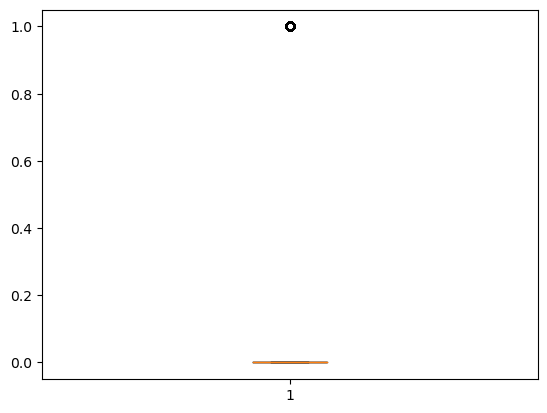

In [251]:
plt.boxplot('mobile_site_booking',data = travel_type_2)
plt.show()

In [252]:
Q1 = travel_type_2['mobile_site_booking'].quantile(0.25)

Q3 = travel_type_2['mobile_site_booking'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 0.0 | IQR: 0.0 | LL: 0.0 | UL: 0.0


In [253]:
ul_outlier_count = travel_type_2[travel_type_2['mobile_site_booking'] > UL].shape[0]
ll_outlier_count = travel_type_2[travel_type_2['mobile_site_booking'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_2.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 1649 | LL_OC: 0 | T_OC: 1649 | T_OP: 4.8087017380146975


In [254]:
mobile_site_booking_ul = travel_type_2.loc[travel_type_2['mobile_site_booking'] > UL].shape[0]

In [255]:
mobile_site_booking_ul

1649

In [256]:
print(travel_type_2['mobile_site_booking'].quantile(0.90))

0.0


In [257]:
travel_type_2['mobile_site_booking'] = np.where(travel_type_2['mobile_site_booking'] > 0, 0,travel_type_2['mobile_site_booking'])

In [258]:
print(travel_type_2['mobile_site_booking'].skew())

0


In [259]:
index = travel_type_2[(travel_type_2['mobile_site_booking'] > 0)].index
travel_type_2.drop(index , inplace = True)

In [260]:
travel_type_2['mobile_site_booking'].describe()

count    34292.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: mobile_site_booking, dtype: float64

In [261]:
travel_type_2['mobile_site_booking'].unique()

array([0], dtype=int64)

#### Treatment of outliers for 'time_diff'

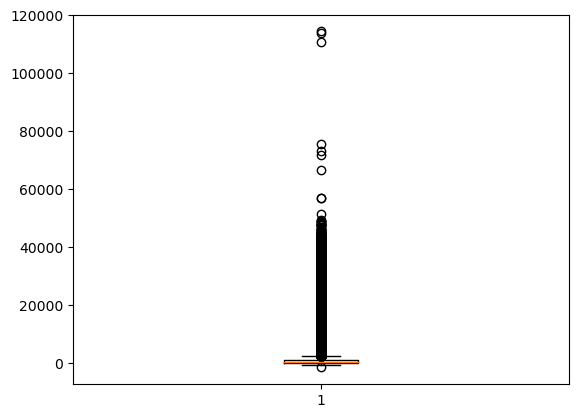

In [262]:
plt.boxplot('time_diff', data = travel_type_2)
plt.show()

In [263]:
Q1 = travel_type_2['time_diff'].quantile(0.25)

Q3 = travel_type_2['time_diff'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 191.0 | Q3: 1150.0 | IQR: 959.0 | LL: -1247.5 | UL: 2588.5


In [264]:
ul_outlier_count = travel_type_2[travel_type_2['time_diff'] > UL].shape[0]
ll_outlier_count = travel_type_2[travel_type_2['time_diff'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_2.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 4612 | LL_OC: 1 | T_OC: 4613 | T_OP: 13.452117111862826


In [265]:
time_diff_ul2 = travel_type_2[travel_type_2['time_diff'] > UL]

In [266]:
time_diff_ul2

online_booking  mobile_site_booking  from_date_month  \
73                  1                    0                1   
94                  0                    0                1   
143                 1                    0                1   
218                 1                    0                1   
246                 0                    0                1   
...               ...                  ...              ...   
43325               0                    0               11   
43337               0                    0               12   
43343               1                    0               12   
43375               1                    0               11   
43377               1                    0               12   

       from_date_weekday  from_date_hour  from_date_minute  \
73                     3              11                15   
94                     4              19                30   
143                    0              12                 0   
218                    6               8                 0   
246                    0               6                30   
...                  ...             ...               ...   
43325                  0              11                 0   
43337                  6               3                30   
43343                  1              16                30   
43375                  4               4                30   
43377                  1              23                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
73                         1                        2                     8   
94                         1                        2                    12   
143                        1                        3                     0   
218                        1                        4                     9   
246                        1                        4                    14   
...                      ...                      ...                   ...   
43325                     11                        5                    15   
43337                     11                        5                    16   
43343                     11                        5                    18   
43375                     11                        5                    22   
43377                     11                        5                    22   

       booking_created_minute  time_diff  from_date_session  \
73                         45    31830.0                  4   
94                         48     3282.0                  4   
143                        52    16508.0                  4   
218                        36     2784.0                  4   
246                        54     3816.0                  4   
...                       ...        ...                ...   
43325                       2     2638.0                  4   
43337                      57    10713.0                  4   
43343                      20    14290.0                  4   
43375                      27     7563.0                  4   
43377                      33    24507.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
73                           4                  0                        0   
94                           4                  0                        0   
143                          4                  0                        0   
218                          4                  0                        0   
246                          4                  0                        0   
...                        ...                ...                      ...   
43325                        4                  0                        0   
43337                        4                  0                        0   
43343                        4                  0                        0   
43375              

In [267]:
time_diff_ul2.Car_Cancellation.value_counts()

0    4322
1     290
Name: Car_Cancellation, dtype: int64

### ML model for 'time_diff_ul2'

In [268]:
i = time_diff_ul2.iloc[:,0:16]
i.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
73                1                    0                1                  3   
94                0                    0                1                  4   
143               1                    0                1                  0   
218               1                    0                1                  6   
246               0                    0                1                  0   

     from_date_hour  from_date_minute  booking_created_month  \
73               11                15                      1   
94               19                30                      1   
143              12                 0                      1   
218               8                 0                      1   
246               6                30                      1   

     booking_created_weekday  booking_created_hour  booking_created_minute  \
73                         2                     8                      45   
94                         2                    12                      48   
143                        3                     0                      52   
218                        4                     9                      36   
246                        4                    14                      54   

     time_diff  from_date_session  booking_created_session  from_date_seasons  \
73     31830.0                  4                        4                  0   
94      3282.0                  4                        4                  0   
143    16508.0                  4                        4                  0   
218     2784.0                  4                        4                  0   
246     3816.0                  4                        4                  0   

     booking_created_seasons  haversine_distance  
73                         0           23.828870  
94                         0           28.229549  
143                        0           26.512630  
218                        0           23.585463  
246                        0           19.777255

In [269]:
j = time_diff_ul2.iloc[:,16]
j.head()

73     0
94     0
143    0
218    0
246    0
Name: Car_Cancellation, dtype: int64

In [270]:
i_train,i_test,j_train,j_test = train_test_split(i,j,train_size = 0.75,random_state = 333)

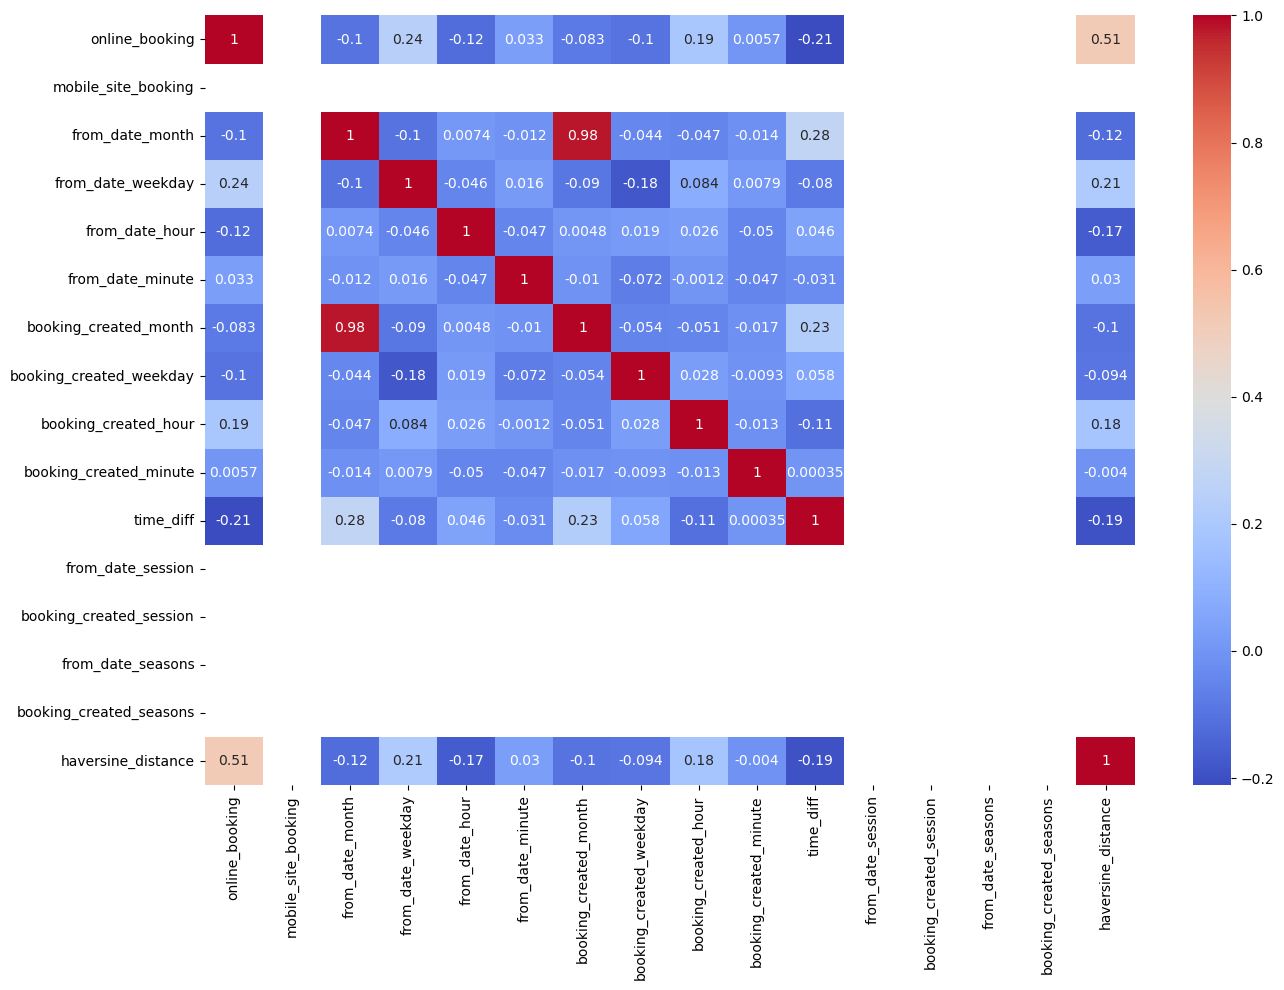

In [271]:
plt.figure(figsize = (15,10))
sns.heatmap(i_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [272]:
i_train = i_train.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons','booking_created_month'],axis=1)
i_train

online_booking  from_date_month  from_date_weekday  from_date_hour  \
35724               0               10                  0               9   
29790               1                9                  6              12   
42406               0               11                  3               3   
37856               1               10                  5              15   
28192               1                8                  4              19   
...               ...              ...                ...             ...   
5647                0                3                  4              10   
35683               0               10                  2               8   
1286                0                1                  4               6   
20115               0                6                  6              17   
15588               1                6                  0              22   

       from_date_minute  booking_created_weekday  booking_created_hour  \
35724                15                        0                    10   
29790                45                        6                     8   
42406                30                        4                    15   
37856                30                        0                    12   
28192                30                        4                     3   
...                 ...                      ...                   ...   
5647                 45                        2                    11   
35683                15                        0                    10   
1286                 30                        2                    11   
20115                45                        4                    11   
15588                30                        1                    22   

       booking_created_minute  time_diff  haversine_distance  
35724                      30    40245.0            5.384265  
29790                      28    10337.0           32.896807  
42406                      44     7906.0           33.459127  
37856                      27     7383.0           15.136450  
28192                      33    11037.0           33.810428  
...                       ...        ...                 ...  
5647                       46     2819.0           42.718791  
35683                      19    43076.0           12.636665  
1286                       18     2592.0           23.585463  
20115                       2     3283.0            3.991214  
15588                      39     8631.0           41.178452  

[3459 rows x 10 columns]

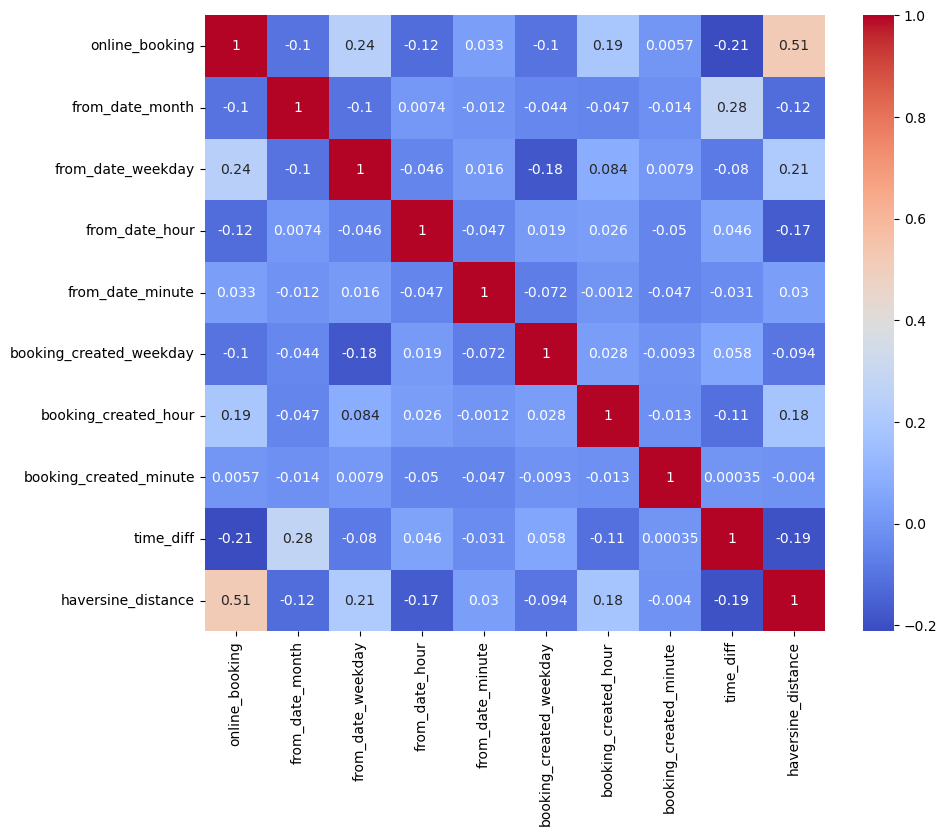

In [273]:
plt.figure(figsize = (10,8))
sns.heatmap(i_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [274]:
i_test = i_test.drop(['mobile_site_booking','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons','booking_created_month'],axis = 1)

In [275]:
i_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
21945               1                7                  5               6   
34221               0                9                  1              19   
20102               0                7                  4               8   
21424               0                7                  1              17   
34712               1                9                  4              10   

       from_date_minute  booking_created_weekday  booking_created_hour  \
21945                15                        1                    15   
34221                 0                        4                    15   
20102                30                        4                    10   
21424                45                        5                    11   
34712                30                        1                    12   

       booking_created_minute  time_diff  haversine_distance  
21945                      26     5209.0            9.593327  
34221                      44     5956.0           12.584575  
20102                      14     9976.0           12.636665  
21424                      44    24841.0           12.636665  
34712                      28     4202.0           29.991520

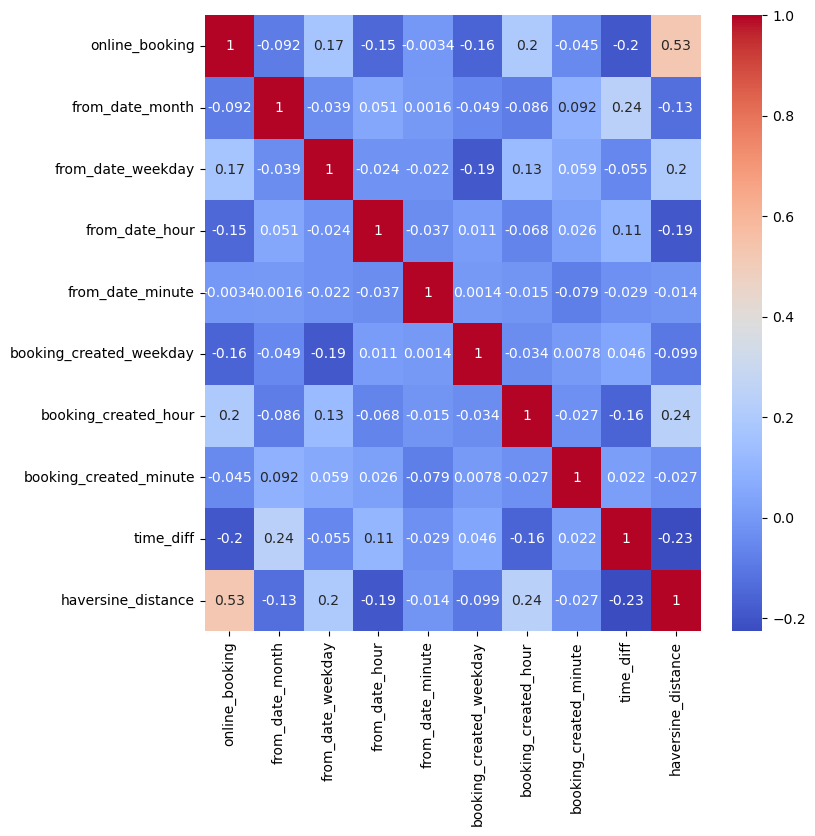

In [276]:
plt.figure(figsize = (8,8))
sns.heatmap(i_test.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [277]:
ss = StandardScaler()
i_train = ss.fit_transform(i_train)
i_test = ss.transform(i_test)

#### Classification report

In [278]:
classifier = DecisionTreeClassifier(random_state = 333, max_depth = 13,
                                   criterion = 'gini',max_leaf_nodes = 25,
                                  min_samples_split = 10)

dt = classifier.fit(i_train,j_train)
j_pred = classifier.predict(i_test)
j_pred_train = classifier.predict(i_train)

print(classification_report(j_test,j_pred))
print(classification_report(j_train,j_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1071
           1       0.96      0.63      0.76        82

    accuracy                           0.97      1153
   macro avg       0.97      0.82      0.87      1153
weighted avg       0.97      0.97      0.97      1153

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3251
           1       0.99      0.69      0.81       208

    accuracy                           0.98      3459
   macro avg       0.99      0.84      0.90      3459
weighted avg       0.98      0.98      0.98      3459



#### Confusion Matrix

In [279]:
conf_matrix = metrics.confusion_matrix(j_test,j_pred)
conf_matrix

array([[1069,    2],
       [  30,   52]], dtype=int64)

<Axes: >

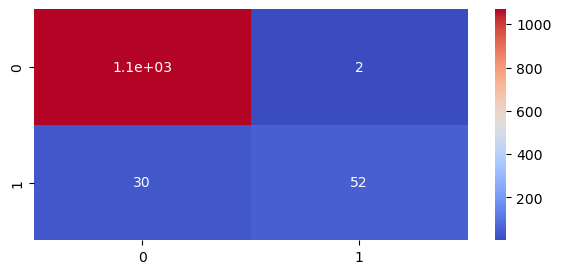

In [280]:
fig, ax = plt.subplots(figsize = (7,3))
sns.heatmap(conf_matrix, annot = True, ax = ax, cmap = 'coolwarm')

#### Takeaways

* The model used was Decision Tree Classifier as the rows were more inorder to get better accuracy
* The F1-score obtained is also a good indicator for this model

In [281]:
time_diff_ll2 = travel_type_2[travel_type_2['time_diff'] < LL]

In [282]:
time_diff_ll2

online_booking  mobile_site_booking  from_date_month  \
10276               0                    0                4   

       from_date_weekday  from_date_hour  from_date_minute  \
10276                  2               0                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
10276                      4                        2                    22   

       booking_created_minute  time_diff  from_date_session  \
10276                      54    -1374.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
10276                        4                  0                        0   

       haversine_distance  Car_Cancellation  
10276            13.32265                 0

* The above dataframe can be ignored and won't be considered for modelling as it contains only one row and to run a classification modelling on a dataframe we need atleast 20 unbiased row to get good results

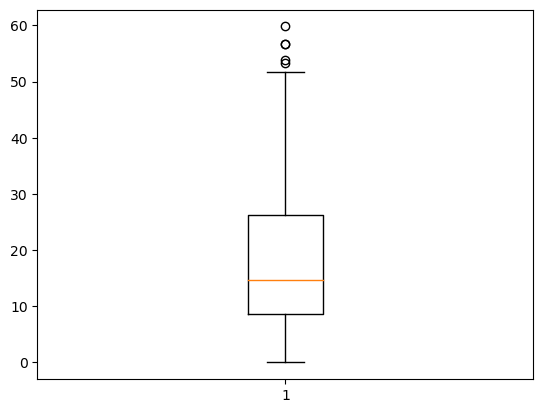

In [283]:
plt.boxplot('haversine_distance',data = travel_type_2) 
plt.show()

In [284]:
Q1 = travel_type_2['haversine_distance'].quantile(0.25)

Q3 = travel_type_2['haversine_distance'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 8.56366910850896 | Q3: 26.26685490403849 | IQR: 17.703185795529528 | LL: -17.991109584785335 | UL: 52.82163359733278


In [285]:
ul_outlier_count = travel_type_2[travel_type_2['haversine_distance'] > UL].shape[0]
ll_outlier_count = travel_type_2[travel_type_2['haversine_distance'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_2.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 5 | LL_OC: 0 | T_OC: 5 | T_OP: 0.014580660212294413


In [286]:
haversine_distance_ul = travel_type_2.loc[travel_type_2['haversine_distance'] > UL].shape[0]

In [287]:
haversine_distance_ul

5

In [288]:
print(travel_type_2['haversine_distance'].quantile(0.90))

32.7654069631689


In [289]:
travel_type_2['haversine_distance'] = np.where(travel_type_2['haversine_distance'] > 32.765, 32.765,travel_type_2['haversine_distance'])

In [290]:
index = travel_type_2[(travel_type_2['haversine_distance'] > 32.765)].index
travel_type_2.drop(index , inplace = True)

In [291]:
travel_type_2.haversine_distance.describe()

count    34292.000000
mean        17.034181
std          9.842079
min          0.000000
25%          8.563669
50%         14.666320
75%         26.266855
max         32.765000
Name: haversine_distance, dtype: float64

In [292]:
# time_diff_ul2
# travel_type_2

# These are the dataframes on which we will do/did predective modelling

## ML Model for 'travel_type_2'

In [293]:
travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   online_booking           34292 non-null  int64  
 1   mobile_site_booking      34292 non-null  int64  
 2   from_date_month          34292 non-null  int64  
 3   from_date_weekday        34292 non-null  int64  
 4   from_date_hour           34292 non-null  int64  
 5   from_date_minute         34292 non-null  int64  
 6   booking_created_month    34292 non-null  int64  
 7   booking_created_weekday  34292 non-null  int64  
 8   booking_created_hour     34292 non-null  int64  
 9   booking_created_minute   34292 non-null  int64  
 10  time_diff                34292 non-null  float64
 11  from_date_session        34292 non-null  int32  
 12  booking_created_session  34292 non-null  int32  
 13  from_date_seasons        34292 non-null  int32  
 14  booking_created_season

In [294]:
x2 = travel_type_2.iloc[:,0:16]
x2.head()

online_booking  mobile_site_booking  from_date_month  from_date_weekday  \
0               0                    0                1                  1   
1               0                    0                1                  1   
2               0                    0                1                  1   
3               0                    0                1                  1   
4               0                    0                1                  1   

   from_date_hour  from_date_minute  booking_created_month  \
0               2                 0                      1   
1               9                 0                      1   
2               3                30                      1   
3               5                45                      1   
4               9                 0                      1   

   booking_created_weekday  booking_created_hour  booking_created_minute  \
0                        1                     1                      39   
1                        1                     2                      25   
2                        1                     3                       8   
3                        1                     4                      39   
4                        1                     7                      53   

   time_diff  from_date_session  booking_created_session  from_date_seasons  \
0       21.0                  4                        4                  0   
1      395.0                  4                        4                  0   
2       22.0                  4                        4                  0   
3       66.0                  4                        4                  0   
4       67.0                  4                        4                  0   

   booking_created_seasons  haversine_distance  
0                        0            3.973268  
1                        0           13.986247  
2                        0           12.700435  
3                        0            9.519173  
4                        0           14.690552

In [295]:
y2 = travel_type_2.iloc[:,16]
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [296]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,train_size = 0.75,random_state = 999)

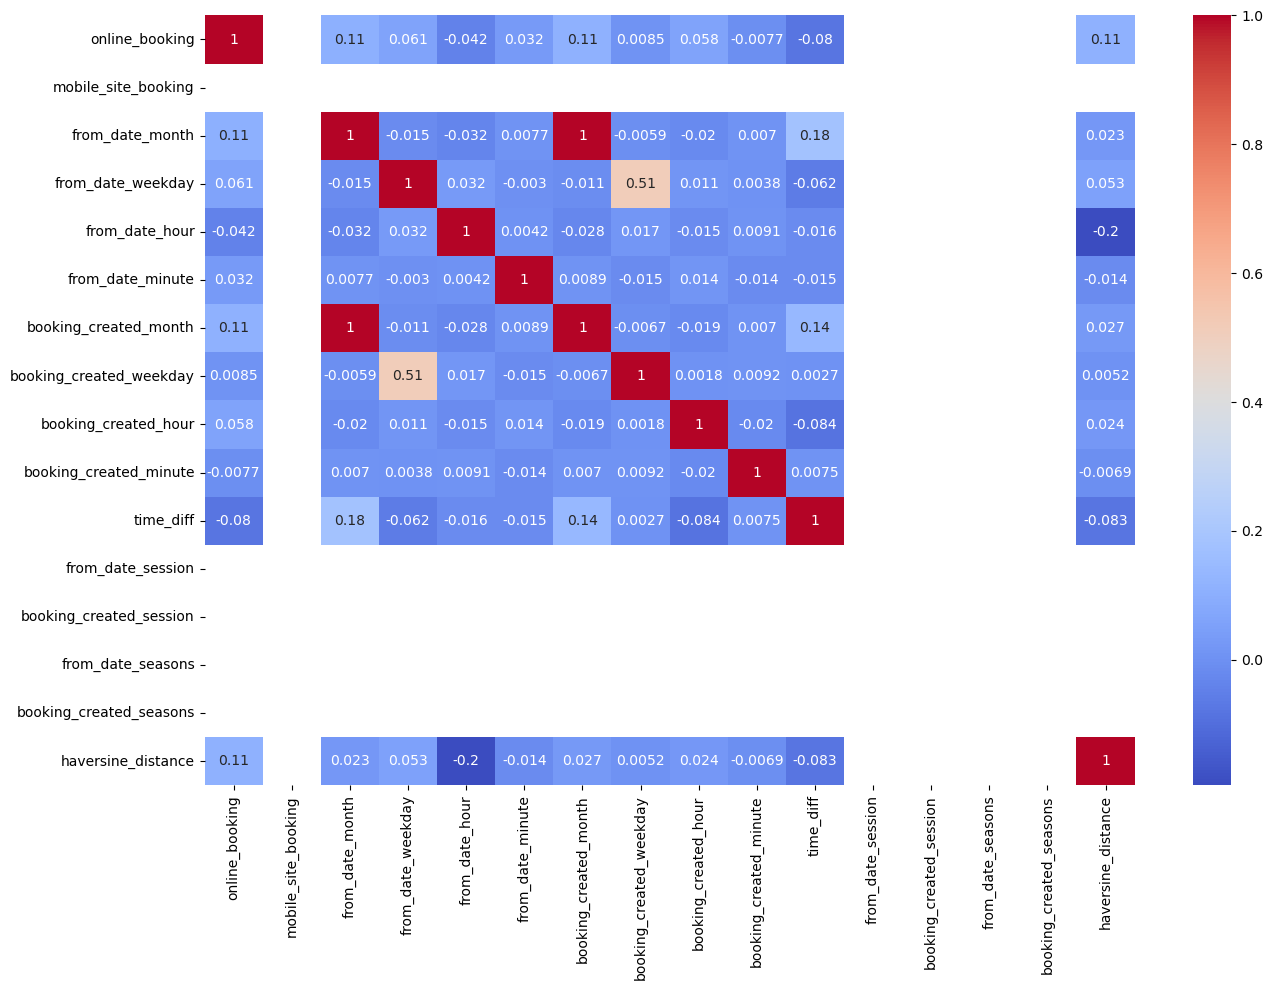

In [297]:
plt.figure(figsize = (15,10))
sns.heatmap(x2_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

# mobile_site_booking, from_date_session, booking_created_month, booking_created_session, from_date_seasons, booking_created_seasons

In [298]:
x2_train = x2_train.drop(['mobile_site_booking', 'from_date_session', 'booking_created_month', 'booking_created_session', 'from_date_seasons', 'booking_created_seasons'],axis = 1)

In [299]:
x2_train.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
39940               0               10                  1              21   
6790                0                3                  0              19   
23592               1                7                  4              23   
26002               1                8                  5              12   
11169               0                4                  5               5   

       from_date_minute  booking_created_weekday  booking_created_hour  \
39940                30                        1                     9   
6790                  0                        0                    18   
23592                 0                        4                    18   
26002                 0                        5                     9   
11169                45                        4                    11   

       booking_created_minute  time_diff  haversine_distance  
39940                      47      703.0           20.018002  
6790                       43       17.0           28.029284  
23592                      35      265.0            4.296269  
26002                      58      122.0           10.119055  
11169                       0     1125.0            5.272980

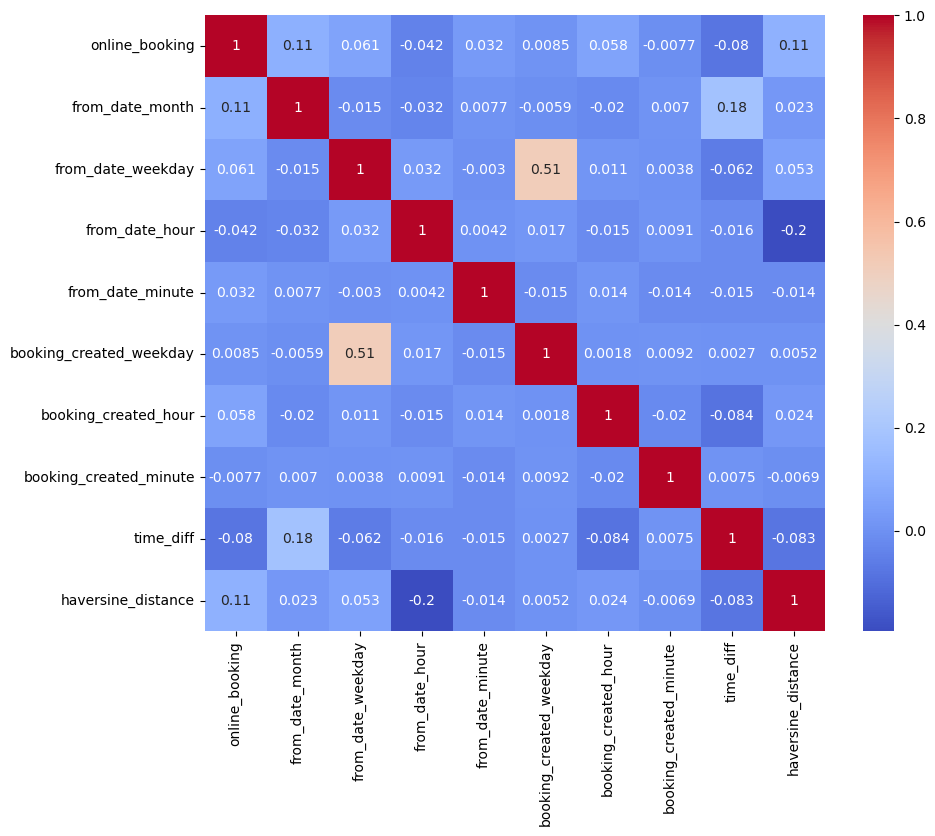

In [300]:
plt.figure(figsize = (10,8))
sns.heatmap(x2_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [301]:
x2_test = x2_test.drop(['mobile_site_booking', 'from_date_session', 'booking_created_month', 'booking_created_session', 'from_date_seasons', 'booking_created_seasons'],axis = 1)

In [302]:
x2_test.head()

online_booking  from_date_month  from_date_weekday  from_date_hour  \
6175                1                3                  1               8   
29907               0                8                  0               3   
25735               0                8                  5               6   
7663                0                3                  5              10   
7904                0                3                  1               3   

       from_date_minute  booking_created_weekday  booking_created_hour  \
6175                  0                        0                    22   
29907                45                        6                    21   
25735                 0                        4                     0   
7663                 30                        5                     9   
7904                 30                        0                    15   

       booking_created_minute  time_diff  haversine_distance  
6175                       36      564.0           16.929287  
29907                      23      382.0           28.411625  
25735                      36     1764.0           32.765000  
7663                       25       65.0            8.039234  
7904                       10      740.0           29.573863

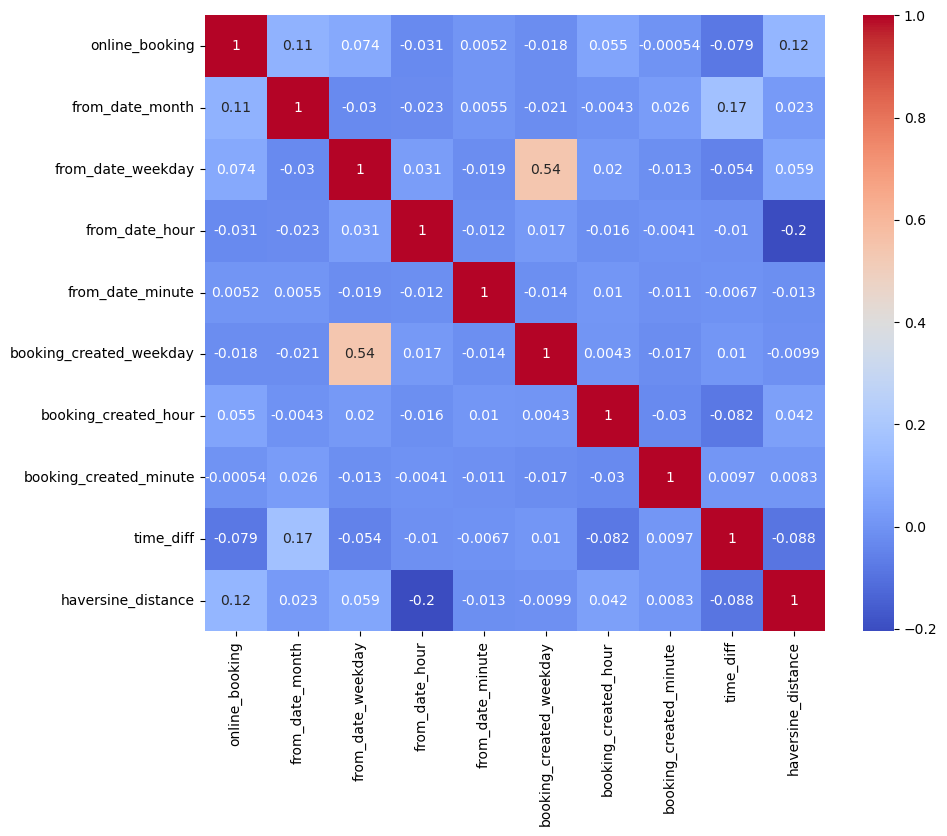

In [303]:
plt.figure(figsize = (10,8))
sns.heatmap(x2_test.corr(),annot = True, cmap = 'coolwarm')
plt.show()

### Logistic Regression

In [304]:
ss = StandardScaler()
x2_train = ss.fit_transform(x2_train)
x2_test = ss.transform(x2_test)

In [305]:
classifier = LogisticRegression()
lr = classifier.fit(x2_train,y2_train)
y2_pred = classifier.predict(x2_test)
y2_pred_train = classifier.predict(x2_train)

#### Classification Report

In [306]:
print(classification_report(y2_train,y2_pred_train))
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     23615
           1       0.58      0.02      0.03      2104

    accuracy                           0.92     25719
   macro avg       0.75      0.51      0.49     25719
weighted avg       0.89      0.92      0.88     25719

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7902
           1       0.38      0.01      0.02       671

    accuracy                           0.92      8573
   macro avg       0.65      0.51      0.49      8573
weighted avg       0.88      0.92      0.89      8573



#### Confusion Matrix

In [307]:
conf_matrix = metrics.confusion_matrix(y2_test,y2_pred)
conf_matrix

array([[7889,   13],
       [ 663,    8]], dtype=int64)

<Axes: >

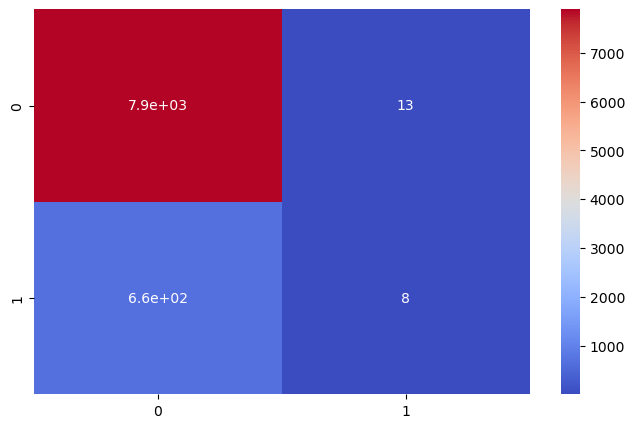

In [308]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax, cmap = 'coolwarm')

#### ROC AUC Curve

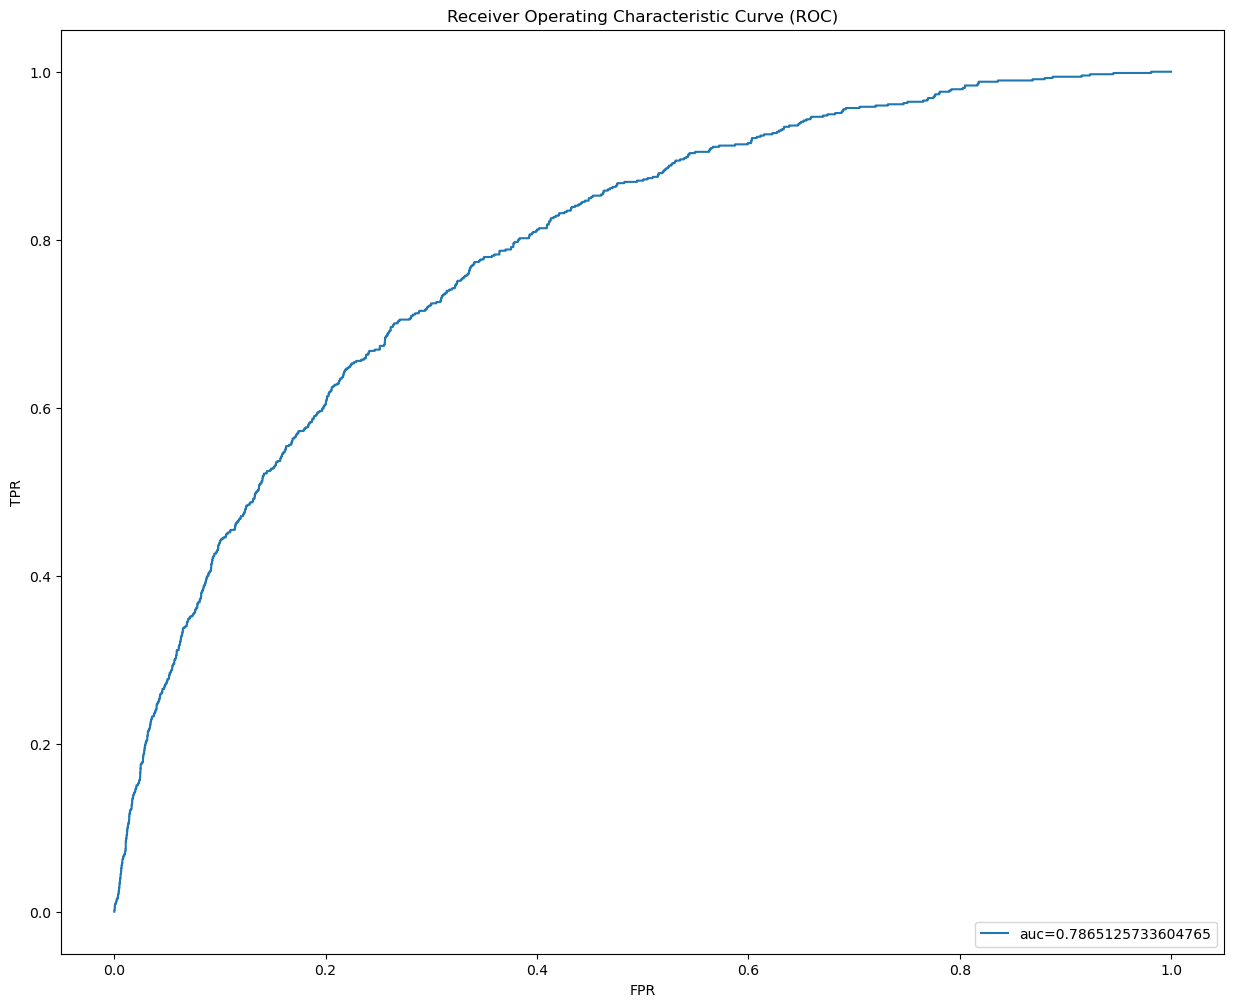

In [309]:
y2_pred_proba = lr.predict_proba(x2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.78** which is considered to be okay for prediction overall.

### KNN

In [310]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x2_train,y2_train)
y2_pred = knn.predict(x2_test)

#### Confusion Matrix

In [311]:
print(confusion_matrix(y2_test,y2_pred))

[[7689  213]
 [ 509  162]]


#### Classification Report

In [312]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7902
           1       0.43      0.24      0.31       671

    accuracy                           0.92      8573
   macro avg       0.68      0.61      0.63      8573
weighted avg       0.90      0.92      0.90      8573



#### ROC AUC Curve

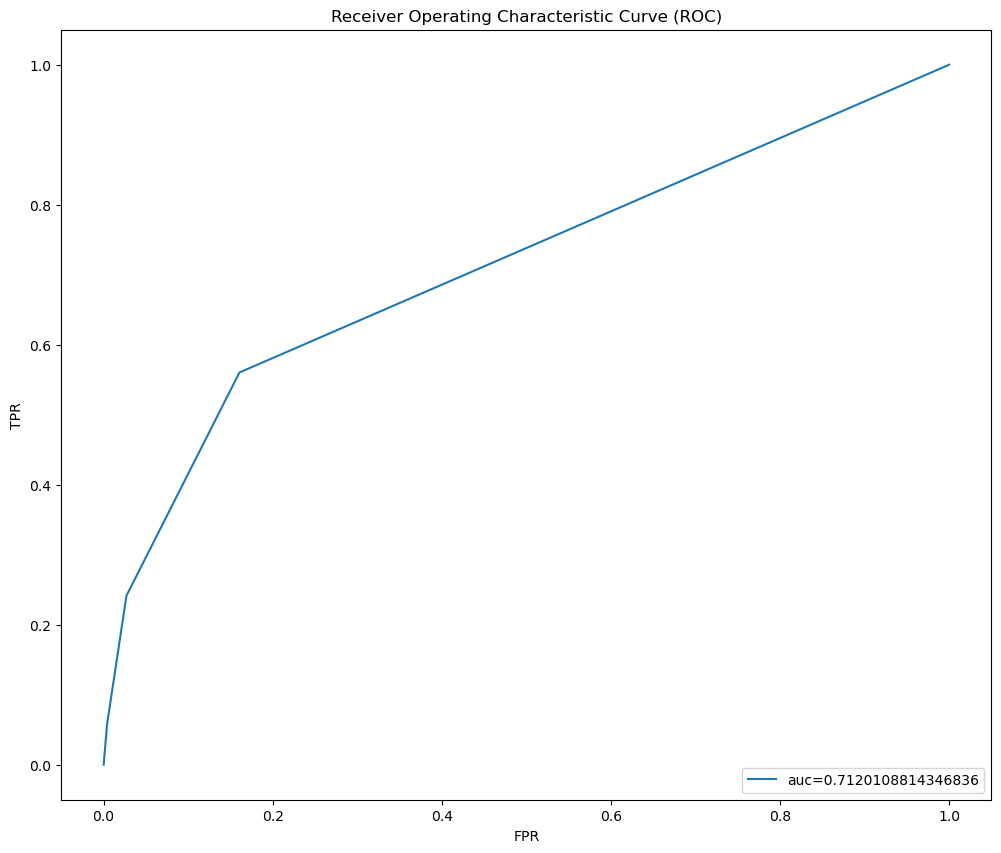

In [313]:
y2_pred_proba = knn.predict_proba(x2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Choosing a K value

In [314]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x2,y2,cv = 10)
    accuracy_rate.append(score.mean())

In [315]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x2,y2,cv = 10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

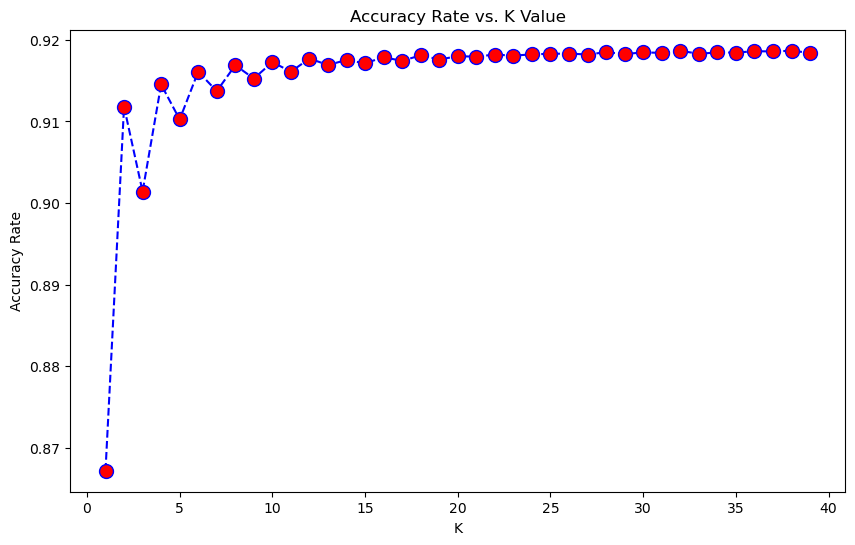

In [316]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

* Here we can see that that after around K > 5 the error rate just tends to very small. Let's retrain the model with that and check the classification report.
* Also, in case of Accuracy, after around K > 5, the accuracy is also almost contant.

#### Classification Report with K = 1

In [317]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x2_train,y2_train)
pred = knn.predict(x2_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=1


[[7434  468]
 [ 459  212]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7902
           1       0.31      0.32      0.31       671

    accuracy                           0.89      8573
   macro avg       0.63      0.63      0.63      8573
weighted avg       0.89      0.89      0.89      8573



#### Classification Report with K = 5

In [318]:
# NOW WITH K = 5. 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x2_train,y2_train)
pred = knn.predict(x2_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=5


[[7758  144]
 [ 528  143]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7902
           1       0.50      0.21      0.30       671

    accuracy                           0.92      8573
   macro avg       0.72      0.60      0.63      8573
weighted avg       0.90      0.92      0.91      8573



#### Takeaways

* Here we used the KNeighbour Classifier for predective modelling as it can handle large datasets
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Naive Bayes

In [489]:
model = GaussianNB()
model.fit(x2_train, y2_train)

GaussianNB()

In [320]:
y2_pred = model.predict(x2_test)
y2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Confusion Matrix

In [321]:
conf_matrix = confusion_matrix(y2_test,y2_pred)
conf_matrix

array([[7699,  203],
       [ 634,   37]], dtype=int64)

#### Accuracy, precision, recall

In [322]:
Accuracy = metrics.accuracy_score(y2_test,y2_pred)
Precision = metrics.precision_score(y2_test,y2_pred)
Recall = metrics.recall_score(y2_test,y2_pred)
print('Accuracy = {}, Precision = {}, Recall = {}'.format(Accuracy,Precision,Recall))

Accuracy = 0.9023678992184766, Precision = 0.15416666666666667, Recall = 0.05514157973174367


#### ROC AUC Curve

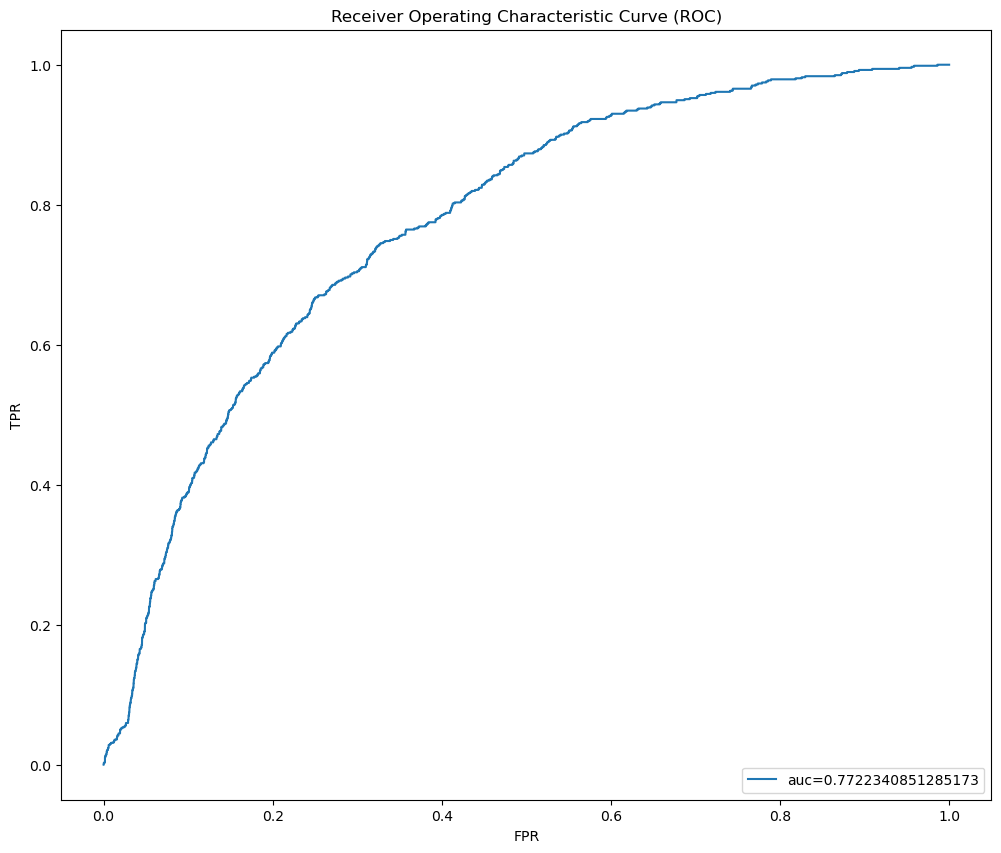

In [323]:
y2_pred_proba = model.predict_proba(x2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.77** which is considered to be okay for prediction overall.

### Decision Tree 

#### Decision Tree with Gini

#### Decision Tree Depth - 2

In [324]:
model1 = DecisionTreeClassifier(random_state = 1,max_depth = 2)
model1.fit(x2_train,y2_train)
model1_score_train = model1.score(x2_train,y2_train)
model1_score_test = model1.score(x2_test,y2_test)
print('Training Score',model1_score_train)
print('Testing Score',model1_score_test)

Training Score 0.9181927757688868
Testing Score 0.9217310159804036


#### Performance Metrics

In [325]:
from sklearn.metrics import auc
y2_pred = model1.predict_proba(x2_test)[:,1]
fpr,tpr,_= roc_curve(y2_test,y2_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

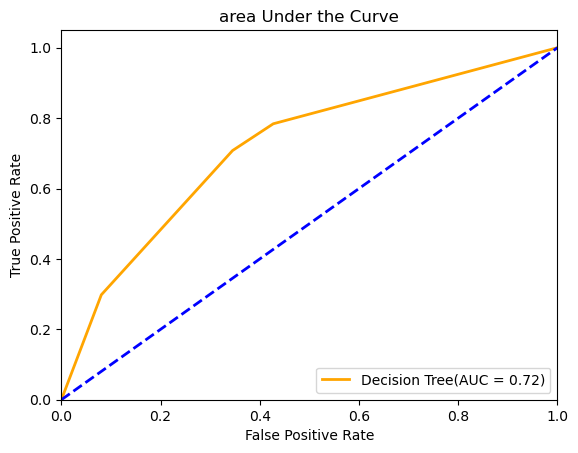

In [326]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle ='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [327]:
y2_pred = model1.predict(x2_test)

#### Confusion Matrix

In [328]:
print(confusion_matrix(y2_test,y2_pred))

[[7902    0]
 [ 671    0]]


#### Classification Report

In [329]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7902
           1       0.00      0.00      0.00       671

    accuracy                           0.92      8573
   macro avg       0.46      0.50      0.48      8573
weighted avg       0.85      0.92      0.88      8573



#### Decision Tree Depth - 20

In [330]:
model2 = DecisionTreeClassifier(random_state = 1,max_depth = 20)
model2.fit(x2_train,y2_train)
model2_score_train = model2.score(x2_train,y2_train)
model2_score_test = model2.score(x2_test,y2_test)
print('Training Score',model2_score_train)
print('Testing Score',model2_score_test)

Training Score 0.9955674792954625
Testing Score 0.8894202729499592


#### Performance Metrics

In [331]:
y2_pred = model2.predict_proba(x2_test)[:,1]
fpr,tpr,_= roc_curve(y2_test,y2_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

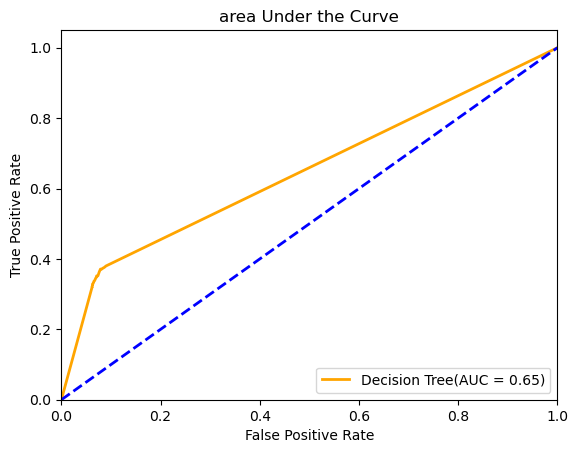

In [332]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [333]:
y2_pred = model2.predict(x2_test)

#### Confusion Matrix

In [334]:
print(confusion_matrix(y2_test,y2_pred))

[[7405  497]
 [ 451  220]]


#### Classification Matrix

In [335]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7902
           1       0.31      0.33      0.32       671

    accuracy                           0.89      8573
   macro avg       0.62      0.63      0.63      8573
weighted avg       0.89      0.89      0.89      8573



#### Decision Tree with Entropy

#### Decision Tree with depth -20

In [336]:
model3 = DecisionTreeClassifier(random_state = 5,max_depth = 20,criterion = 'entropy')
model3.fit(x2_train,y2_train)
model3_score_train = model3.score(x2_train,y2_train)
model3_score_test = model3.score(x2_test,y2_test)
print('Training Score',model3_score_train)
print('Testing Score',model3_score_test)

Training Score 0.9923014114079085
Testing Score 0.8945526653446868


#### Performance Metrics

In [337]:
y2_pred = model3.predict_proba(x2_test)[:,1]
fpr,tpr,_ = roc_curve(y2_test,y2_pred)
roc_auc = auc(fpr,tpr)

#### Area under the curve

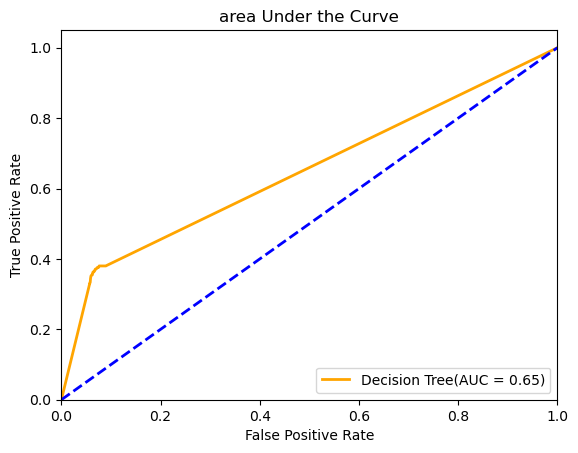

In [338]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [339]:
y2_pred = model3.predict(x2_test)

#### Confusion Matrix

In [340]:
print(confusion_matrix(y2_test,y2_pred))

[[7438  464]
 [ 440  231]]


#### Classification Report

In [341]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7902
           1       0.33      0.34      0.34       671

    accuracy                           0.89      8573
   macro avg       0.64      0.64      0.64      8573
weighted avg       0.90      0.89      0.90      8573



#### Graphical representation of tree

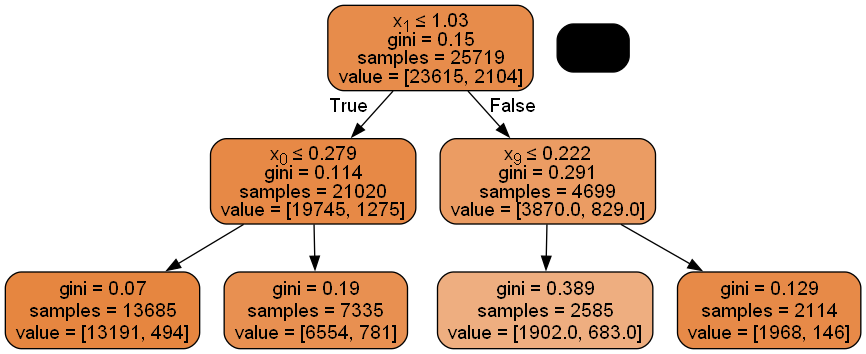

<Figure size 1000x800 with 0 Axes>

In [342]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
plt.figure(figsize = (10,8))
dot_data = StringIO()
export_graphviz(model1,out_file = dot_data,
               filled = True,rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Takeaways
* Here we used the Decision Tree for predective modelling
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Random Forest

In [343]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

In [344]:
rf = RandomForestClassifier(random_state = 40)

#### Hyperparameter Optimization Using GridSearchCV

In [345]:
np.random.seed(40)

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf,cv = 10,param_grid = param_dist,n_jobs = 3)

cv_rf.fit(x2_train,y2_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None}


In [490]:
rf.set_params(criterion = 'gini',max_features = None, max_depth = 5)

RandomForestClassifier(max_depth=5, max_features=None, random_state=40)

#### Training the Random Forest

In [491]:
rf.fit(x2_train,y2_train)

RandomForestClassifier(max_depth=5, max_features=None, random_state=40)

#### Prediction

In [348]:
y2_pred = rf.predict(x2_test)

#### Confusion Matrix

In [349]:
print(confusion_matrix(y2_test,y2_pred))

[[7851   51]
 [ 579   92]]


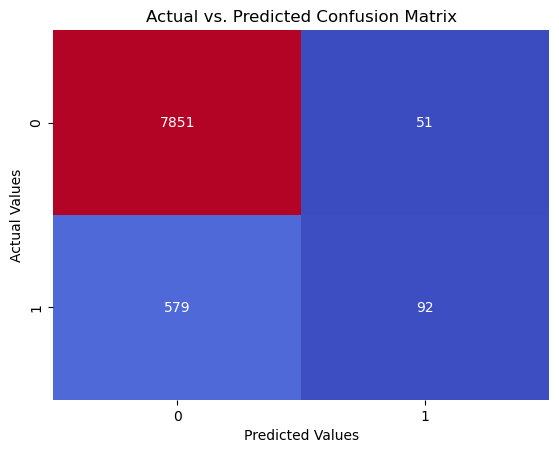

In [350]:
conf_mat = confusion_matrix(y2_test,y2_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, cmap = 'coolwarm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Classification Report

In [351]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7902
           1       0.64      0.14      0.23       671

    accuracy                           0.93      8573
   macro avg       0.79      0.57      0.59      8573
weighted avg       0.91      0.93      0.90      8573



#### Accuracy

In [352]:
accuracy_rf = rf.score(x2_test,y2_test)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.92651


#### Error Rate

In [353]:
test_error_rate_rf = 1-accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)

error rate of our model is: 0.07349


#### Area Under the Curve

In [354]:
y2_prob = rf.predict_proba(x2_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y2_test, y2_prob, pos_label = 1)

In [355]:
auc_rf = auc(fpr2,tpr2)

In [356]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

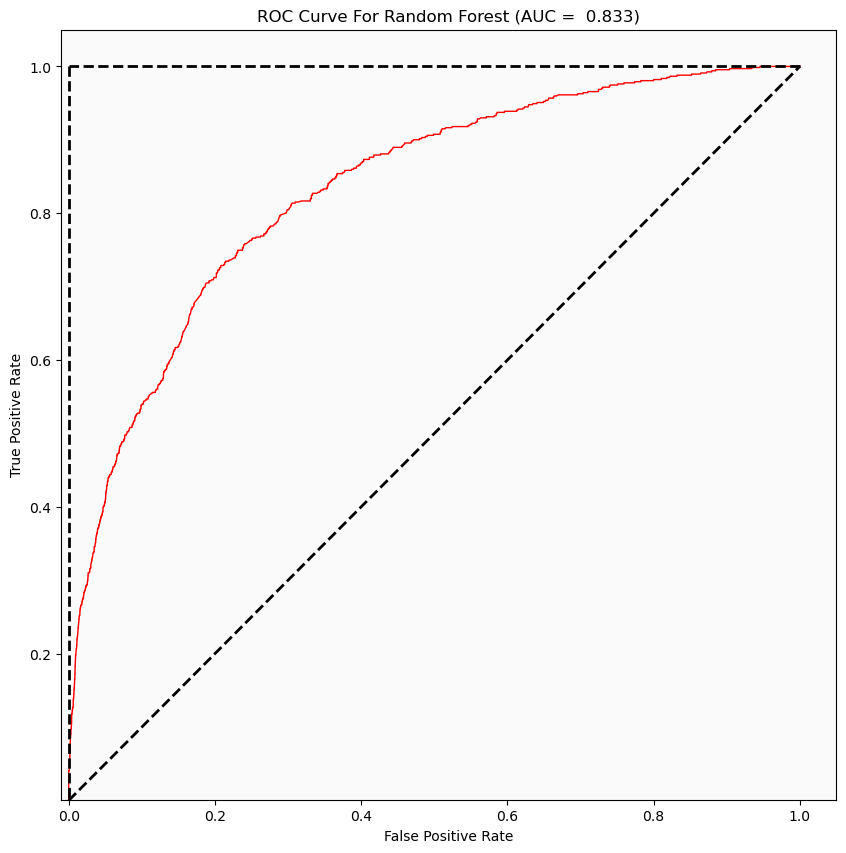

In [357]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.83** which is considered to be good for prediction overall.

### SVM

In [358]:
svc = SVC()
svc.fit(x2_train,y2_train)
y2_pred = svc.predict(x2_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y2_test,y2_pred))

Accuracy Score:
0.9247637933045608


#### Linear Kernel

In [359]:
svc = SVC(kernel='linear')
svc.fit(x2_train,y2_train)
y2_pred = svc.predict(x2_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y2_test,y2_pred))

Accuracy Score:
0.9217310159804036


#### Polynomial Kernel

In [360]:
svc = SVC(kernel='poly')
svc.fit(x2_train,y2_train)
y2_pred = svc.predict(x2_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y2_test,y2_pred))

Accuracy Score:
0.9247637933045608


#### Confusion Matrix

In [361]:
print(confusion_matrix(y2_test,y2_pred))

[[7900    2]
 [ 643   28]]


Text(0.5, 23.52222222222222, 'Predicted label')

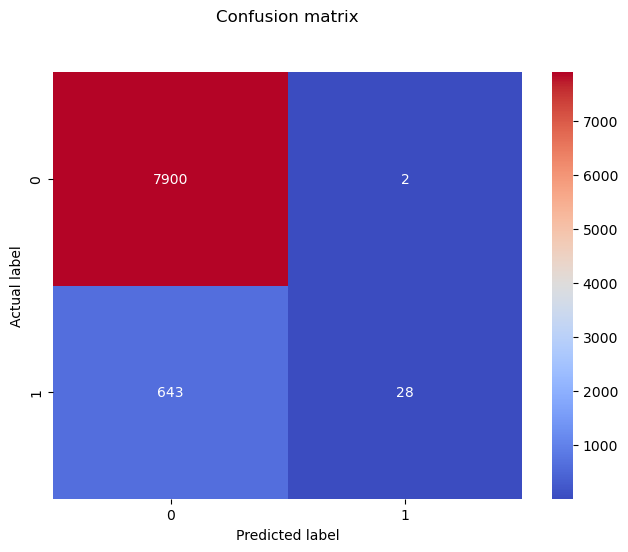

In [362]:
conf_mat = confusion_matrix(y2_test,y2_pred)
sns.heatmap(conf_mat, annot = True, cmap = "coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification Report

In [363]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7902
           1       0.93      0.04      0.08       671

    accuracy                           0.92      8573
   macro avg       0.93      0.52      0.52      8573
weighted avg       0.93      0.92      0.89      8573



#### ROC AUC Curve

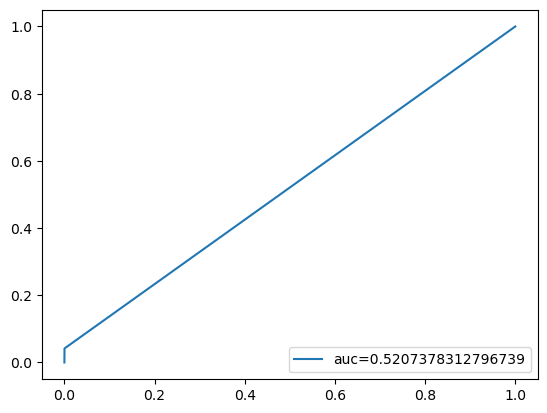

In [364]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y2_test,y2_pred)
auc = roc_auc_score(y2_test,y2_pred)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be 0.5 whic means the model has no discrimination ability, i.e., it is as good as random guessing.

## EDA on travel_type_3

In [365]:
df[df.travel_type_id == 3]

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
8             2.0               3         448.0         NaN           NaN   
20            2.0               3         471.0         NaN           NaN   
23            1.0               3        1286.0         NaN           NaN   
34            1.0               3        1323.0         NaN           NaN   
47            2.0               3         142.0         NaN           NaN   
...           ...             ...           ...         ...           ...   
43415         1.0               3         768.0         NaN          15.0   
43417         4.0               3        1390.0         NaN          15.0   
43420         2.0               3        1237.0         NaN          15.0   
43424         2.0               3         515.0         NaN          15.0   
43428         1.0               3         974.0         NaN          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
8             NaN               0                    0  12.927320  77.635750   
20            NaN               0                    0  13.018540  77.635240   
23            NaN               0                    0  12.973448  77.620320   
34            NaN               1                    0  12.869805  77.653211   
47            NaN               0                    0  12.912810  77.609230   
...           ...             ...                  ...        ...        ...   
43415         NaN               0                    1  12.989990  77.553320   
43417         NaN               0                    0  12.969368  77.641302   
43420         NaN               1                    0  12.926450  77.612060   
43424         NaN               0                    0  12.978960  77.673450   
43428         NaN               0                    0  13.075570  77.559040   

       ...  booking_created_month  booking_created_weekday  \
8      ...                      1                        1   
20     ...                      1                        1   
23     ...                      1                        1   
34     ...                      1                        1   
47     ...                      1                        1   
...    ...                    ...                      ...   
43415  ...                     11                        6   
43417  ...                     11                        6   
43420  ...                     11                        6   
43424  ...                     11                        6   
43428  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
8                         9                      44      376.0   
20                       12                      52       98.0   
23                       14                      39      111.0   
34                       17                      25      155.0   
47                       19                      37      443.0   
...                     ...                     ...        ...   
43415                    12                      32      208.0   
43417                    13                       6      114.0   
43420                    13                      54      666.0   
43424                    14                      23       52.0   
43428                    14                      35      235.0   

       from_date_session  booking_created_session  from_date_seasons  \
8                      4                        4                  0   
20                     4                        4                  0   
23                     4                        4                  0   
34                     4                        4                  0   
47                     4                        4                  0   
...                  ...                      ...                ...   
43415                  4                        4                  0   
43417  

In [366]:
travel_type_3 = df[df.travel_type_id == 3]

In [367]:
travel_type_3

package_id  travel_type_id  from_area_id  to_area_id  from_city_id  \
8             2.0               3         448.0         NaN           NaN   
20            2.0               3         471.0         NaN           NaN   
23            1.0               3        1286.0         NaN           NaN   
34            1.0               3        1323.0         NaN           NaN   
47            2.0               3         142.0         NaN           NaN   
...           ...             ...           ...         ...           ...   
43415         1.0               3         768.0         NaN          15.0   
43417         4.0               3        1390.0         NaN          15.0   
43420         2.0               3        1237.0         NaN          15.0   
43424         2.0               3         515.0         NaN          15.0   
43428         1.0               3         974.0         NaN          15.0   

       to_city_id  online_booking  mobile_site_booking   from_lat  from_long  \
8             NaN               0                    0  12.927320  77.635750   
20            NaN               0                    0  13.018540  77.635240   
23            NaN               0                    0  12.973448  77.620320   
34            NaN               1                    0  12.869805  77.653211   
47            NaN               0                    0  12.912810  77.609230   
...           ...             ...                  ...        ...        ...   
43415         NaN               0                    1  12.989990  77.553320   
43417         NaN               0                    0  12.969368  77.641302   
43420         NaN               1                    0  12.926450  77.612060   
43424         NaN               0                    0  12.978960  77.673450   
43428         NaN               0                    0  13.075570  77.559040   

       ...  booking_created_month  booking_created_weekday  \
8      ...                      1                        1   
20     ...                      1                        1   
23     ...                      1                        1   
34     ...                      1                        1   
47     ...                      1                        1   
...    ...                    ...                      ...   
43415  ...                     11                        6   
43417  ...                     11                        6   
43420  ...                     11                        6   
43424  ...                     11                        6   
43428  ...                     11                        6   

       booking_created_hour  booking_created_minute  time_diff  \
8                         9                      44      376.0   
20                       12                      52       98.0   
23                       14                      39      111.0   
34                       17                      25      155.0   
47                       19                      37      443.0   
...                     ...                     ...        ...   
43415                    12                      32      208.0   
43417                    13                       6      114.0   
43420                    13                      54      666.0   
43424                    14                      23       52.0   
43428                    14                      35      235.0   

       from_date_session  booking_created_session  from_date_seasons  \
8                      4                        4                  0   
20                     4                        4                  0   
23                     4                        4                  0   
34                     4                        4                  0   
47                     4                        4                  0   
...                  ...                      ...                ...   
43415                  4                        4                  0   
43417  

In [368]:
travel_type_3.package_id.value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [369]:
travel_type_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   package_id               7550 non-null   float64
 1   travel_type_id           7550 non-null   int64  
 2   from_area_id             7550 non-null   float64
 3   to_area_id               0 non-null      float64
 4   from_city_id             448 non-null    float64
 5   to_city_id               0 non-null      float64
 6   online_booking           7550 non-null   int64  
 7   mobile_site_booking      7550 non-null   int64  
 8   from_lat                 7550 non-null   float64
 9   from_long                7550 non-null   float64
 10  to_lat                   0 non-null      float64
 11  to_long                  0 non-null      float64
 12  from_date_month          7550 non-null   int64  
 13  from_date_weekday        7550 non-null   int64  
 14  from_date_hour         

In [370]:
travel_type_3 = travel_type_3.drop(['travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id','from_lat','from_long','to_lat','to_long'],axis = 1)

In [371]:
travel_type_3

package_id  online_booking  mobile_site_booking  from_date_month  \
8             2.0               0                    0                1   
20            2.0               0                    0                1   
23            1.0               0                    0                1   
34            1.0               1                    0                1   
47            2.0               0                    0                1   
...           ...             ...                  ...              ...   
43415         1.0               0                    1               11   
43417         4.0               0                    0               11   
43420         2.0               1                    0               11   
43424         2.0               0                    0               11   
43428         1.0               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
8                      1              16                 0   
20                     1              14                30   
23                     1              16                30   
34                     1              20                 0   
47                     2               3                 0   
...                  ...             ...               ...   
43415                  6              16                 0   
43417                  6              15                 0   
43420                  0               1                 0   
43424                  6              15                15   
43428                  6              18                30   

       booking_created_month  booking_created_weekday  booking_created_hour  \
8                          1                        1                     9   
20                         1                        1                    12   
23                         1                        1                    14   
34                         1                        1                    17   
47                         1                        1                    19   
...                      ...                      ...                   ...   
43415                     11                        6                    12   
43417                     11                        6                    13   
43420                     11                        6                    13   
43424                     11                        6                    14   
43428                     11                        6                    14   

       booking_created_minute  time_diff  from_date_session  \
8                          44      376.0                  4   
20                         52       98.0                  4   
23                         39      111.0                  4   
34                         25      155.0                  4   
47                         37      443.0                  4   
...                       ...        ...                ...   
43415                      32      208.0                  4   
43417                       6      114.0                  4   
43420                      54      666.0                  4   
43424                      23       52.0                  4   
43428                      35      235.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
8                            4                  0                        0   
20                           4                  0                        0   
23                           4                  0                        0   
34                           4                  0                        0   
47                           4                  0                        0   
...                        ...                ...                      ...   
43415                        4                  0                        0   
43417                        4 

In [372]:
travel_type_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   package_id               7550 non-null   float64
 1   online_booking           7550 non-null   int64  
 2   mobile_site_booking      7550 non-null   int64  
 3   from_date_month          7550 non-null   int64  
 4   from_date_weekday        7550 non-null   int64  
 5   from_date_hour           7550 non-null   int64  
 6   from_date_minute         7550 non-null   int64  
 7   booking_created_month    7550 non-null   int64  
 8   booking_created_weekday  7550 non-null   int64  
 9   booking_created_hour     7550 non-null   int64  
 10  booking_created_minute   7550 non-null   int64  
 11  time_diff                7550 non-null   float64
 12  from_date_session        7550 non-null   int32  
 13  booking_created_session  7550 non-null   int32  
 14  from_date_seasons      

### Checking for Outliers for travel_type_3

- package_id 
- mobile_site_booking 
- time_diff

#### Treating outliers for package_id

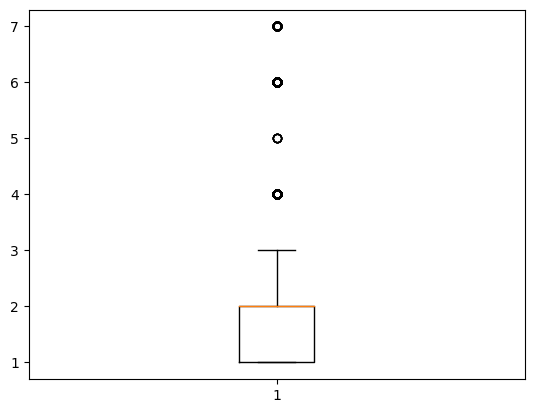

In [374]:
plt.boxplot('package_id',data = travel_type_3)
plt.show()

In [375]:
Q1 = travel_type_3['package_id'].quantile(0.25)

Q3 = travel_type_3['package_id'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 1.0 | Q3: 2.0 | IQR: 1.0 | LL: -0.5 | UL: 3.5


In [376]:
ul_outlier_count = travel_type_3[travel_type_3['package_id'] > UL].shape[0]
ll_outlier_count = travel_type_3[travel_type_3['package_id'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_3.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 1021 | LL_OC: 0 | T_OC: 1021 | T_OP: 13.52317880794702


In [377]:
package_id_ul = travel_type_3[(travel_type_3['package_id'] > UL)]

In [378]:
package_id_ul

package_id  online_booking  mobile_site_booking  from_date_month  \
25253         4.0               0                    0                7   
25520         4.0               0                    0                8   
25676         4.0               0                    0                8   
25691         4.0               1                    0                8   
25715         4.0               0                    0                8   
...           ...             ...                  ...              ...   
43405         4.0               0                    0               11   
43409         4.0               0                    0               11   
43410         4.0               0                    0               11   
43411         4.0               0                    1               11   
43417         4.0               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
25253                  2               7                 0   
25520                  3              11                 0   
25676                  4              10                 0   
25691                  4               7                45   
25715                  4              15                 0   
...                  ...             ...               ...   
43405                  6              14                 0   
43409                  6              14                 0   
43410                  6              14                 0   
43411                  6              14                15   
43417                  6              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
25253                      7                        1                    19   
25520                      8                        3                    10   
25676                      8                        3                    16   
25691                      8                        3                    18   
25715                      8                        3                    21   
...                      ...                      ...                   ...   
43405                     11                        6                    10   
43409                     11                        6                    11   
43410                     11                        6                    11   
43411                     11                        6                    12   
43417                     11                        6                    13   

       booking_created_minute  time_diff  from_date_session  \
25253                      21      699.0                  4   
25520                       7       53.0                  4   
25676                      38     1042.0                  4   
25691                      59      766.0                  4   
25715                       9     1071.0                  4   
...                       ...        ...                ...   
43405                      56      184.0                  4   
43409                      44      136.0                  4   
43410                      46      134.0                  4   
43411                       9      126.0                  4   
43417                       6      114.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
25253                        4                  0                        0   
25520                        4                  0                        0   
25676                        4                  0                        0   
25691                        4                  0                        0   
25715                        4                  0                        0   
...                        ...                ...                      ...   
43405                        4                  0                        0   
43409                        4 

#### Treatment of Outliers for 'mobile_site_booking'

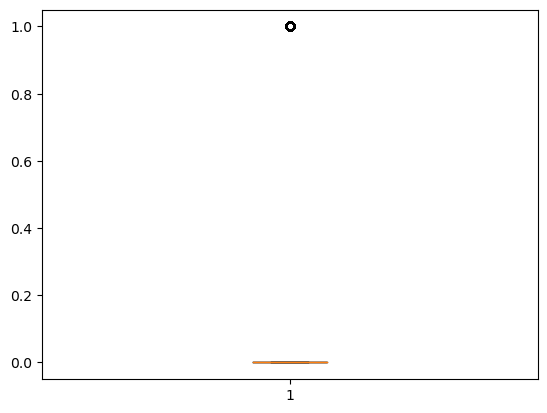

In [379]:
plt.boxplot('mobile_site_booking',data = travel_type_3)
plt.show()

In [380]:
Q1 = travel_type_3['mobile_site_booking'].quantile(0.25)

Q3 = travel_type_3['mobile_site_booking'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 0.0 | IQR: 0.0 | LL: 0.0 | UL: 0.0


In [381]:
ul_outlier_count = travel_type_3[travel_type_3['mobile_site_booking'] > UL].shape[0]
ll_outlier_count = travel_type_3[travel_type_3['mobile_site_booking'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_3.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 199 | LL_OC: 0 | T_OC: 199 | T_OP: 2.6357615894039736


In [382]:
mobile_site_booking3_ul = travel_type_3.loc[travel_type_3['mobile_site_booking'] > UL].shape[0]

In [383]:
print(travel_type_3['mobile_site_booking'].quantile(0.90))

0.0


In [384]:
travel_type_3['mobile_site_booking'] = np.where(travel_type_3['mobile_site_booking'] > 0, 0,travel_type_3['mobile_site_booking'])

In [385]:
index = travel_type_3[(travel_type_3['mobile_site_booking'] > 0)].index
travel_type_3.drop(index , inplace = True)

In [386]:
travel_type_3.mobile_site_booking.describe()

count    7550.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: mobile_site_booking, dtype: float64

#### Treatment of Outliers for 'time_diff'

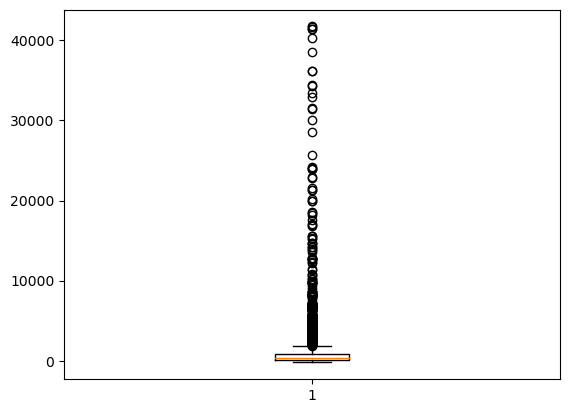

In [387]:
plt.boxplot('time_diff',data = travel_type_3) 
plt.show()

In [388]:
Q1 = travel_type_3['time_diff'].quantile(0.25)

Q3 = travel_type_3['time_diff'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 115.25 | Q3: 826.0 | IQR: 710.75 | LL: -950.875 | UL: 1892.125


In [389]:
ul_outlier_count = travel_type_3[travel_type_3['time_diff'] > UL].shape[0]
ll_outlier_count = travel_type_3[travel_type_3['time_diff'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / travel_type_3.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 612 | LL_OC: 0 | T_OC: 612 | T_OP: 8.105960264900663


In [390]:
time_diff3_ul = travel_type_3.loc[travel_type_3['time_diff'] > UL].shape[0]

In [391]:
print(travel_type_3['time_diff'].quantile(0.90))

1437.1000000000004


In [392]:
travel_type_3['time_diff'] = np.where(travel_type_3['time_diff'] > 1437.1, 1437.1,travel_type_3['time_diff'])

In [393]:
index = travel_type_3[(travel_type_3['time_diff'] > 1437.1)].index
travel_type_3.drop(index , inplace = True)

In [394]:
travel_type_3.time_diff.describe()

count    7550.000000
mean      518.909073
std       464.796370
min      -213.000000
25%       115.250000
50%       351.500000
75%       826.000000
max      1437.100000
Name: time_diff, dtype: float64

In [395]:
# package_id_ul
# travel_type_3 are the dataframes where we use predective modelling

### ML Model for 'package_id_ul'

In [396]:
package_id_ul

package_id  online_booking  mobile_site_booking  from_date_month  \
25253         4.0               0                    0                7   
25520         4.0               0                    0                8   
25676         4.0               0                    0                8   
25691         4.0               1                    0                8   
25715         4.0               0                    0                8   
...           ...             ...                  ...              ...   
43405         4.0               0                    0               11   
43409         4.0               0                    0               11   
43410         4.0               0                    0               11   
43411         4.0               0                    1               11   
43417         4.0               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
25253                  2               7                 0   
25520                  3              11                 0   
25676                  4              10                 0   
25691                  4               7                45   
25715                  4              15                 0   
...                  ...             ...               ...   
43405                  6              14                 0   
43409                  6              14                 0   
43410                  6              14                 0   
43411                  6              14                15   
43417                  6              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
25253                      7                        1                    19   
25520                      8                        3                    10   
25676                      8                        3                    16   
25691                      8                        3                    18   
25715                      8                        3                    21   
...                      ...                      ...                   ...   
43405                     11                        6                    10   
43409                     11                        6                    11   
43410                     11                        6                    11   
43411                     11                        6                    12   
43417                     11                        6                    13   

       booking_created_minute  time_diff  from_date_session  \
25253                      21      699.0                  4   
25520                       7       53.0                  4   
25676                      38     1042.0                  4   
25691                      59      766.0                  4   
25715                       9     1071.0                  4   
...                       ...        ...                ...   
43405                      56      184.0                  4   
43409                      44      136.0                  4   
43410                      46      134.0                  4   
43411                       9      126.0                  4   
43417                       6      114.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  \
25253                        4                  0                        0   
25520                        4                  0                        0   
25676                        4                  0                        0   
25691                        4                  0                        0   
25715                        4                  0                        0   
...                        ...                ...                      ...   
43405                        4                  0                        0   
43409                        4 

In [397]:
r = package_id_ul.iloc[:,0:16]
r

package_id  online_booking  mobile_site_booking  from_date_month  \
25253         4.0               0                    0                7   
25520         4.0               0                    0                8   
25676         4.0               0                    0                8   
25691         4.0               1                    0                8   
25715         4.0               0                    0                8   
...           ...             ...                  ...              ...   
43405         4.0               0                    0               11   
43409         4.0               0                    0               11   
43410         4.0               0                    0               11   
43411         4.0               0                    1               11   
43417         4.0               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
25253                  2               7                 0   
25520                  3              11                 0   
25676                  4              10                 0   
25691                  4               7                45   
25715                  4              15                 0   
...                  ...             ...               ...   
43405                  6              14                 0   
43409                  6              14                 0   
43410                  6              14                 0   
43411                  6              14                15   
43417                  6              15                 0   

       booking_created_month  booking_created_weekday  booking_created_hour  \
25253                      7                        1                    19   
25520                      8                        3                    10   
25676                      8                        3                    16   
25691                      8                        3                    18   
25715                      8                        3                    21   
...                      ...                      ...                   ...   
43405                     11                        6                    10   
43409                     11                        6                    11   
43410                     11                        6                    11   
43411                     11                        6                    12   
43417                     11                        6                    13   

       booking_created_minute  time_diff  from_date_session  \
25253                      21      699.0                  4   
25520                       7       53.0                  4   
25676                      38     1042.0                  4   
25691                      59      766.0                  4   
25715                       9     1071.0                  4   
...                       ...        ...                ...   
43405                      56      184.0                  4   
43409                      44      136.0                  4   
43410                      46      134.0                  4   
43411                       9      126.0                  4   
43417                       6      114.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
25253                        4                  0                        0  
25520                        4                  0                        0  
25676                        4                  0                        0  
25691                        4                  0                        0  
25715                        4                  0                        0  
...                        ...                ...                      ...  
43405                        4                  0                        0  
43409                        4         

In [398]:
s = package_id_ul.iloc[:,16]
s.head()

25253    0
25520    0
25676    0
25691    0
25715    0
Name: Car_Cancellation, dtype: int64

In [399]:
r_train,r_test,s_train,s_test = train_test_split(r,s,train_size = 0.7,random_state = 55)

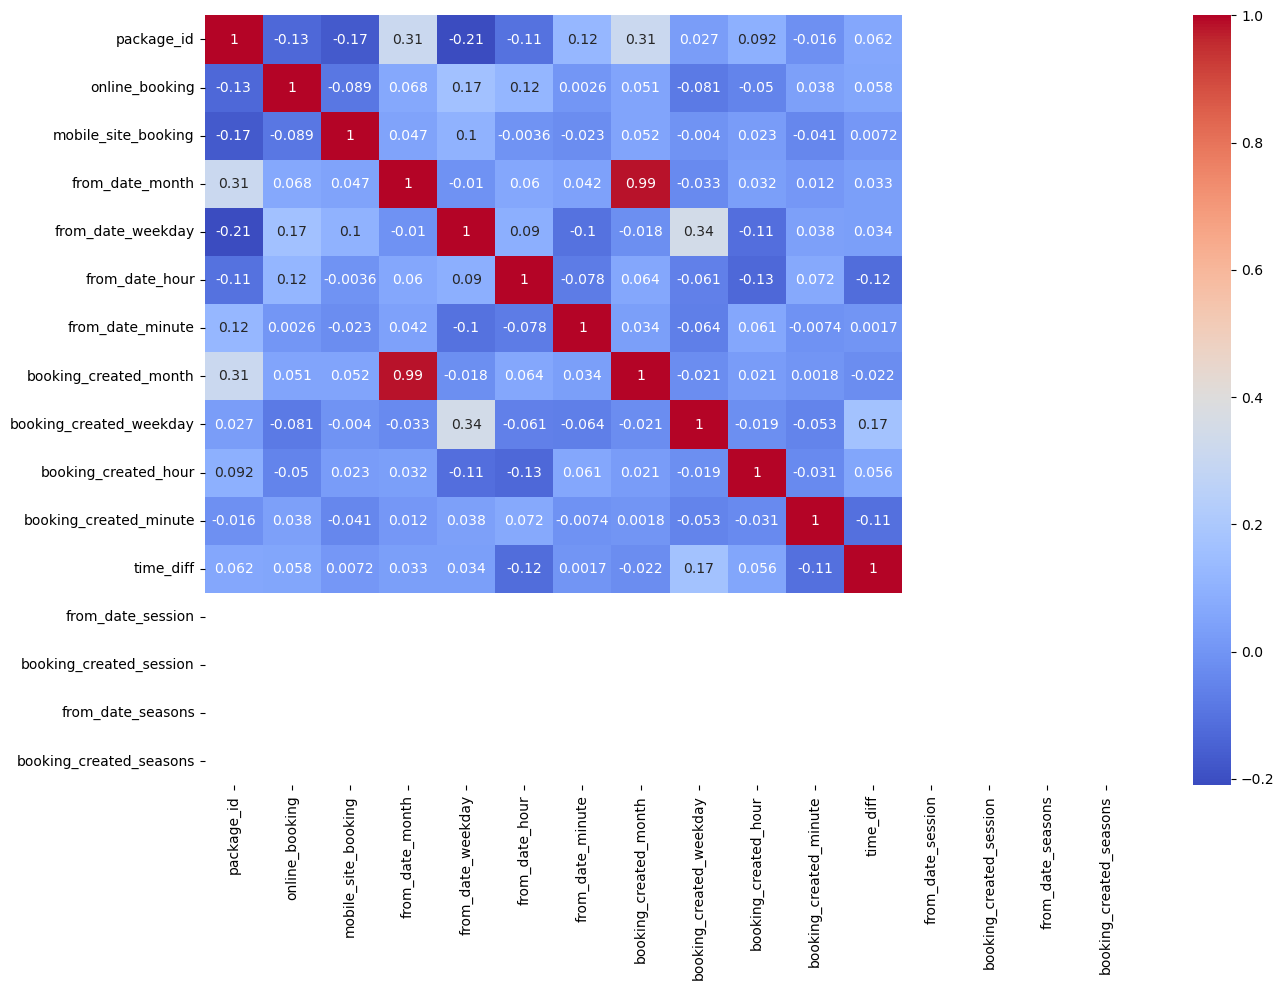

In [400]:
plt.figure(figsize = (15,10))
sns.heatmap(r_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [401]:
r_train = r_train.drop(['booking_created_month', 'from_date_session', 'booking_created_session', 'from_date_seasons', 'booking_created_seasons'],axis = 1)

In [402]:
r_train

package_id  online_booking  mobile_site_booking  from_date_month  \
37130         6.0               0                    0               10   
30071         4.0               1                    0                8   
41280         6.0               0                    0               11   
25520         4.0               0                    0                8   
43405         4.0               0                    0               11   
...           ...             ...                  ...              ...   
41282         6.0               0                    0               11   
42689         6.0               0                    0               11   
33358         4.0               0                    1                9   
38100         6.0               0                    0               10   
34822         7.0               0                    0                9   

       from_date_weekday  from_date_hour  from_date_minute  \
37130                  3               9                15   
30071                  1              13                 0   
41280                  2               7                45   
25520                  3              11                 0   
43405                  6              14                 0   
...                  ...             ...               ...   
41282                  2               8                15   
42689                  0               8                30   
33358                  6              11                 0   
38100                  2              17                30   
34822                  3               9                 0   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
37130                        2                    22                      56   
30071                        0                    23                      33   
41280                        1                    22                      19   
25520                        3                    10                       7   
43405                        6                    10                      56   
...                        ...                   ...                     ...   
41282                        1                    22                      27   
42689                        6                    21                      46   
33358                        5                    19                      49   
38100                        2                    11                      47   
34822                        2                    10                       8   

       time_diff  
37130      619.0  
30071      807.0  
41280      566.0  
25520       53.0  
43405      184.0  
...          ...  
41282      588.0  
42689      644.0  
33358      911.0  
38100      343.0  
34822     1372.0  

[714 rows x 11 columns]

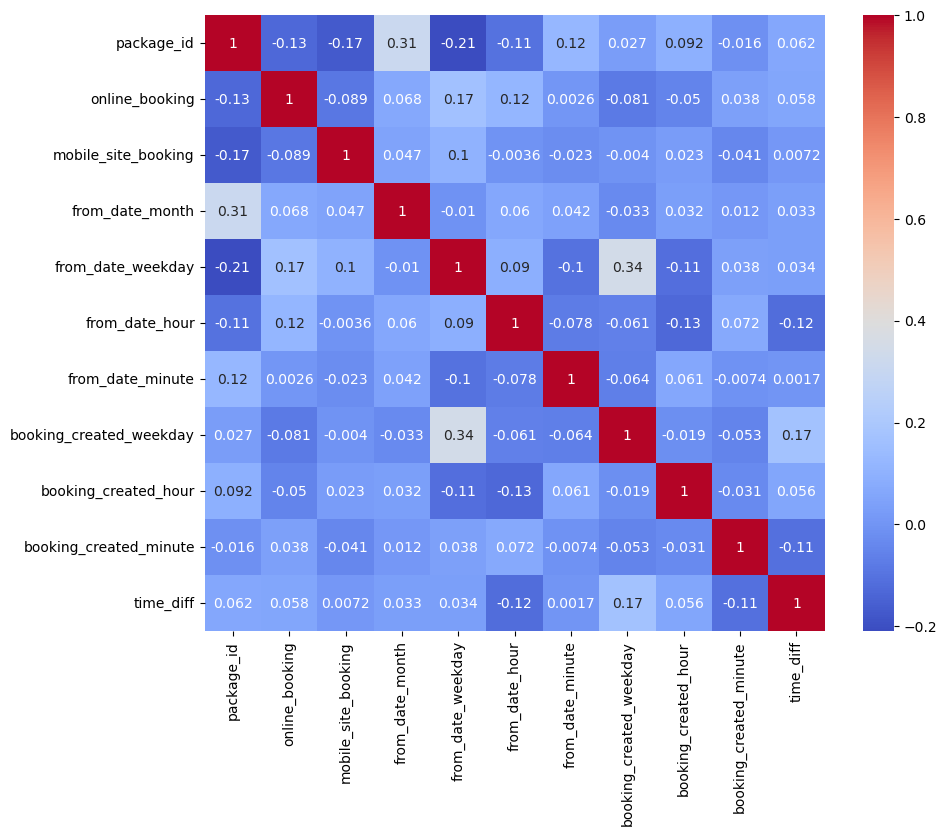

In [403]:
plt.figure(figsize = (10,8))
sns.heatmap(r_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [404]:
r_test = r_test.drop(['booking_created_month', 'from_date_session', 'booking_created_session', 'from_date_seasons', 'booking_created_seasons'],axis = 1)
r_test.head()

package_id  online_booking  mobile_site_booking  from_date_month  \
34532         6.0               0                    0                9   
34317         4.0               0                    0                9   
34538         6.0               0                    0                9   
38750         6.0               0                    0               10   
36653         6.0               0                    0               10   

       from_date_weekday  from_date_hour  from_date_minute  \
34532                  4               7                30   
34317                  5              13                 0   
34538                  1               8                 0   
38750                  2               7                30   
36653                  0               8                45   

       booking_created_weekday  booking_created_hour  booking_created_minute  \
34532                        6                    19                      28   
34317                        5                    10                      46   
34538                        6                    19                      32   
38750                        6                    15                       9   
36653                        0                     1                       7   

       time_diff  
34532     6482.0  
34317      134.0  
34538     2188.0  
38750     3861.0  
36653      458.0

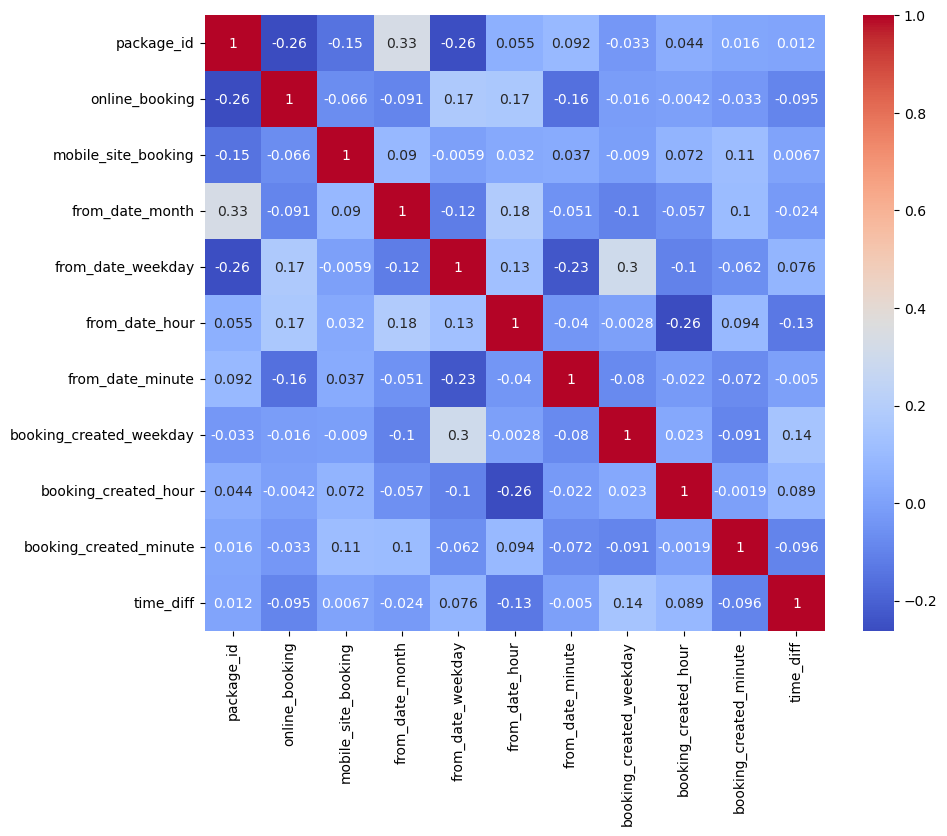

In [405]:
plt.figure(figsize = (10,8))
sns.heatmap(r_test.corr(),annot = True, cmap = 'coolwarm')
plt.show()

### KNN

In [406]:
ss = StandardScaler()
r_train = ss.fit_transform(r_train)
r_test = ss.transform(r_test)

In [407]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
knn = model_knn.fit(r_train, s_train)
#prediction
pred_knn = model_knn.predict(r_test)
pred_knn_train = model_knn.predict(r_train)
# evaluation
print('For test')
print(classification_report(s_test, pred_knn))
print('For train')
print(classification_report(s_train, pred_knn_train))

For test
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       277
           1       0.35      0.23      0.28        30

    accuracy                           0.88       307
   macro avg       0.63      0.59      0.61       307
weighted avg       0.86      0.88      0.87       307

For train
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       665
           1       0.71      0.41      0.52        49

    accuracy                           0.95       714
   macro avg       0.84      0.70      0.75       714
weighted avg       0.94      0.95      0.94       714



### Decision Tree

In [408]:
classifier = DecisionTreeClassifier(random_state = 55, max_depth = 13,
                                   criterion = 'gini',max_leaf_nodes = 25,
                                  min_samples_split = 10)

dt = classifier.fit(r_train,s_train)
s_pred = classifier.predict(r_test)
s_pred_train = classifier.predict(r_train)

print(classification_report(s_test,s_pred))
print(classification_report(s_train,s_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.20      0.07      0.10        30

    accuracy                           0.88       307
   macro avg       0.55      0.52      0.52       307
weighted avg       0.84      0.88      0.86       307

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       665
           1       0.77      0.49      0.60        49

    accuracy                           0.96       714
   macro avg       0.87      0.74      0.79       714
weighted avg       0.95      0.96      0.95       714



### Logistic Regression

In [409]:
classifier = LogisticRegression()
lr = classifier.fit(r_train,s_train)
s_pred = classifier.predict(r_test)
s_pred_train = classifier.predict(r_train)

print(classification_report(s_test,s_pred))
print(classification_report(s_train,s_pred_train))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       277
           1       0.00      0.00      0.00        30

    accuracy                           0.90       307
   macro avg       0.45      0.50      0.47       307
weighted avg       0.81      0.90      0.85       307

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       665
           1       0.00      0.00      0.00        49

    accuracy                           0.93       714
   macro avg       0.47      0.50      0.48       714
weighted avg       0.87      0.93      0.90       714



#### Confusion Matrix

In [410]:
conf_matrix = metrics.confusion_matrix(s_test,s_pred)
conf_matrix

array([[276,   1],
       [ 30,   0]], dtype=int64)

<Axes: >

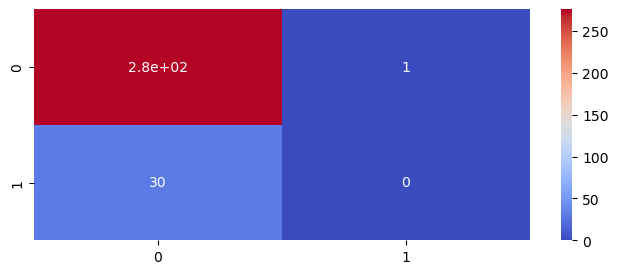

In [411]:
fig, ax = plt.subplots(figsize = (8,3))
sns.heatmap(conf_matrix, annot = True, ax = ax, cmap = 'coolwarm')

#### ROC AUC Curve

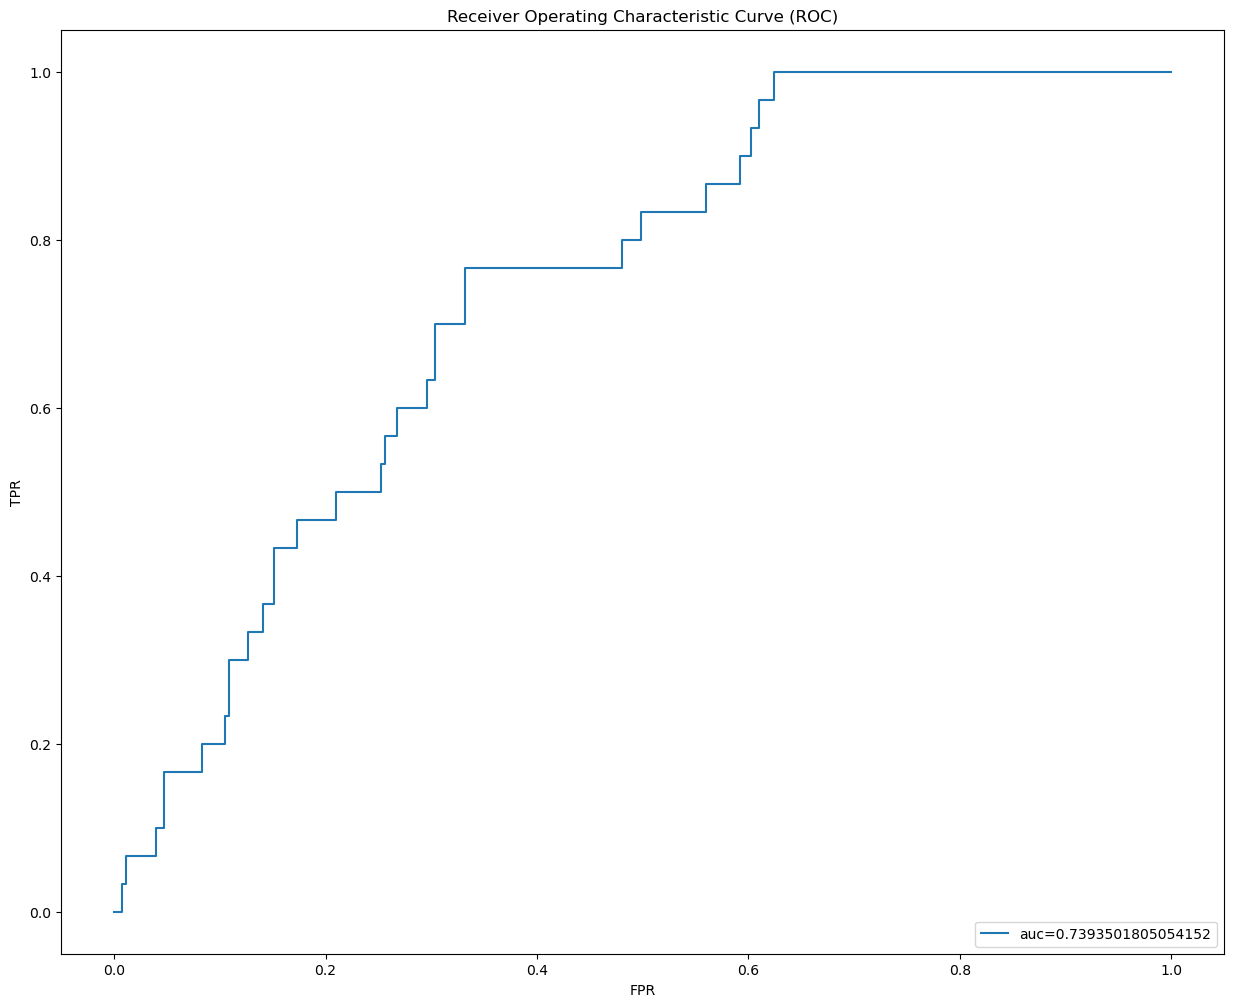

In [412]:
s_pred_proba = lr.predict_proba(r_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(s_test,  s_pred_proba)
auc = metrics.roc_auc_score(s_test, s_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways

* Both the models KN-Classifier and Decision Tree Classifier are working in a good way with good accuracies and F1-scores
* Whereas Logistic Regression's performance metrics don't seem good while compared to the other two model's performance. The ROC-AUC curve is also 0.73 only. Slightly better would have been good

## ML Model for 'travel_type_3'

In [413]:
travel_type_3.head()

package_id  online_booking  mobile_site_booking  from_date_month  \
8          2.0               0                    0                1   
20         2.0               0                    0                1   
23         1.0               0                    0                1   
34         1.0               1                    0                1   
47         2.0               0                    0                1   

    from_date_weekday  from_date_hour  from_date_minute  \
8                   1              16                 0   
20                  1              14                30   
23                  1              16                30   
34                  1              20                 0   
47                  2               3                 0   

    booking_created_month  booking_created_weekday  booking_created_hour  \
8                       1                        1                     9   
20                      1                        1                    12   
23                      1                        1                    14   
34                      1                        1                    17   
47                      1                        1                    19   

    booking_created_minute  time_diff  from_date_session  \
8                       44      376.0                  4   
20                      52       98.0                  4   
23                      39      111.0                  4   
34                      25      155.0                  4   
47                      37      443.0                  4   

    booking_created_session  from_date_seasons  booking_created_seasons  \
8                         4                  0                        0   
20                        4                  0                        0   
23                        4                  0                        0   
34                        4                  0                        0   
47                        4                  0                        0   

    Car_Cancellation  
8                  0  
20                 0  
23                 0  
34                 0  
47                 0

In [414]:
x3 = travel_type_3.iloc[:,0:16]
x3

package_id  online_booking  mobile_site_booking  from_date_month  \
8             2.0               0                    0                1   
20            2.0               0                    0                1   
23            1.0               0                    0                1   
34            1.0               1                    0                1   
47            2.0               0                    0                1   
...           ...             ...                  ...              ...   
43415         1.0               0                    0               11   
43417         4.0               0                    0               11   
43420         2.0               1                    0               11   
43424         2.0               0                    0               11   
43428         1.0               0                    0               11   

       from_date_weekday  from_date_hour  from_date_minute  \
8                      1              16                 0   
20                     1              14                30   
23                     1              16                30   
34                     1              20                 0   
47                     2               3                 0   
...                  ...             ...               ...   
43415                  6              16                 0   
43417                  6              15                 0   
43420                  0               1                 0   
43424                  6              15                15   
43428                  6              18                30   

       booking_created_month  booking_created_weekday  booking_created_hour  \
8                          1                        1                     9   
20                         1                        1                    12   
23                         1                        1                    14   
34                         1                        1                    17   
47                         1                        1                    19   
...                      ...                      ...                   ...   
43415                     11                        6                    12   
43417                     11                        6                    13   
43420                     11                        6                    13   
43424                     11                        6                    14   
43428                     11                        6                    14   

       booking_created_minute  time_diff  from_date_session  \
8                          44      376.0                  4   
20                         52       98.0                  4   
23                         39      111.0                  4   
34                         25      155.0                  4   
47                         37      443.0                  4   
...                       ...        ...                ...   
43415                      32      208.0                  4   
43417                       6      114.0                  4   
43420                      54      666.0                  4   
43424                      23       52.0                  4   
43428                      35      235.0                  4   

       booking_created_session  from_date_seasons  booking_created_seasons  
8                            4                  0                        0  
20                           4                  0                        0  
23                           4                  0                        0  
34                           4                  0                        0  
47                           4                  0                        0  
...                        ...                ...                      ...  
43415                        4                  0                        0  
43417                        4         

In [415]:
y3 = travel_type_3.iloc[:,16]
y3.head()

8     0
20    0
23    0
34    0
47    0
Name: Car_Cancellation, dtype: int64

In [416]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,train_size = 0.7,random_state = 75)

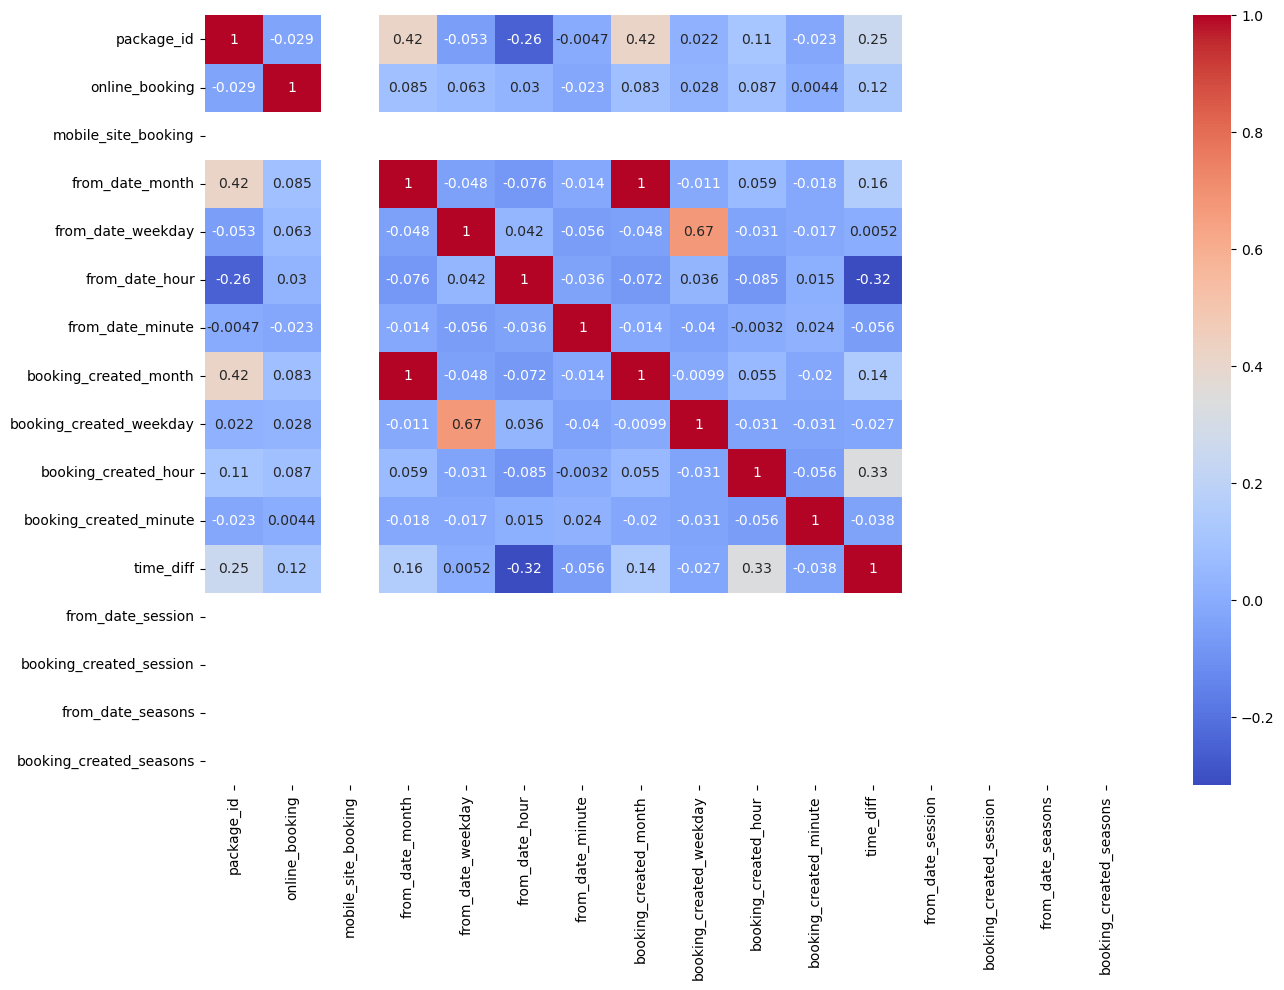

In [417]:
plt.figure(figsize = (15,10))
sns.heatmap(x3_train.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [418]:
x3_train = x3_train.drop(['mobile_site_booking','booking_created_weekday','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)

In [419]:
x3_train.head()

package_id  online_booking  from_date_month  from_date_weekday  \
13065         1.0               1                5                  5   
7076          2.0               1                3                  4   
21607         1.0               0                7                  6   
21263         1.0               0                7                  5   
37638         2.0               1               10                  6   

       from_date_hour  from_date_minute  booking_created_month  \
13065              10                45                      5   
7076               12                15                      3   
21607              13                30                      7   
21263               9                 0                      7   
37638              12                 0                     10   

       booking_created_hour  booking_created_minute  time_diff  
13065                    21                      51      774.0  
7076                     10                      46       89.0  
21607                     9                       4      266.0  
21263                     8                      26       34.0  
37638                    22                      46      794.0

In [420]:
x3_test = x3_test.drop(['mobile_site_booking','booking_created_weekday','from_date_session','booking_created_session','from_date_seasons','booking_created_seasons'],axis = 1)

In [421]:
x3_test.head()

package_id  online_booking  from_date_month  from_date_weekday  \
12885         2.0               1                5                  5   
15880         1.0               0                5                  4   
21928         1.0               0                7                  1   
14226         2.0               0                5                  6   
16386         1.0               0                6                  6   

       from_date_hour  from_date_minute  booking_created_month  \
12885               7                15                      5   
15880               9                 0                      5   
21928              14                30                      7   
14226              10                 0                      5   
16386              11                 0                      6   

       booking_created_hour  booking_created_minute  time_diff  
12885                    21                      46     1437.1  
15880                    21                      57      663.0  
21928                    13                      42       48.0  
14226                    21                      22      758.0  
16386                    10                       1       59.0

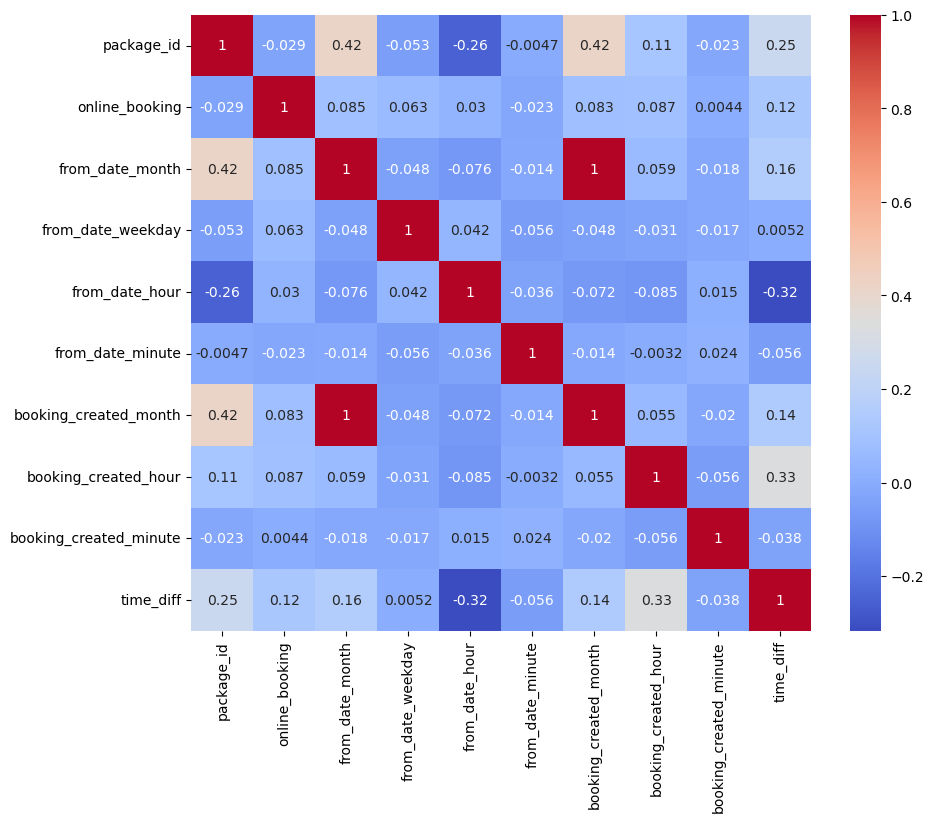

In [422]:
plt.figure(figsize = (10,8))
sns.heatmap(x3_train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [423]:
x3_train = x3_train.drop(['booking_created_month'],axis = 1)
x3_train.head()

package_id  online_booking  from_date_month  from_date_weekday  \
13065         1.0               1                5                  5   
7076          2.0               1                3                  4   
21607         1.0               0                7                  6   
21263         1.0               0                7                  5   
37638         2.0               1               10                  6   

       from_date_hour  from_date_minute  booking_created_hour  \
13065              10                45                    21   
7076               12                15                    10   
21607              13                30                     9   
21263               9                 0                     8   
37638              12                 0                    22   

       booking_created_minute  time_diff  
13065                      51      774.0  
7076                       46       89.0  
21607                       4      266.0  
21263                      26       34.0  
37638                      46      794.0

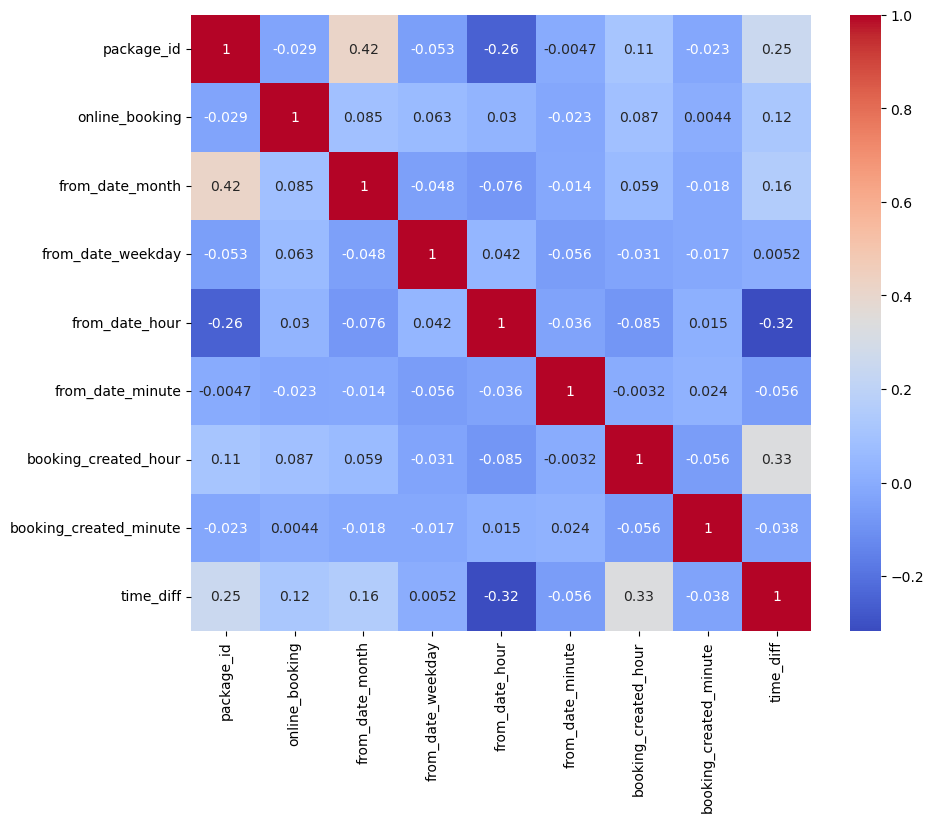

In [424]:
plt.figure(figsize = (10,8))
sns.heatmap(x3_train.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [425]:
x3_test = x3_test.drop(['booking_created_month'],axis = 1)
x3_test.head()

package_id  online_booking  from_date_month  from_date_weekday  \
12885         2.0               1                5                  5   
15880         1.0               0                5                  4   
21928         1.0               0                7                  1   
14226         2.0               0                5                  6   
16386         1.0               0                6                  6   

       from_date_hour  from_date_minute  booking_created_hour  \
12885               7                15                    21   
15880               9                 0                    21   
21928              14                30                    13   
14226              10                 0                    21   
16386              11                 0                    10   

       booking_created_minute  time_diff  
12885                      46     1437.1  
15880                      57      663.0  
21928                      42       48.0  
14226                      22      758.0  
16386                       1       59.0

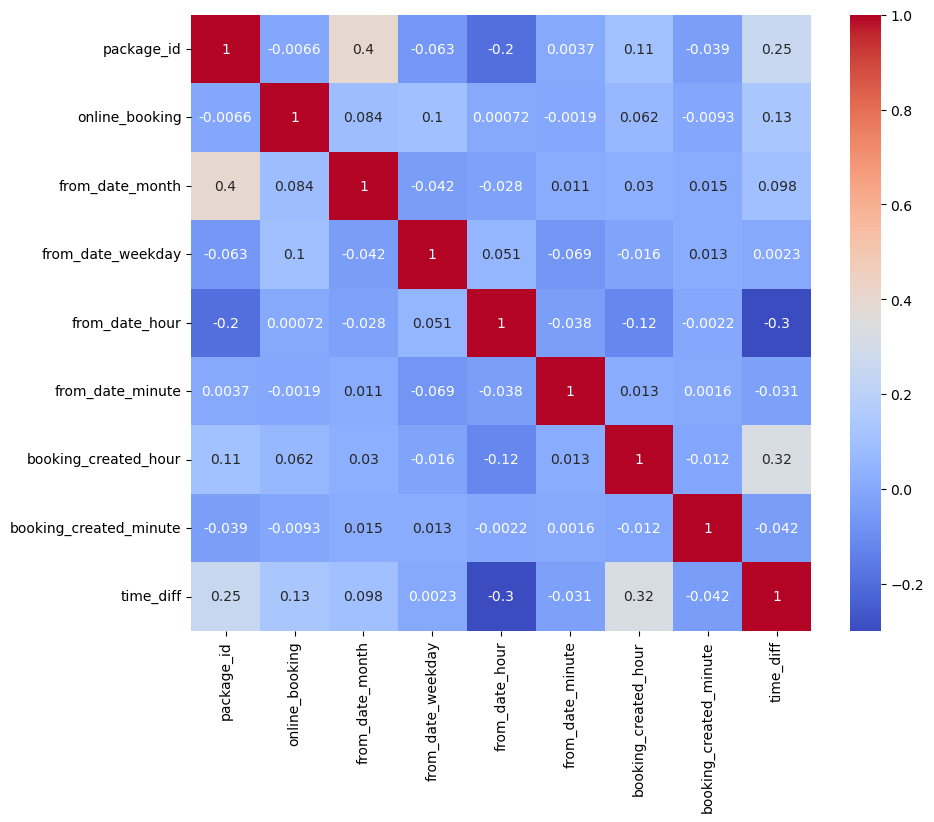

In [426]:
plt.figure(figsize = (10,8))
sns.heatmap(x3_test.corr(),annot = True,cmap = 'coolwarm')
plt.show()

### Logistic Regression

In [427]:
ss = StandardScaler()
x3_train = ss.fit_transform(x3_train)
x3_test = ss.transform(x3_test)

In [428]:
classifier = LogisticRegression()
lr = classifier.fit(x3_train,y3_train)
y3_pred = classifier.predict(x3_test)
y3_pred_train = classifier.predict(x3_train)

#### Classification Report

In [429]:
print(classification_report(y3_train,y3_pred_train))
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5054
           1       1.00      0.00      0.01       231

    accuracy                           0.96      5285
   macro avg       0.98      0.50      0.49      5285
weighted avg       0.96      0.96      0.94      5285

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2160
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2265
   macro avg       0.48      0.50      0.49      2265
weighted avg       0.91      0.95      0.93      2265



#### Confusion Matrix

In [430]:
conf_matrix = metrics.confusion_matrix(y3_test,y3_pred)
conf_matrix

array([[2160,    0],
       [ 105,    0]], dtype=int64)

<Axes: >

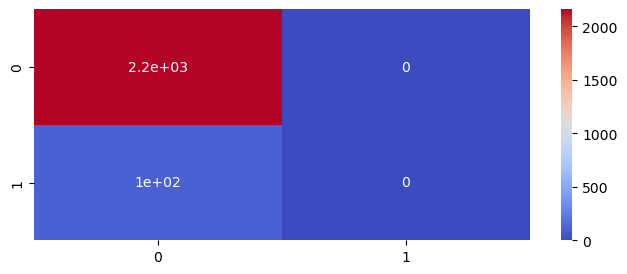

In [431]:
fig, ax = plt.subplots(figsize = (8,3))
sns.heatmap(conf_matrix, annot = True, ax = ax, cmap = 'coolwarm')

#### ROC AUC Curve

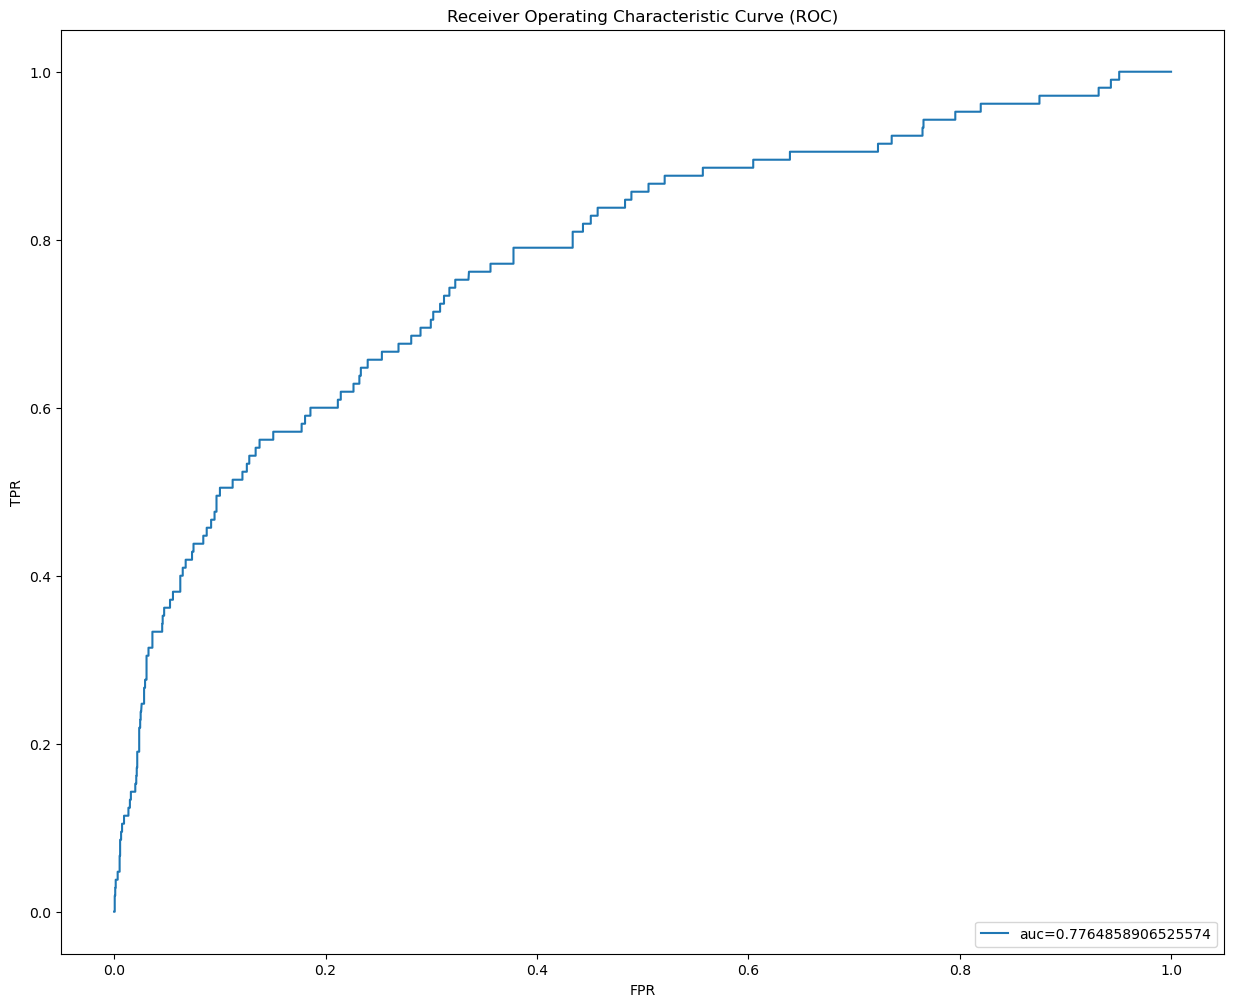

In [432]:
y3_pred_proba = lr.predict_proba(x3_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y3_test,  y3_pred_proba)
auc = metrics.roc_auc_score(y3_test, y3_pred_proba)
plt.figure(figsize = (15,12))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.77** which is considered to be okay for prediction overall.

### KNN

In [433]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x3_train,y3_train)
y3_pred = knn.predict(x3_test)

#### Confusion Matrix

In [434]:
print(confusion_matrix(y3_test,y3_pred))

[[2137   23]
 [  90   15]]


#### Classification Report

In [435]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2160
           1       0.39      0.14      0.21       105

    accuracy                           0.95      2265
   macro avg       0.68      0.57      0.59      2265
weighted avg       0.93      0.95      0.94      2265



#### ROC AUC Curve

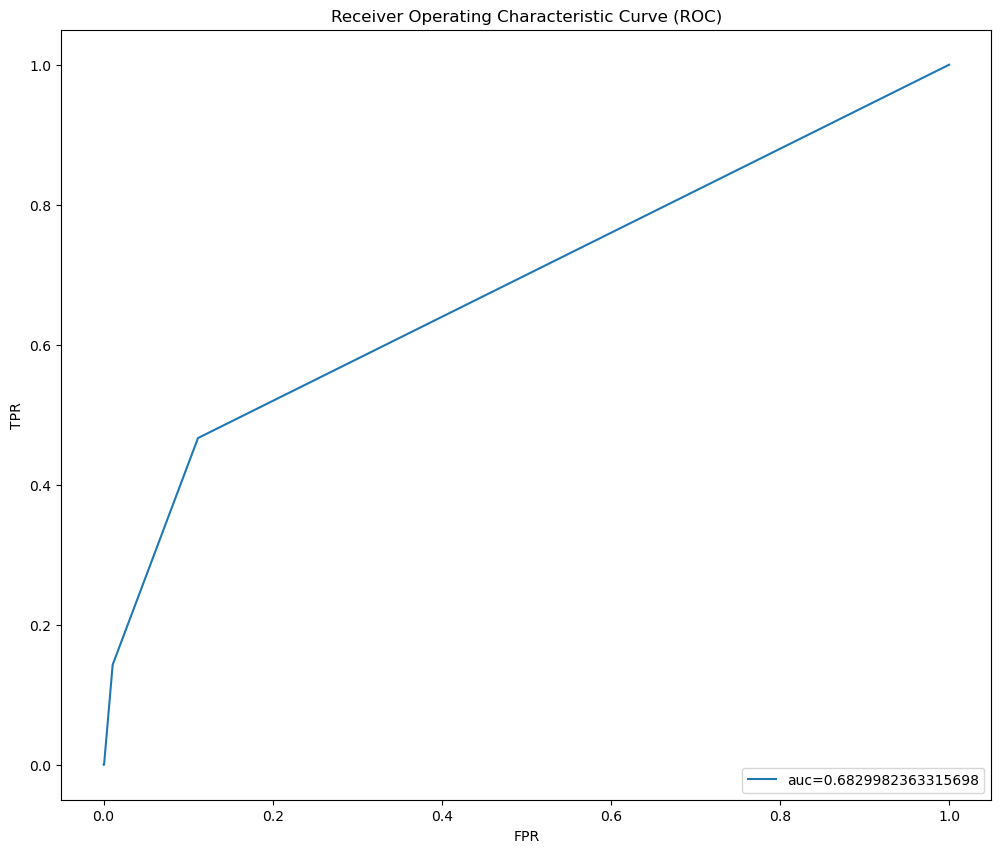

In [436]:
y3_pred_proba = knn.predict_proba(x3_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y3_test,  y3_pred_proba)
auc = metrics.roc_auc_score(y3_test, y3_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Choosing a K value

In [437]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x3,y3,cv = 10)
    accuracy_rate.append(score.mean())

In [438]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,x3,y3,cv = 10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

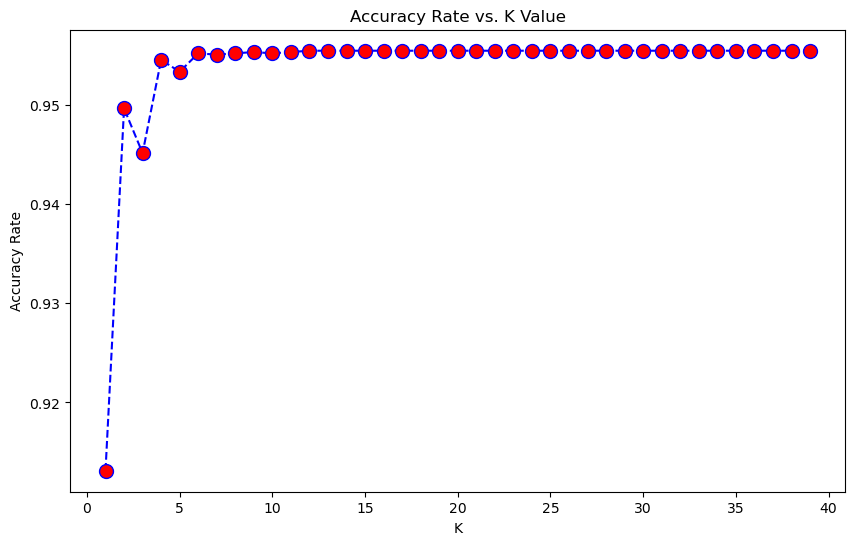

In [439]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

* Here we can see that that after around K > 5 the error rate just tends to very small. Let's retrain the model with that and check the classification report.
* Also, in case of Accuracy, after around K > 5, the accuracy is also almost contant.

#### Classification Report with K = 1

In [440]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x3_train,y3_train)
pred = knn.predict(x3_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y3_test,pred))
print('\n')
print(classification_report(y3_test,pred))

WITH K=1


[[2072   88]
 [  77   28]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2160
           1       0.24      0.27      0.25       105

    accuracy                           0.93      2265
   macro avg       0.60      0.61      0.61      2265
weighted avg       0.93      0.93      0.93      2265



#### Classification Report with K = 5

In [441]:
# NOW WITH K = 5. 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x3_train,y3_train)
pred = knn.predict(x3_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y3_test,pred))
print('\n')
print(classification_report(y3_test,pred))

WITH K=5


[[2154    6]
 [  97    8]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2160
           1       0.57      0.08      0.13       105

    accuracy                           0.95      2265
   macro avg       0.76      0.54      0.56      2265
weighted avg       0.94      0.95      0.94      2265



#### Takeaways

* Here we used the KNeighbour Classifier for predective modelling as it can handle large datasets
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Naive Bayes

In [492]:
model = GaussianNB()
model.fit(x3_train, y3_train)

GaussianNB()

In [443]:
y3_pred = model.predict(x3_test)
y3_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Confusion Matrix

In [444]:
conf_matrix = confusion_matrix(y3_test,y3_pred)
conf_matrix

array([[2128,   32],
       [  97,    8]], dtype=int64)

#### Accuracy, Precision, Recall

In [445]:
Accuracy = metrics.accuracy_score(y3_test,y3_pred)
Precision = metrics.precision_score(y3_test,y3_pred)
Recall = metrics.recall_score(y3_test,y3_pred)
print('Accuracy = {}, Precision = {}, Recall = {}'.format(Accuracy,Precision,Recall))

Accuracy = 0.9430463576158941, Precision = 0.2, Recall = 0.0761904761904762


#### ROC AUC Curve

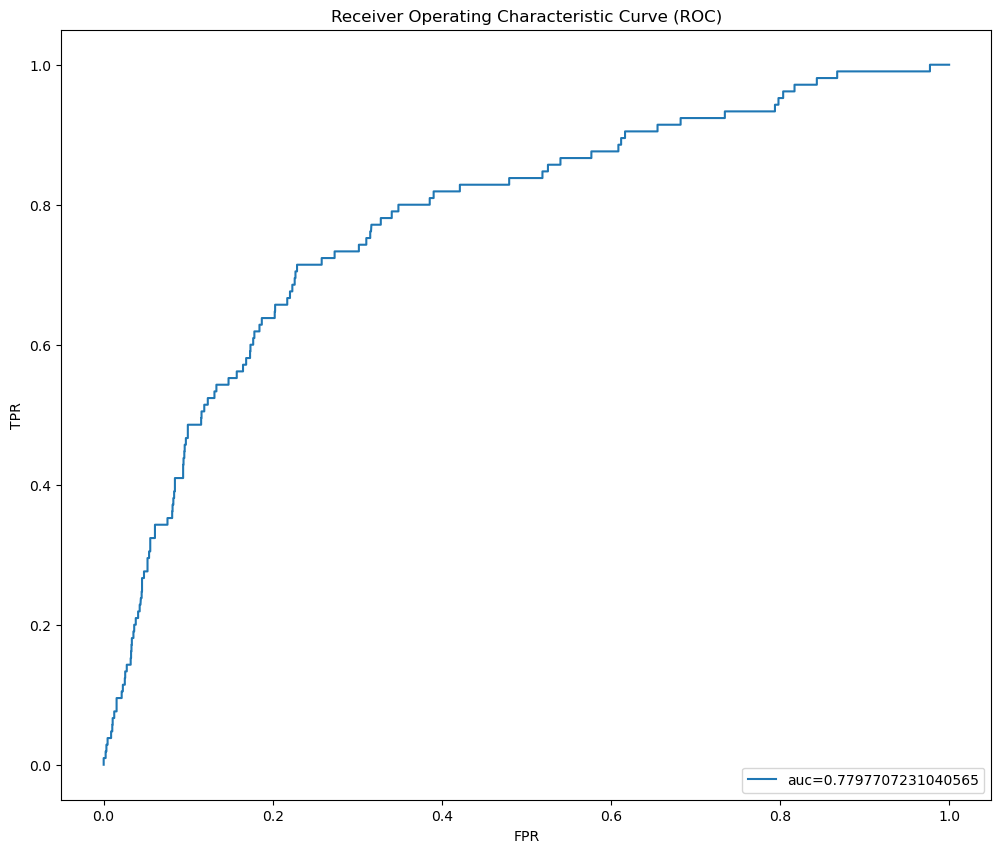

In [446]:
y3_pred_proba = model.predict_proba(x3_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y3_test,  y3_pred_proba)
auc = metrics.roc_auc_score(y3_test, y3_pred_proba)
plt.figure(figsize = (12,10))
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.77** which is considered to be okay for prediction overall.

### Decision Tree

#### Decision Tree with Gini

#### Decision Tree Depth - 2

In [447]:
model1 = DecisionTreeClassifier(random_state = 1,max_depth = 2)
model1.fit(x3_train,y3_train)
model1_score_train = model1.score(x3_train,y3_train)
model1_score_test = model1.score(x3_test,y3_test)
print('Training Score',model1_score_train)
print('Testing Score',model1_score_test)

Training Score 0.9562913907284768
Testing Score 0.9536423841059603


#### Performance metrices

In [448]:
from sklearn.metrics import auc
y3_pred = model1.predict_proba(x3_test)[:,1]
fpr,tpr,_= roc_curve(y3_test,y3_pred)
roc_auc = auc(fpr,tpr)

#### Area Under the Curve

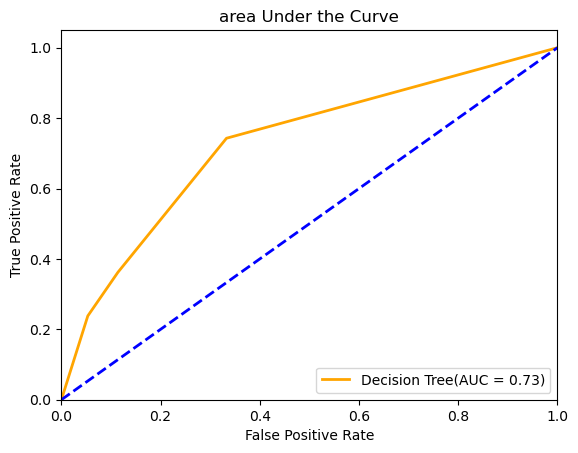

In [449]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle ='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [450]:
y3_pred = model1.predict(x3_test)

#### Confusion Matrix

In [451]:
print(confusion_matrix(y3_test,y3_pred))

[[2160    0]
 [ 105    0]]


#### Classification Report

In [452]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2160
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2265
   macro avg       0.48      0.50      0.49      2265
weighted avg       0.91      0.95      0.93      2265



#### Decision Tree Depth - 20

In [453]:
model2 = DecisionTreeClassifier(random_state = 1,max_depth = 20)
model2.fit(x3_train,y3_train)
model2_score_train = model2.score(x3_train,y3_train)
model2_score_test = model2.score(x3_test,y3_test)
print('Training Score',model2_score_train)
print('Testing Score',model2_score_test)

Training Score 1.0
Testing Score 0.9209713024282561


#### Performace Metrices

In [454]:
y3_pred = model2.predict_proba(x3_test)[:,1]
fpr,tpr,_= roc_curve(y3_test,y3_pred)
roc_auc = auc(fpr,tpr)

#### Area Under the Curve

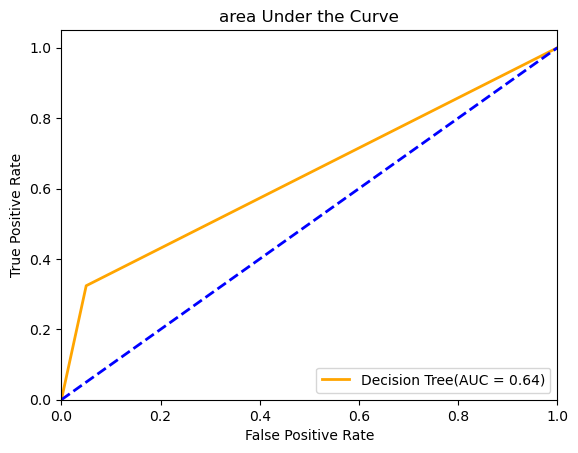

In [455]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color = 'orange',lw = lw,label = 'Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'blue',lw = lw,linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc = "lower right")
plt.show()

In [456]:
y3_pred = model2.predict(x3_test)

#### Confusion Matrix

In [457]:
print(confusion_matrix(y3_test,y3_pred))

[[2052  108]
 [  71   34]]


#### Classification Report

In [458]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2160
           1       0.24      0.32      0.28       105

    accuracy                           0.92      2265
   macro avg       0.60      0.64      0.62      2265
weighted avg       0.93      0.92      0.93      2265



#### Graphical Representation of tree

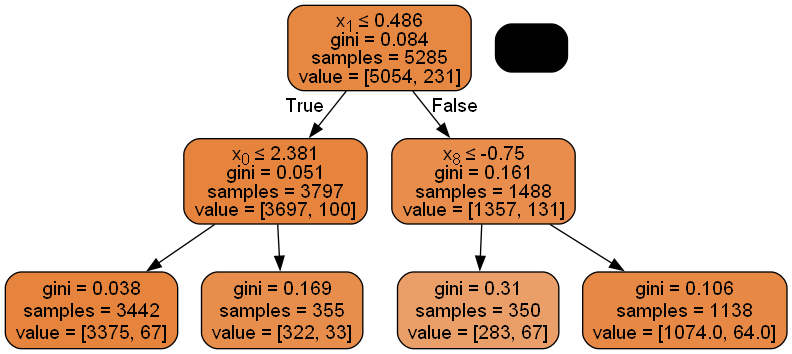

<Figure size 1000x800 with 0 Axes>

In [459]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
plt.figure(figsize = (10,8))
dot_data = StringIO()
export_graphviz(model1,out_file = dot_data,
               filled = True,rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Takeaways

* Here we used the Decision Tree for predective modelling
* While we used it , the results are suprisingly good with good accuracy and F1-scores

### Random Forest

In [460]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

In [461]:
rf = RandomForestClassifier(random_state = 40)

#### Hyperparameter Optimization Using GridSearchCV

In [462]:
np.random.seed(40)

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf,cv = 10,param_grid = param_dist,n_jobs = 3)

cv_rf.fit(x3_train,y3_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}


In [493]:
rf.set_params(criterion = 'gini',max_features = 'sqrt', max_depth = 2)

RandomForestClassifier(max_depth=2, random_state=40)

#### Training the Random Forest

In [494]:
rf.fit(x3_train,y3_train)

RandomForestClassifier(max_depth=2, random_state=40)

#### Prediction

In [465]:
y3_pred = rf.predict(x3_test)

#### Confusion Matrix

In [466]:
print(confusion_matrix(y3_test,y3_pred))

[[2160    0]
 [ 105    0]]


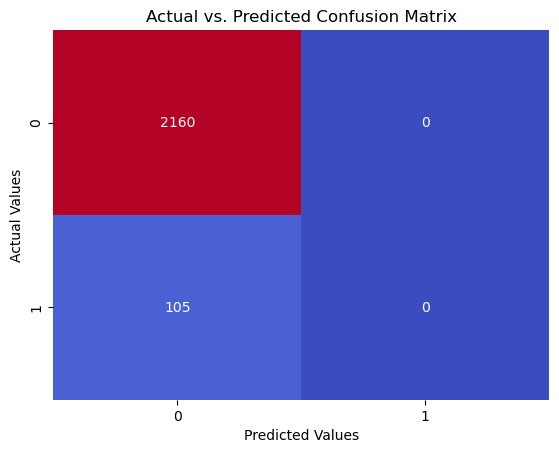

In [467]:
conf_mat = confusion_matrix(y3_test,y3_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, cmap = 'coolwarm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Classification Report

In [468]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2160
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2265
   macro avg       0.48      0.50      0.49      2265
weighted avg       0.91      0.95      0.93      2265



#### Accuracy

In [469]:
accuracy_rf = rf.score(x3_test,y3_test)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.95364


#### Error Rate

In [470]:
test_error_rate_rf = 1-accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)

error rate of our model is: 0.04636


#### Area Under the Curve

In [471]:
y3_prob = rf.predict_proba(x3_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y3_test, y3_prob, pos_label = 1)

In [472]:
auc_rf = auc(fpr2,tpr2)

In [473]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

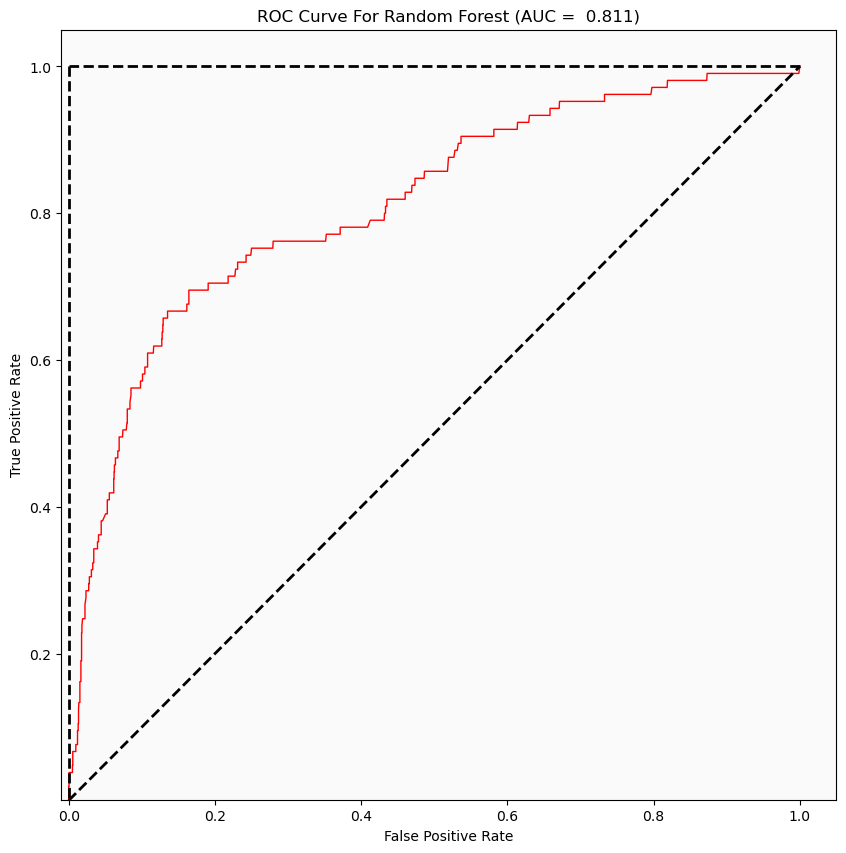

In [474]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be **0.81** which is considered to be good for prediction overall.

### SVM

In [475]:
svc = SVC()
svc.fit(x3_train,y3_train)
y3_pred = svc.predict(x3_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y3_test,y3_pred))

Accuracy Score:
0.9536423841059603


#### Linear Kernel

In [476]:
svc = SVC(kernel='linear')
svc.fit(x3_train,y3_train)
y3_pred = svc.predict(x3_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y3_test,y3_pred))

Accuracy Score:
0.9536423841059603


#### Polynomial Kernel

In [477]:
svc = SVC(kernel='poly')
svc.fit(x3_train,y3_train)
y3_pred = svc.predict(x3_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y3_test,y3_pred))

Accuracy Score:
0.9536423841059603


#### Confusion Matrix

In [478]:
print(confusion_matrix(y3_test,y3_pred))

[[2160    0]
 [ 105    0]]


Text(0.5, 23.52222222222222, 'Predicted label')

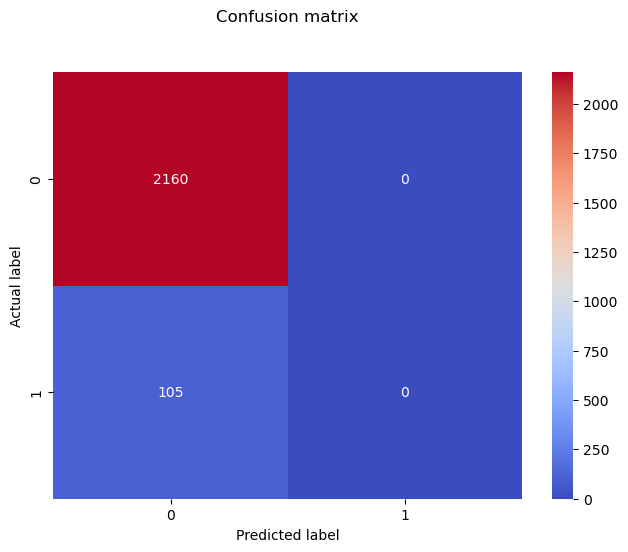

In [479]:
conf_mat = confusion_matrix(y3_test,y3_pred)
sns.heatmap(conf_mat, annot = True, cmap = "coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification Report

In [480]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2160
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2265
   macro avg       0.48      0.50      0.49      2265
weighted avg       0.91      0.95      0.93      2265



#### ROC AUC Curve

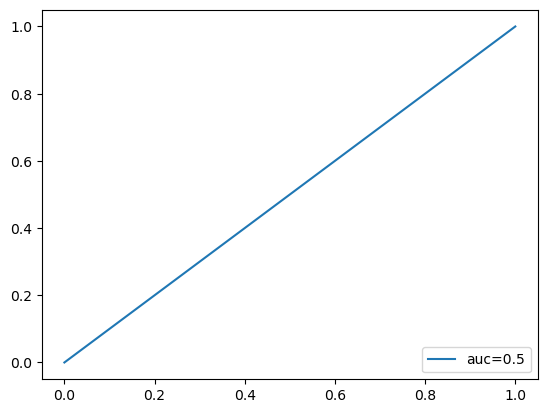

In [481]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y3_test,y3_pred)
auc = roc_auc_score(y3_test,y3_pred)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc = 4)
plt.show()

#### Takeaways:

* The area under the ROC curve(AUC) is seen to be 0.5 whic means the model has no discrimination ability, i.e., it is as good as random guessing.

### Summary

- Thorough EDA was done on the entire dataset
- The time stamps were seperated
- Created new columns of those time stamps like date,week,hour,minute. These were further divided into seasons and time of the day
- Later the dataset was seperated based upon 'travel_type_id' into 3 parts
- Travel time distance, haversine distance, car cancellation percentage were simultaneously calculated
- The columns which were not necessary were dropped after further data cleaning
- Missing value treatment, Outlier treatment was carried out perfectly
- There were a few scenarios where we needed to treat outliers dataframe seperatley from the parent dataframe of 'travel_type_id'. So ML models were used on those dataframes as well
- Particularly one outlier dataframe had only one unique value for 'Car_Cancellation' column on which Classification-Modelling could not be performed. That dataframe had been tuned based upon a few key factors and later on ML modelling was done on that as well
- Various ML Models were used for each dataframe like Logistic Regression, Decision Tree, K-Neighbours, Random Forest etc
- Each of the model had varying performances for every dataframe and for some dataframes their performances were almost similar if not completely similar
- The choice of the model can be finally decided on various requirements as per the experts

**Thank You!**